In [1]:
# processed_datafile = '_stock_df_with_technical_indicators.csv'
# print(f'NOTE: current processed filename ready for modeling is: "{processed_datafile}"')

In [2]:
from bs_ds.imports import *
import functions_combined_BEST as ji

"""NOTE: current processed filename ready for modeling is: processed_datafile"""
processed_datafile = '_stock_df_with_technical_indicators.csv'

## LOAD PROCESSED CSV WITH TECH INDICATORS
def load_processed_stock_data(processed_data_filename = '_stock_df_with_technical_indicators.csv', force_from_raw=False):
    import functions_combined_BEST as ji
    import os
    import pandas as pd
    
    # check if csv file already exists
    current_files = os.listdir()

    # Run all processing on raw data if file not found.
    if (force_from_raw is True) or (processed_data_filename not in current_files):
        
        print(f'File not found. Processing raw data using custom ji functions...')
        print('1) ji.load_raw_stock_data_from_text\n2) ji.get_technical_indicators,dropping na from column "ma21"')

        stock_df = ji.load_raw_stock_data_from_txt(
            filename="IVE_bidask1min.txt", 
            start_index='2016-12-01',
            clean=True, fill_or_drop_null='drop', 
            freq='CBH',verbose=1)

        ## CALCULATE TECHNICAL INDICATORS FOR STOCK MARKET
        stock_df = ji.get_technical_indicators(stock_df, make_price_from='BidClose')

        ## Clean up stock_df 
        # Remove beginning null values for moving averages
        na_idx = stock_df.loc[stock_df['ma21'].isna() == True].index # was 'upper_band'
        stock_df = stock_df.loc[na_idx[-1]+1*na_idx.freq:]


    # load processed_data_filename if found
    elif processed_data_filename in current_files:

        print(f'File found. Loading {processed_data_filename}')
        
        stock_df=pd.read_csv(processed_data_filename, index_col=0, parse_dates=True)
        stock_df['date_time_index'] = stock_df.index.to_series()
        stock_df.index.freq=ji.custom_BH_freq()
        
    print(stock_df.index[[0,-1]])
    display(stock_df.head(3))

    return stock_df        

# LOAD IN FULL STOCK DATASET 
full_df = load_processed_stock_data()

# SELECT DESIRED COLUMNS OF 
stock_df = full_df[[
    'date_time_index','price','ma7','ma21','26ema','12ema','MACD',
    '20sd','upper_band','lower_band','ema','momentum','filled_timebin'
]].copy()


# def load_everything(file_to_load = None):
#     import pandas as pd
# #     from bs_ds.imports import 
# #     from bs_ds import ihelp
# #     from functions_combined_BEST import global_imports
    
# #     import_packages()
# #     global_imports('functions_combined_BEST','ji')
# #     global_imports('IPython.display','display',asfunction=True)
# #     global_imports('IPython.display')
# #     import functions_combined_BEST as ji

    
#     import warnings
#     warnings.filterwarnings('ignore')
#     pd.set_option('display.max_columns',None)
    
#     if file_to_load is not None:
#         stock_df = check_for_csv_and_load(processed_datafile=file_to_load)
#     else:
#         stock_df = check_for_csv_and_load()
#     return stock_df
# bs.html_on()    

Package,Handle,Description
bs_ds,bs,Custom data science bootcamp student package
matplotlib,mpl,Matplotlib's base OOP module with formatting artists
matplotlib.pyplot,plt,Matplotlib's matlab-like plotting module
numpy,np,scientific computing with Python
pandas,pd,High performance data structures and tools
seaborn,sns,High-level data visualization library based on matplotlib


bs_ds  v0.8.4 loaded.  Read the docs: https://bs-ds.readthedocs.io/en/latest/index.html
For convenient loading of standard modules use: from bs_ds.imports import *

File found. Loading _stock_df_with_technical_indicators.csv
DatetimeIndex(['2016-12-29 15:30:00', '2019-06-21 15:30:00'], dtype='datetime64[ns]', name='date_time_index', freq=None)


,Date,Time,BidOpen,BidHigh,BidLow,BidClose,AskOpen,AskHigh,AskLow,AskClose,...,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,date_time_index
date_time_index,,,,,,,,,,,,,,,,,,,,,
2016-12-29 15:30:00,12/29/2016,15:30,96.25,96.27,96.24,96.27,96.26,96.28,96.25,96.28,...,96.277007,96.573856,96.730494,0.156639,1.002051,98.281110,94.272904,96.263988,89.27,2016-12-29 15:30:00
2016-12-30 09:30:00,12/30/2016,09:30,96.32,96.39,96.32,96.38,96.48,96.48,96.39,96.42,...,96.293537,96.571218,96.721997,0.150779,0.980655,98.254848,94.332227,96.341329,89.38,2016-12-30 09:30:00
2016-12-30 10:30:00,12/30/2016,10:30,96.18,96.21,96.17,96.21,96.19,96.21,96.18,96.21,...,96.307891,96.566317,96.709593,0.143275,0.959724,98.227340,94.388442,96.253776,89.21,2016-12-30 10:30:00


In [3]:
stock_df.index

DatetimeIndex(['2016-12-29 15:30:00', '2016-12-30 09:30:00',
               '2016-12-30 10:30:00', '2016-12-30 11:30:00',
               '2016-12-30 12:30:00', '2016-12-30 13:30:00',
               '2016-12-30 14:30:00', '2016-12-30 15:30:00',
               '2017-01-02 09:30:00', '2017-01-02 10:30:00',
               ...
               '2019-06-20 13:30:00', '2019-06-20 14:30:00',
               '2019-06-20 15:30:00', '2019-06-21 09:30:00',
               '2019-06-21 10:30:00', '2019-06-21 11:30:00',
               '2019-06-21 12:30:00', '2019-06-21 13:30:00',
               '2019-06-21 14:30:00', '2019-06-21 15:30:00'],
              dtype='datetime64[ns]', name='date_time_index', length=4523, freq='CBH')

# TEST CODE

In [4]:
# def global_imports(modulename,shortname = None, asfunction = False):
#     """from stackoverflow: https://stackoverflow.com/questions/11990556/how-to-make-global-imports-from-a-function,
#     https://stackoverflow.com/a/46878490"""
#     from importlib import import_module

#     if shortname is None:
#         shortname = modulename

#     if asfunction is False:
#         globals()[shortname] = import_module(modulename) #__import__(modulename)
#     else:
#         globals()[shortname] = eval(modulename + "." + shortname)

In [5]:
# from bs_ds.imports import *
# from bs_ds import ihelp

# import functions_combined_BEST as ji

# from IPython.display import display
# import warnings
# warnings.filterwarnings('ignore')
# pd.set_option('display.max_columns',None)

In [6]:
# # import bs_ds as bs
# # import functions_combined_BEST as ji
# # from bs_ds import ihelp
# # from bs_ds.imports import *

# # import pandas as pd 
# # import numpy as np
# # import matplotlib.pyplot as plt

# from IPython.display import display
# import warnings
# warnings.filterwarnings('ignore')
# pd.set_option('display.max_columns',None)

In [7]:
# def welcome_message():
#     from IPython.display import Markdown as md
#     logo = "<img src='https://raw.githubusercontent.com/jirvingphd/bs_ds/master/docs/bs_ds_logo.png' width=75> \n"
#     msg = f"- For convenient loading of standard modules use:\n```python\nfrom bs_ds.imports import *\n```"
#     msg2 = f"- For a Dropdow Menu of Available Functions' Help and Source Code:\n```python\nbs_bs.module_menu()\n```"
#     return md(logo+msg+'\n'+msg2)
# welcome_message()

# # logo = '<img src="bs-ds.readthedocs.io/en/latest/_images/bs_ds_logo.png", height=100>\n' 
# # import IPython
# # IPython.display.Markdown(logo)

In [8]:
# # code from using v 3.6.1 of plotly.
# import plotly
# import plotly.offline as py
# import plotly.tools as tls
# import plotly.graph_objs as go

# py.init_notebook_mode(connected=True)

# %matplotlib inline
# # import cufflinks as cf
# # cf.set_config_file(offline=True, world_readable=True, theme='pearl')


# # import folium
# # import altair as alt
# # import missingno as msg
# # import sys
# # import warnings


# from ipywidgets import interact, interactive, fixed
# import ipywidgets as widgets
# from IPython.display import display

In [9]:
# # stock_df = ji.load_raw_stock_data_from_txt(filename="IVE_bidask1min.txt", start_index='2016-12-01',
# #                                         clean=True,fill_or_drop_null='drop', freq='CBH',verbose=1)
# # preparing 'df' for code below
# # date_time_index = stock_df.index.to_series()
# # df = stock_df[['Date','BidClose']]
# # df = pd.concat([date_time_index, df],axis=1)
# # df.rename({'BidClose':'price'} , axis='columns',inplace=True)
# # df.to_csv('test_stock_df.csv')

# stock_df = pd.read_csv('test_stock_df.csv',index_col=0)
# stock_df.columns=['date_time','Date','price']
# stock_df.head()

In [10]:
# ## EXAMPLE PLOTLY
# # Load data
# df = pd.read_csv(
#     "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")
# df.columns = [col.replace("AAPL.", "") for col in df.columns]

# # Create figure
# fig = go.Figure()

# fig.add_trace(
#     go.Scatter(x=list(df.Date), y=list(df.High)))

# # Set title
# fig.update_layout(
#     title_text="Time series with range slider and selectors"
# )

# # Add range slider
# fig.update_layout(
#     xaxis=go.layout.XAxis(
#         rangeselector=dict(
#             buttons=list([
#                 dict(count=1,
#                      label="1m",
#                      step="month",
#                      stepmode="backward"),
#                 dict(count=6,
#                      label="6m",
#                      step="month",
#                      stepmode="backward"),
#                 dict(count=1,
#                      label="YTD",
#                      step="year",
#                      stepmode="todate"),
#                 dict(count=1,
#                      label="1y",
#                      step="year",
#                      stepmode="backward"),
#                 dict(step="all")
#             ])
#         ),
#         rangeslider=dict(
#             visible=True
#         ),
#         type="date"
#     )
# )

# fig.show()

In [11]:
# stock_df.head()

In [12]:
# ji.reload(ji)
# fig = ji.iplot_time_series(stock_df);

In [13]:
# ji.iplot_time_series(stock_df)

In [14]:
# # Plotly attempt
# try: 
#     del fig
# except:
#     pass
# # import plotly.graph_objects as go
# import plotly
# import plotly.graph_objs as go

# import pandas as pd

# # Load data
# df = pd.read_csv(
#     "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")
# df.columns = [col.replace("AAPL.", "") for col in df.columns]

# # Create figure
# fig = go.Figure()


# fig.add_trace(
#     go.Scatter(x=list(df.Date), y=list(df.High)))

# # Set title
# # fig.update({'title_text':"Time series with range slider and selectors"})
#     # title_text="Time series with range slider and selectors"
# # )

# # Add range slider
# fig.update(
#     xaxis=go.layout.XAxis(
#         rangeselector=dict(
#             buttons=list([
#                 dict(count=1,
#                      label="1m",
#                      step="month",
#                      stepmode="backward"),
#                 dict(count=6,
#                      label="6m",
#                      step="month",
#                      stepmode="backward"),
#                 dict(count=1,
#                      label="YTD",
#                      step="year",
#                      stepmode="todate"),
#                 dict(count=1,
#                      label="1y",
#                      step="year",
#                      stepmode="backward"),
#                 dict(step="all")
#             ])
#         ),
# #         rangeslider=dict(
# #             visible=True
#         ),
# #         type="date"
#     )
# # )

# fig.show()

In [15]:
# ihelp(widgets.SelectionRangeSlider)

In [16]:
# skip=False
# # if skip==False:
#     # Make a Layout with the range slider and labels as two different boxes, one on top of the other

# start_date = stock_df.index[0]
# end_date  = stock_df.index[-1]

# def make_date_range_slider(start_date,end_date,freq='D'):

#     from ipywidgets import interact, interactive, interaction, Label, Box, Layout
#     import ipywidgets as iw
#     from datetime import datetime

#     # specify the date range from user input
#     dates = pd.date_range(start_date, end_date,freq=freq)

#     # specify formatting based on frequency code
#     date_format_lib={'D':'%m/%d/%Y','H':'%m/%d/%Y: %T'}
#     freq_format = date_format_lib[freq]


#     # creat options list and index for SelectionRangeSlider
#     options = [(date.strftime(date_format_lib[freq]),date) for date in dates]
#     index = (0, len(options)-1)

#     #     # Create out function to display outputs (not needed?)
#     #     out = iw.Output(layout={'border': '1px solid black'})
#     #     #     @out.capture()

#     # Instantiate the date_range_slider
#     date_range_slider = iw.SelectionRangeSlider(
#         options=options, index=index, description = 'Date Range',
#         orientation = 'horizontal',layout={'width':'500px','grid_area':'main'},#layout=Layout(grid_area='main'),
#         readout=True)

#     # Save the labels for the date_range_slider as separate items
#     date_list = [date_range_slider.label[0], date_range_slider.label[-1]]
#     date_label = iw.Label(f'{date_list[0]} -- {date_list[1]}',
#                          layout=Layout(grid_area='header'))
#     return date_range_slider

# dl = widgets.dlink((source, 'value'), (target1, 'value'))
# display(caption, source, target1)
# # def updateXAxis(change):
# #     #Update X-axis min/max value here
# #     if change['type'] == 'change' and change['name'] == 'value':
# #         x_start = change['new'][0]
# #         x_end = change['new'][1]
# # date_range_slider.observe(updateXAxis)

# #             x_sc.min = change['new'][0]
# #             x_sc.max = change['new'][1]

# #     source1, target1 = date_range_slider, date_label
# #     dl = iw.dlink((soruce1,'label'),(target1,'value'))

# #     ## ADJUST LABEL OUTPUT TO MATCH SLIDER
# #     output2 = date_label#widgets.Output()
# #     def on_value_change(change):
# #         with output2:
# #             print(change['new'])
# #     header  = date_range_slider
# #     main    = date_label      

# #     slider_items=[date_range_slider, date_label]
# #     output = iw.GridBox(children=[date_range_slider,date_label],
# #                        layout=Layout(
# #                        grid_template_rows='auto auto',
# #                        grid_template_columns='auto auto',
# #                        grid_template_areas='''
# #                        "header header"
# #                        "main main"
# #                        '''))# display='flex','flex_flow'
#     return date_range_slider
# fig = stock_df['BidClose'].plot()
# make_date_range_slider(start_date, end_date,'D')

In [17]:
# # Instantiate the date_range_slider
# date_range_slider = iw.SelectionRangeSlider(
#     options=options, index=index, description = 'Date Range',
#     orientation = 'horizontal',layout={'width':'500px'},readout=False)

# # Save the labels for the date_range_slider as separate items
# # date_list = [date_range_slider.label[0], date_range_slider.label[-1]]
# date_label1 = iw.Label(date_range_slider.label[0])
# date_label2 = iw.Label(date_range_slider.label[-1])
# source_1, target_1 = date_range_slider, iw.Label

# def tf_label(label):
#     return str(label[0])
# dl1 = iw.dlink((source_1,'label',lambda x: tf_label(x)),(target_1,'value'))#,lambda x: str(x)))

#### EX FROM TUTORIAL

In [18]:
# import ipywidgets as widgets

# widgets.Textarea(
#     value='Hello World',
#     placeholder='Type something',
#     description='String:',
#     disabled=False
# )


In [19]:
# imports_list = [('pandas','pd','High performance data structures and tools'),
#                 ('numpy','np','scientific computing with Python'),
#                 ('matplotlib','mpl',"Matplotlib's base OOP module with formatting artists"),
#                 ('matplotlib.pyplot','plt',"Matplotlib's matlab-like plotting module"),
#                 ('seaborn','sns',"High-level data visualization library based on matplotlib"),
#                ('IPython.display')]

# for package_tuple in imports_list:
#     package=package_tuple[0]
#     handle=package_tuple[1]
#     description=package_tuple[2]
#     exec(f'import {package} as {handle}')
# df_imported= pd.DataFrame(imports_list,columns=['Package','Handle','Description'])
# display(df_imported.sort_values('Package').style.hide_index().set_caption('Loaded Packages and Handles'))

In [20]:
# from ipywidgets import interact
# import functions_combined_BEST as ji

# def module_menu(mods=[x for x in dir(ji) if '__' not in x], show_help=False, show_code=True):
#     """Displays an interactive menu of all functions available in bs_ds"""
#     from functions_combined_BEST import ihelp
#     import functions_combined_BEST as ji
#     ihelp(eval(f'ji.{mods}'), show_help, show_code)
#     return
    
# interact(module_menu);

In [21]:
# ## BS_DS MODULE DISPLAY FUNCTION
# from ipywidgets import interact
# import functions_combined_BEST as ji

# mods = [x for x in dir(ji) if '__' not in x]

# @interact(bs_ds_functions=mods, show_help=False, show_code=True)
# def display_modules(bs_ds_functions, show_help, show_code):
# #     display("Select Function to Display")
#     from ipywidgets
#     ji.ihelp(eval(f'ji.{bs_ds_functions}'),show_help=show_help, show_code=show_code)

# Project Overview

## PROJECT GOAL:


* **Use President Trump's tweets (NLP and other features) to predict fluctuations in the stock market (using S&P 500 as index).**

    
### Data to Use:

* All Donald Trump tweets from inaugaration day 2017 to today (for now) - 06/20/19

    *          Extracted from http://www.trumptwitterarchive.com/
*     Minute-resolution data for the S&P500 covering the same time period.

    *         IVE S&P500 Index from - http://www.kibot.com/free_historical_data.aspx
    
## MAJOR REFERENCES / INSPIRATION / PRIOR WORK IN FIELD:

1. **Stanford Scientific Poster Using NLP ALONE to predict if stock prices increase or decrease 5 mins after Trump tweets.**  [Poster PDF LINK](http://cs229.stanford.edu/proj2017/final-posters/5140843.pdf)
    - [Evernote Summary Notes Link](https://www.evernote.com/l/AAoL1CyhPV1GoIzSgq59GO10x6xfEeVDo5s/)

2. **TowardsDataScience Blog Plost on "Using the latest advancements in deep learning to predict stock price movements."** [Blog Post link](https://towardsdatascience.com/aifortrading-2edd6fac689d)
    - [Evernote Summary](https://www.evernote.com/l/AApvQ8Xh8b9GBLhrD0m8w4H1ih1oVM8wkEw/)


## OUTLINE FOR DATA TO PRODUCE & MODEL FOR FINAL PROJECT:

### TWITTER DATA:

* [ENGINEER FEATURES] **Extract features from Trump's tweets: perform the NLP analysis to generate the features about his tweets to use in final model**

    * [x] Tweet sentiment score
    * [ ] Tweet frequency per timebin
    * [x] upper-to-lowercase-ratio
    * [x] retweet-count
    * [x] favorite-count
    
* [PREDICTIVE MODEL] **Generate Binary Stock Market Predictions based on Trump's Tweets.**

    * [x] Create a neural network model like the Stanford guys, where my model JUST uses the content of trump's tweets with word embeddings and a binary label (-1, 0,1) for direction of stock market change at a fixed time delta (they did 5 mins, I will do 1 hour) [ See reference #1 - stanford poster]
  



### STOCK MARKET DATA (S&P 500):

* [ENGINEER FEATURES] **Extract features about the stock data -calculate the technical indices for the S&P 500 discussed in his article.**  [ see reference #2 - blog post ]

    * [x] 7 days moving average 
    * [x]  21 days moving average
    * [x] exponential moving average
    * [x] momentum
    * [x] Bollinger bands
    * [x] MACD
    * (Maybe) FFT / time series decomp for trend lines
    
* [PREDICTIVE MODEL] **Generate stock price predictions based only historical data using....**

    * [x] a SARIMA model[?]
    * [ ] a FB Prophet model[?] 
    * [x] an LSTM neural network like other blog post?  [!!!] [Predicting the Stock Market Using Machine Learning and Deep Learning](https://www.evernote.com/l/AAq1azRmt2dANq_Oye-MBZQr-OU5lA5APl8/)
    
### FINAL MODEL - FEED ALL ABOVE FEATURES INTO:

- **Plan A: NEURAL NETWORK *REGRESSION* MODEL TO PREDICT *ACTUAL S&P 500 PRICE* AT 1 HOUR-1 DAY FOLLOWING TWEETS**
    - Final Model Target is based more on blog post's construction (ref#2), but takes output of model like ref#1
    
    <img src="https://raw.githubusercontent.com/jirvingphd/dsc-5-capstone-project-online-ds-ft-021119/master/figures/annotated_GAN_for_stock_market.jpeg" width=800>
    
- **PLAN B: NEURAL NETWORK *BINARY CLASSIFICATION*  MODEL TO PREDICT THE *DIRECTION OF CHANGE FOR S&P 500 PRICE* AT 1 HOUR - 1 DAY FOLLOWING TWEETS**
    - Final Model Target is based on stanford poster's methods/goal. (ref #1)




## DATA ANALYSIS DETAILS AND Equations/Code 

#### Technical Indicators - Explanation & Equations






* 7 and 21 day moving averages 
```python
df['ma7'] df['price'].rolling(window = 7 ).mean() #window of 7 if daily data
df['ma21'] df['price'].rolling(window = 21).mean() #window of 21 if daily data
```    
* MACD(Moving Average Convergence Divergence)

> Moving Average Convergence Divergence (MACD) is a trend-following momentumindicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA.

>The result of that calculation is the MACD line. A nine-day EMA of the MACD, called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals. 

> Traders may buy the security when the MACD crosses above its signal line and sell - or short - the security when the MACD crosses below the signal line. Moving Average Convergence Divergence (MACD) indicators can be interpreted in several ways, but the more common methods are crossovers, divergences, and rapid rises/falls.  - _[from Investopedia](https://www.investopedia.com/terms/m/macd.asp)_

```python
df['ewma26'] = pd.ewma(df['price'], span=26)
df['ewma12'] = pd.ewma(df['price'], span=12)
df['MACD'] = (df['12ema']-df['26ema'])
```
- **Exponentially weighted moving average**
```python
dataset['ema'] = dataset['price'].ewm(com=0.5).mean()
```

- **Bollinger bands**
    > "Bollinger Bands® are a popular technical indicators used by traders in all markets, including stocks, futures and currencies. There are a number of uses for Bollinger Bands®, including determining overbought and oversold levels, as a trend following tool, and monitoring for breakouts. There are also some pitfalls of the indicators. In this article, we will address all these areas."
> Bollinger bands are composed of three lines. One of the more common calculations of Bollinger Bands uses a 20-day simple moving average (SMA) for the middle band. The upper band is calculated by taking the middle band and adding twice the daily standard deviation, the lower band is the same but subtracts twice the daily std. - _[from Investopedia](https://www.investopedia.com/trading/using-bollinger-bands-to-gauge-trends/)_

    - Boilinger Upper Band:<br>
    $BOLU = MA(TP, n) + m * \sigma[TP, n ]$<br><br>
    - Boilinger Lower Band<br>
    $ BOLD = MA(TP,n) - m * \sigma[TP, n ]$
    - Where:
        - $MA$  = moving average
        - $TP$ (typical price) = $(High + Low+Close)/ 3$
        - $n$ is number of days in smoothing period
        - $m$ is the number of standard deviations
        - $\sigma[TP, n]$ = Standard Deviations over last $n$ periods of $TP$

```python
# Create Bollinger Bands
dataset['20sd'] = pd.stats.moments.rolling_std(dataset['price'],20)
dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
```


- **Momentum**
> "Momentum is the rate of acceleration of a security's price or volume – that is, the speed at which the price is changing. Simply put, it refers to the rate of change on price movements for a particular asset and is usually defined as a rate. In technical analysis, momentum is considered an oscillator and is used to help identify trend lines." - _[from Investopedia](https://www.investopedia.com/articles/technical/081501.asp)_

    - $ Momentum = V - V_x$
    - Where:
        - $V$ = Latest Price
        - $V_x$ = Closing Price
        - $x$ = number of days ago

```python
# Create Momentum
dataset['momentum'] = dataset['price']-1
```



###  STOCK DATA INFO - S&P500

- Q: What is the format of your aggregate bid/ask data?
    - **The order of the fields in our aggregate bid/ask files is: <br>Date, Time, BidOpen, BidHigh, BidLow, BidClose, AskOpen, AskHigh, AskLow, AskClose**

    - The format is very similar to our standard one minute and higher interval files which are constructed by aggregating the execution price and volume. The difference here is that instead of using execution price we use "national best bid and offer" (NBBO) prices to get their open, high, low and close prices for any given time interval. Bids and asks in our files are from multiple markets and they represent the best prices or the highest bid and the lowest ask.

    - We record best bid/ask values whenever there is trade activity. Like with our regular tick data, current best bid/ask values are recorded for every trade.

    - A potential usage scenario may include using this data in your analysis to try to simulate the execution price for market orders and to estimate the potential slippage that may occur.

You can download sample aggregate bid/ask data for free from the free historical data section on our Buy web page.

**HELPFUL RESOURCES**
- **Dateime Guide Article:**
    - https://medium.com/jbennetcodes/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f
- **Getting business day MINUTE resolution**
    - Create minute index, then limit it to business times
        - https://stackoverflow.com/questions/19373759/python-pandas-business-day-range-bdate-range-doesnt-take-1min-freq
    - Try !pip install pandas_market_calendars too

# LOAD & PROCESS RAW STOCK DATA

In [ ]:

bs.ihelp()

In [54]:
# DISPLAY CODE TO BE USED BELOW TO LOAD AND PROCESS STOCK DATA
ji.ihelp( pd.DataFrame, show_help=True)#ji.load_raw_stock_data_from_txt, show_help=True,show_code=False)

---------------------------------------------------------------------------------------------------------
--------- 	HELP:	 ------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------
Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, argument order is maintained for P

##### SOURCE CODE:
 ____

```python
class DataFrame(NDFrame):
    """
    Two-dimensional size-mutable, potentially heterogeneous tabular data
    structure with labeled axes (rows and columns). Arithmetic operations
    align on both row and column labels. Can be thought of as a dict-like
    container for Series objects. The primary pandas data structure.

    Parameters
    ----------
    data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
        Dict can contain Series, arrays, constants, or list-like objects

        .. versionchanged :: 0.23.0
           If data is a dict, argument order is maintained for Python 3.6
           and later.

    index : Index or array-like
        Index to use for resulting frame. Will default to RangeIndex if
        no indexing information part of input data and no index provided
    columns : Index or array-like
        Column labels to use for resulting frame. Will default to
        RangeIndex (0, 1, 2, ..., n) if no column labels are provided
    dtype : dtype, default None
        Data type to force. Only a single dtype is allowed. If None, infer
    copy : boolean, default False
        Copy data from inputs. Only affects DataFrame / 2d ndarray input

    See Also
    --------
    DataFrame.from_records : Constructor from tuples, also record arrays.
    DataFrame.from_dict : From dicts of Series, arrays, or dicts.
    DataFrame.from_items : From sequence of (key, value) pairs
        pandas.read_csv, pandas.read_table, pandas.read_clipboard.

    Examples
    --------
    Constructing DataFrame from a dictionary.

    >>> d = {'col1': [1, 2], 'col2': [3, 4]}
    >>> df = pd.DataFrame(data=d)
    >>> df
       col1  col2
    0     1     3
    1     2     4

    Notice that the inferred dtype is int64.

    >>> df.dtypes
    col1    int64
    col2    int64
    dtype: object

    To enforce a single dtype:

    >>> df = pd.DataFrame(data=d, dtype=np.int8)
    >>> df.dtypes
    col1    int8
    col2    int8
    dtype: object

    Constructing DataFrame from numpy ndarray:

    >>> df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
    ...                    columns=['a', 'b', 'c'])
    >>> df2
       a  b  c
    0  1  2  3
    1  4  5  6
    2  7  8  9
    """

    @property
    def _constructor(self):
        return DataFrame

    _constructor_sliced = Series
    _deprecations = NDFrame._deprecations | frozenset(
        ['get_value', 'set_value', 'from_csv', 'from_items'])
    _accessors = set()

    @property
    def _constructor_expanddim(self):
        from pandas.core.panel import Panel
        return Panel

    # ----------------------------------------------------------------------
    # Constructors

    def __init__(self, data=None, index=None, columns=None, dtype=None,
                 copy=False):
        if data is None:
            data = {}
        if dtype is not None:
            dtype = self._validate_dtype(dtype)

        if isinstance(data, DataFrame):
            data = data._data

        if isinstance(data, BlockManager):
            mgr = self._init_mgr(data, axes=dict(index=index, columns=columns),
                                 dtype=dtype, copy=copy)
        elif isinstance(data, dict):
            mgr = init_dict(data, index, columns, dtype=dtype)
        elif isinstance(data, ma.MaskedArray):
            import numpy.ma.mrecords as mrecords
            # masked recarray
            if isinstance(data, mrecords.MaskedRecords):
                mgr = masked_rec_array_to_mgr(data, index, columns, dtype,
                                              copy)

            # a masked array
            else:
                mask = ma.getmaskarray(data)
                if mask.any():
                    data, fill_value = maybe_upcast(data, copy=True)
                    data.soften_mask()  # set hardmask False if it was True
                    data[mask] = fill_value
                else:
                    data = data.copy()
                mgr = init_ndarray(data, index, columns, dtype=dtype,
                                   copy=copy)

        elif isinstance(data, (np.ndarray, Series, Index)):
            if data.dtype.names:
                data_columns = list(data.dtype.names)
                data = {k: data[k] for k in data_columns}
                if columns is None:
                    columns = data_columns
                mgr = init_dict(data, index, columns, dtype=dtype)
            elif getattr(data, 'name', None) is not None:
                mgr = init_dict({data.name: data}, index, columns,
                                dtype=dtype)
            else:
                mgr = init_ndarray(data, index, columns, dtype=dtype,
                                   copy=copy)

        # For data is list-like, or Iterable (will consume into list)
        elif (isinstance(data, compat.Iterable)
              and not isinstance(data, string_and_binary_types)):
            if not isinstance(data, compat.Sequence):
                data = list(data)
            if len(data) > 0:
                if is_list_like(data[0]) and getattr(data[0], 'ndim', 1) == 1:
                    if is_named_tuple(data[0]) and columns is None:
                        columns = data[0]._fields
                    arrays, columns = to_arrays(data, columns, dtype=dtype)
                    columns = ensure_index(columns)

                    # set the index
                    if index is None:
                        if isinstance(data[0], Series):
                            index = get_names_from_index(data)
                        elif isinstance(data[0], Categorical):
                            index = ibase.default_index(len(data[0]))
                        else:
                            index = ibase.default_index(len(data))

                    mgr = arrays_to_mgr(arrays, columns, index, columns,
                                        dtype=dtype)
                else:
                    mgr = init_ndarray(data, index, columns, dtype=dtype,
                                       copy=copy)
            else:
                mgr = init_dict({}, index, columns, dtype=dtype)
        else:
            try:
                arr = np.array(data, dtype=dtype, copy=copy)
            except (ValueError, TypeError) as e:
                exc = TypeError('DataFrame constructor called with '
                                'incompatible data and dtype: {e}'.format(e=e))
                raise_with_traceback(exc)

            if arr.ndim == 0 and index is not None and columns is not None:
                values = cast_scalar_to_array((len(index), len(columns)),
                                              data, dtype=dtype)
                mgr = init_ndarray(values, index, columns,
                                   dtype=values.dtype, copy=False)
            else:
                raise ValueError('DataFrame constructor not properly called!')

        NDFrame.__init__(self, mgr, fastpath=True)

    # ----------------------------------------------------------------------

    @property
    def axes(self):
        """
        Return a list representing the axes of the DataFrame.

        It has the row axis labels and column axis labels as the only members.
        They are returned in that order.

        Examples
        --------
        >>> df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
        >>> df.axes
        [RangeIndex(start=0, stop=2, step=1), Index(['coll', 'col2'],
        dtype='object')]
        """
        return [self.index, self.columns]

    @property
    def shape(self):
        """
        Return a tuple representing the dimensionality of the DataFrame.

        See Also
        --------
        ndarray.shape

        Examples
        --------
        >>> df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
        >>> df.shape
        (2, 2)

        >>> df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4],
        ...                    'col3': [5, 6]})
        >>> df.shape
        (2, 3)
        """
        return len(self.index), len(self.columns)

    @property
    def _is_homogeneous_type(self):
        """
        Whether all the columns in a DataFrame have the same type.

        Returns
        -------
        bool

        Examples
        --------
        >>> DataFrame({"A": [1, 2], "B": [3, 4]})._is_homogeneous_type
        True
        >>> DataFrame({"A": [1, 2], "B": [3.0, 4.0]})._is_homogeneous_type
        False

        Items with the same type but different sizes are considered
        different types.

        >>> DataFrame({
        ...    "A": np.array([1, 2], dtype=np.int32),
        ...    "B": np.array([1, 2], dtype=np.int64)})._is_homogeneous_type
        False
        """
        if self._data.any_extension_types:
            return len({block.dtype for block in self._data.blocks}) == 1
        else:
            return not self._data.is_mixed_type

    # ----------------------------------------------------------------------
    # Rendering Methods

    def _repr_fits_vertical_(self):
        """
        Check length against max_rows.
        """
        max_rows = get_option("display.max_rows")
        return len(self) <= max_rows

    def _repr_fits_horizontal_(self, ignore_width=False):
        """
        Check if full repr fits in horizontal boundaries imposed by the display
        options width and max_columns.

        In case off non-interactive session, no boundaries apply.

        `ignore_width` is here so ipnb+HTML output can behave the way
        users expect. display.max_columns remains in effect.
        GH3541, GH3573
        """

        width, height = console.get_console_size()
        max_columns = get_option("display.max_columns")
        nb_columns = len(self.columns)

        # exceed max columns
        if ((max_columns and nb_columns > max_columns) or
                ((not ignore_width) and width and nb_columns > (width // 2))):
            return False

        # used by repr_html under IPython notebook or scripts ignore terminal
        # dims
        if ignore_width or not console.in_interactive_session():
            return True

        if (get_option('display.width') is not None or
                console.in_ipython_frontend()):
            # check at least the column row for excessive width
            max_rows = 1
        else:
            max_rows = get_option("display.max_rows")

        # when auto-detecting, so width=None and not in ipython front end
        # check whether repr fits horizontal by actually checking
        # the width of the rendered repr
        buf = StringIO()

        # only care about the stuff we'll actually print out
        # and to_string on entire frame may be expensive
        d = self

        if not (max_rows is None):  # unlimited rows
            # min of two, where one may be None
            d = d.iloc[:min(max_rows, len(d))]
        else:
            return True

        d.to_string(buf=buf)
        value = buf.getvalue()
        repr_width = max(len(l) for l in value.split('\n'))

        return repr_width < width

    def _info_repr(self):
        """
        True if the repr should show the info view.
        """
        info_repr_option = (get_option("display.large_repr") == "info")
        return info_repr_option and not (self._repr_fits_horizontal_() and
                                         self._repr_fits_vertical_())

    def __unicode__(self):
        """
        Return a string representation for a particular DataFrame.

        Invoked by unicode(df) in py2 only. Yields a Unicode String in both
        py2/py3.
        """
        buf = StringIO(u(""))
        if self._info_repr():
            self.info(buf=buf)
            return buf.getvalue()

        max_rows = get_option("display.max_rows")
        max_cols = get_option("display.max_columns")
        show_dimensions = get_option("display.show_dimensions")
        if get_option("display.expand_frame_repr"):
            width, _ = console.get_console_size()
        else:
            width = None
        self.to_string(buf=buf, max_rows=max_rows, max_cols=max_cols,
                       line_width=width, show_dimensions=show_dimensions)

        return buf.getvalue()

    def _repr_html_(self):
        """
        Return a html representation for a particular DataFrame.

        Mainly for IPython notebook.
        """
        # qtconsole doesn't report its line width, and also
        # behaves badly when outputting an HTML table
        # that doesn't fit the window, so disable it.
        # XXX: In IPython 3.x and above, the Qt console will not attempt to
        # display HTML, so this check can be removed when support for
        # IPython 2.x is no longer needed.
        try:
            import IPython
        except ImportError:
            pass
        else:
            if LooseVersion(IPython.__version__) < LooseVersion('3.0'):
                if console.in_qtconsole():
                    # 'HTML output is disabled in QtConsole'
                    return None

        if self._info_repr():
            buf = StringIO(u(""))
            self.info(buf=buf)
            # need to escape the <class>, should be the first line.
            val = buf.getvalue().replace('<', r'&lt;', 1)
            val = val.replace('>', r'&gt;', 1)
            return '<pre>' + val + '</pre>'

        if get_option("display.notebook_repr_html"):
            max_rows = get_option("display.max_rows")
            max_cols = get_option("display.max_columns")
            show_dimensions = get_option("display.show_dimensions")

            return self.to_html(max_rows=max_rows, max_cols=max_cols,
                                show_dimensions=show_dimensions, notebook=True)
        else:
            return None

    @Substitution(header='Write out the column names. If a list of strings '
                         'is given, it is assumed to be aliases for the '
                         'column names')
    @Substitution(shared_params=fmt.common_docstring,
                  returns=fmt.return_docstring)
    def to_string(self, buf=None, columns=None, col_space=None, header=True,
                  index=True, na_rep='NaN', formatters=None, float_format=None,
                  sparsify=None, index_names=True, justify=None,
                  max_rows=None, max_cols=None, show_dimensions=False,
                  decimal='.', line_width=None):
        """
        Render a DataFrame to a console-friendly tabular output.
        %(shared_params)s
        line_width : int, optional
            Width to wrap a line in characters.
        %(returns)s
        See Also
        --------
        to_html : Convert DataFrame to HTML.

        Examples
        --------
        >>> d = {'col1': [1, 2, 3], 'col2': [4, 5, 6]}
        >>> df = pd.DataFrame(d)
        >>> print(df.to_string())
           col1  col2
        0     1     4
        1     2     5
        2     3     6
        """

        formatter = fmt.DataFrameFormatter(self, buf=buf, columns=columns,
                                           col_space=col_space, na_rep=na_rep,
                                           formatters=formatters,
                                           float_format=float_format,
                                           sparsify=sparsify, justify=justify,
                                           index_names=index_names,
                                           header=header, index=index,
                                           max_rows=max_rows,
                                           max_cols=max_cols,
                                           show_dimensions=show_dimensions,
                                           decimal=decimal,
                                           line_width=line_width)
        formatter.to_string()

        if buf is None:
            result = formatter.buf.getvalue()
            return result

    # ----------------------------------------------------------------------

    @property
    def style(self):
        """
        Property returning a Styler object containing methods for
        building a styled HTML representation fo the DataFrame.

        See Also
        --------
        pandas.io.formats.style.Styler
        """
        from pandas.io.formats.style import Styler
        return Styler(self)

    def iteritems(self):
        r"""
        Iterator over (column name, Series) pairs.

        Iterates over the DataFrame columns, returning a tuple with
        the column name and the content as a Series.

        Yields
        ------
        label : object
            The column names for the DataFrame being iterated over.
        content : Series
            The column entries belonging to each label, as a Series.

        See Also
        --------
        DataFrame.iterrows : Iterate over DataFrame rows as
            (index, Series) pairs.
        DataFrame.itertuples : Iterate over DataFrame rows as namedtuples
            of the values.

        Examples
        --------
        >>> df = pd.DataFrame({'species': ['bear', 'bear', 'marsupial'],
        ...                   'population': [1864, 22000, 80000]},
        ...                   index=['panda', 'polar', 'koala'])
        >>> df
                species   population
        panda 	bear 	  1864
        polar 	bear 	  22000
        koala 	marsupial 80000
        >>> for label, content in df.iteritems():
        ...     print('label:', label)
        ...     print('content:', content, sep='\n')
        ...
        label: species
        content:
        panda         bear
        polar         bear
        koala    marsupial
        Name: species, dtype: object
        label: population
        content:
        panda     1864
        polar    22000
        koala    80000
        Name: population, dtype: int64
        """
        if self.columns.is_unique and hasattr(self, '_item_cache'):
            for k in self.columns:
                yield k, self._get_item_cache(k)
        else:
            for i, k in enumerate(self.columns):
                yield k, self._ixs(i, axis=1)

    def iterrows(self):
        """
        Iterate over DataFrame rows as (index, Series) pairs.

        Yields
        ------
        index : label or tuple of label
            The index of the row. A tuple for a `MultiIndex`.
        data : Series
            The data of the row as a Series.

        it : generator
            A generator that iterates over the rows of the frame.

        See Also
        --------
        itertuples : Iterate over DataFrame rows as namedtuples of the values.
        iteritems : Iterate over (column name, Series) pairs.

        Notes
        -----

        1. Because ``iterrows`` returns a Series for each row,
           it does **not** preserve dtypes across the rows (dtypes are
           preserved across columns for DataFrames). For example,

           >>> df = pd.DataFrame([[1, 1.5]], columns=['int', 'float'])
           >>> row = next(df.iterrows())[1]
           >>> row
           int      1.0
           float    1.5
           Name: 0, dtype: float64
           >>> print(row['int'].dtype)
           float64
           >>> print(df['int'].dtype)
           int64

           To preserve dtypes while iterating over the rows, it is better
           to use :meth:`itertuples` which returns namedtuples of the values
           and which is generally faster than ``iterrows``.

        2. You should **never modify** something you are iterating over.
           This is not guaranteed to work in all cases. Depending on the
           data types, the iterator returns a copy and not a view, and writing
           to it will have no effect.
        """
        columns = self.columns
        klass = self._constructor_sliced
        for k, v in zip(self.index, self.values):
            s = klass(v, index=columns, name=k)
            yield k, s

    def itertuples(self, index=True, name="Pandas"):
        """
        Iterate over DataFrame rows as namedtuples.

        Parameters
        ----------
        index : bool, default True
            If True, return the index as the first element of the tuple.
        name : str or None, default "Pandas"
            The name of the returned namedtuples or None to return regular
            tuples.

        Yields
        -------
        collections.namedtuple
            Yields a namedtuple for each row in the DataFrame with the first
            field possibly being the index and following fields being the
            column values.

        See Also
        --------
        DataFrame.iterrows : Iterate over DataFrame rows as (index, Series)
            pairs.
        DataFrame.iteritems : Iterate over (column name, Series) pairs.

        Notes
        -----
        The column names will be renamed to positional names if they are
        invalid Python identifiers, repeated, or start with an underscore.
        With a large number of columns (>255), regular tuples are returned.

        Examples
        --------
        >>> df = pd.DataFrame({'num_legs': [4, 2], 'num_wings': [0, 2]},
        ...                   index=['dog', 'hawk'])
        >>> df
              num_legs  num_wings
        dog          4          0
        hawk         2          2
        >>> for row in df.itertuples():
        ...     print(row)
        ...
        Pandas(Index='dog', num_legs=4, num_wings=0)
        Pandas(Index='hawk', num_legs=2, num_wings=2)

        By setting the `index` parameter to False we can remove the index
        as the first element of the tuple:

        >>> for row in df.itertuples(index=False):
        ...     print(row)
        ...
        Pandas(num_legs=4, num_wings=0)
        Pandas(num_legs=2, num_wings=2)

        With the `name` parameter set we set a custom name for the yielded
        namedtuples:

        >>> for row in df.itertuples(name='Animal'):
        ...     print(row)
        ...
        Animal(Index='dog', num_legs=4, num_wings=0)
        Animal(Index='hawk', num_legs=2, num_wings=2)
        """
        arrays = []
        fields = list(self.columns)
        if index:
            arrays.append(self.index)
            fields.insert(0, "Index")

        # use integer indexing because of possible duplicate column names
        arrays.extend(self.iloc[:, k] for k in range(len(self.columns)))

        # Python 3 supports at most 255 arguments to constructor, and
        # things get slow with this many fields in Python 2
        if name is not None and len(self.columns) + index < 256:
            # `rename` is unsupported in Python 2.6
            try:
                itertuple = collections.namedtuple(name, fields, rename=True)
                return map(itertuple._make, zip(*arrays))

            except Exception:
                pass

        # fallback to regular tuples
        return zip(*arrays)

    items = iteritems

    def __len__(self):
        """
        Returns length of info axis, but here we use the index.
        """
        return len(self.index)

    def dot(self, other):
        """
        Compute the matrix mutiplication between the DataFrame and other.

        This method computes the matrix product between the DataFrame and the
        values of an other Series, DataFrame or a numpy array.

        It can also be called using ``self @ other`` in Python >= 3.5.

        Parameters
        ----------
        other : Series, DataFrame or array-like
            The other object to compute the matrix product with.

        Returns
        -------
        Series or DataFrame
            If other is a Series, return the matrix product between self and
            other as a Serie. If other is a DataFrame or a numpy.array, return
            the matrix product of self and other in a DataFrame of a np.array.

        See Also
        --------
        Series.dot: Similar method for Series.

        Notes
        -----
        The dimensions of DataFrame and other must be compatible in order to
        compute the matrix multiplication.

        The dot method for Series computes the inner product, instead of the
        matrix product here.

        Examples
        --------
        Here we multiply a DataFrame with a Series.

        >>> df = pd.DataFrame([[0, 1, -2, -1], [1, 1, 1, 1]])
        >>> s = pd.Series([1, 1, 2, 1])
        >>> df.dot(s)
        0    -4
        1     5
        dtype: int64

        Here we multiply a DataFrame with another DataFrame.

        >>> other = pd.DataFrame([[0, 1], [1, 2], [-1, -1], [2, 0]])
        >>> df.dot(other)
            0   1
        0   1   4
        1   2   2

        Note that the dot method give the same result as @

        >>> df @ other
            0   1
        0   1   4
        1   2   2

        The dot method works also if other is an np.array.

        >>> arr = np.array([[0, 1], [1, 2], [-1, -1], [2, 0]])
        >>> df.dot(arr)
            0   1
        0   1   4
        1   2   2
        """
        if isinstance(other, (Series, DataFrame)):
            common = self.columns.union(other.index)
            if (len(common) > len(self.columns) or
                    len(common) > len(other.index)):
                raise ValueError('matrices are not aligned')

            left = self.reindex(columns=common, copy=False)
            right = other.reindex(index=common, copy=False)
            lvals = left.values
            rvals = right.values
        else:
            left = self
            lvals = self.values
            rvals = np.asarray(other)
            if lvals.shape[1] != rvals.shape[0]:
                raise ValueError('Dot product shape mismatch, '
                                 '{s} vs {r}'.format(s=lvals.shape,
                                                     r=rvals.shape))

        if isinstance(other, DataFrame):
            return self._constructor(np.dot(lvals, rvals), index=left.index,
                                     columns=other.columns)
        elif isinstance(other, Series):
            return Series(np.dot(lvals, rvals), index=left.index)
        elif isinstance(rvals, (np.ndarray, Index)):
            result = np.dot(lvals, rvals)
            if result.ndim == 2:
                return self._constructor(result, index=left.index)
            else:
                return Series(result, index=left.index)
        else:  # pragma: no cover
            raise TypeError('unsupported type: {oth}'.format(oth=type(other)))

    def __matmul__(self, other):
        """
        Matrix multiplication using binary `@` operator in Python>=3.5.
        """
        return self.dot(other)

    def __rmatmul__(self, other):
        """
        Matrix multiplication using binary `@` operator in Python>=3.5.
        """
        return self.T.dot(np.transpose(other)).T

    # ----------------------------------------------------------------------
    # IO methods (to / from other formats)

    @classmethod
    def from_dict(cls, data, orient='columns', dtype=None, columns=None):
        """
        Construct DataFrame from dict of array-like or dicts.

        Creates DataFrame object from dictionary by columns or by index
        allowing dtype specification.

        Parameters
        ----------
        data : dict
            Of the form {field : array-like} or {field : dict}.
        orient : {'columns', 'index'}, default 'columns'
            The "orientation" of the data. If the keys of the passed dict
            should be the columns of the resulting DataFrame, pass 'columns'
            (default). Otherwise if the keys should be rows, pass 'index'.
        dtype : dtype, default None
            Data type to force, otherwise infer.
        columns : list, default None
            Column labels to use when ``orient='index'``. Raises a ValueError
            if used with ``orient='columns'``.

            .. versionadded:: 0.23.0

        Returns
        -------
        pandas.DataFrame

        See Also
        --------
        DataFrame.from_records : DataFrame from ndarray (structured
            dtype), list of tuples, dict, or DataFrame.
        DataFrame : DataFrame object creation using constructor.

        Examples
        --------
        By default the keys of the dict become the DataFrame columns:

        >>> data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
        >>> pd.DataFrame.from_dict(data)
           col_1 col_2
        0      3     a
        1      2     b
        2      1     c
        3      0     d

        Specify ``orient='index'`` to create the DataFrame using dictionary
        keys as rows:

        >>> data = {'row_1': [3, 2, 1, 0], 'row_2': ['a', 'b', 'c', 'd']}
        >>> pd.DataFrame.from_dict(data, orient='index')
               0  1  2  3
        row_1  3  2  1  0
        row_2  a  b  c  d

        When using the 'index' orientation, the column names can be
        specified manually:

        >>> pd.DataFrame.from_dict(data, orient='index',
        ...                        columns=['A', 'B', 'C', 'D'])
               A  B  C  D
        row_1  3  2  1  0
        row_2  a  b  c  d
        """
        index = None
        orient = orient.lower()
        if orient == 'index':
            if len(data) > 0:
                # TODO speed up Series case
                if isinstance(list(data.values())[0], (Series, dict)):
                    data = _from_nested_dict(data)
                else:
                    data, index = list(data.values()), list(data.keys())
        elif orient == 'columns':
            if columns is not None:
                raise ValueError("cannot use columns parameter with "
                                 "orient='columns'")
        else:  # pragma: no cover
            raise ValueError('only recognize index or columns for orient')

        return cls(data, index=index, columns=columns, dtype=dtype)

    def to_numpy(self, dtype=None, copy=False):
        """
        Convert the DataFrame to a NumPy array.

        .. versionadded:: 0.24.0

        By default, the dtype of the returned array will be the common NumPy
        dtype of all types in the DataFrame. For example, if the dtypes are
        ``float16`` and ``float32``, the results dtype will be ``float32``.
        This may require copying data and coercing values, which may be
        expensive.

        Parameters
        ----------
        dtype : str or numpy.dtype, optional
            The dtype to pass to :meth:`numpy.asarray`
        copy : bool, default False
            Whether to ensure that the returned value is a not a view on
            another array. Note that ``copy=False`` does not *ensure* that
            ``to_numpy()`` is no-copy. Rather, ``copy=True`` ensure that
            a copy is made, even if not strictly necessary.

        Returns
        -------
        array : numpy.ndarray

        See Also
        --------
        Series.to_numpy : Similar method for Series.

        Examples
        --------
        >>> pd.DataFrame({"A": [1, 2], "B": [3, 4]}).to_numpy()
        array([[1, 3],
               [2, 4]])

        With heterogenous data, the lowest common type will have to
        be used.

        >>> df = pd.DataFrame({"A": [1, 2], "B": [3.0, 4.5]})
        >>> df.to_numpy()
        array([[1. , 3. ],
               [2. , 4.5]])

        For a mix of numeric and non-numeric types, the output array will
        have object dtype.

        >>> df['C'] = pd.date_range('2000', periods=2)
        >>> df.to_numpy()
        array([[1, 3.0, Timestamp('2000-01-01 00:00:00')],
               [2, 4.5, Timestamp('2000-01-02 00:00:00')]], dtype=object)
        """
        result = np.array(self.values, dtype=dtype, copy=copy)
        return result

    def to_dict(self, orient='dict', into=dict):
        """
        Convert the DataFrame to a dictionary.

        The type of the key-value pairs can be customized with the parameters
        (see below).

        Parameters
        ----------
        orient : str {'dict', 'list', 'series', 'split', 'records', 'index'}
            Determines the type of the values of the dictionary.

            - 'dict' (default) : dict like {column -> {index -> value}}
            - 'list' : dict like {column -> [values]}
            - 'series' : dict like {column -> Series(values)}
            - 'split' : dict like
              {'index' -> [index], 'columns' -> [columns], 'data' -> [values]}
            - 'records' : list like
              [{column -> value}, ... , {column -> value}]
            - 'index' : dict like {index -> {column -> value}}

            Abbreviations are allowed. `s` indicates `series` and `sp`
            indicates `split`.

        into : class, default dict
            The collections.Mapping subclass used for all Mappings
            in the return value.  Can be the actual class or an empty
            instance of the mapping type you want.  If you want a
            collections.defaultdict, you must pass it initialized.

            .. versionadded:: 0.21.0

        Returns
        -------
        dict, list or collections.Mapping
            Return a collections.Mapping object representing the DataFrame.
            The resulting transformation depends on the `orient` parameter.

        See Also
        --------
        DataFrame.from_dict: Create a DataFrame from a dictionary.
        DataFrame.to_json: Convert a DataFrame to JSON format.

        Examples
        --------
        >>> df = pd.DataFrame({'col1': [1, 2],
        ...                    'col2': [0.5, 0.75]},
        ...                   index=['row1', 'row2'])
        >>> df
              col1  col2
        row1     1  0.50
        row2     2  0.75
        >>> df.to_dict()
        {'col1': {'row1': 1, 'row2': 2}, 'col2': {'row1': 0.5, 'row2': 0.75}}

        You can specify the return orientation.

        >>> df.to_dict('series')
        {'col1': row1    1
                 row2    2
        Name: col1, dtype: int64,
        'col2': row1    0.50
                row2    0.75
        Name: col2, dtype: float64}

        >>> df.to_dict('split')
        {'index': ['row1', 'row2'], 'columns': ['col1', 'col2'],
         'data': [[1, 0.5], [2, 0.75]]}

        >>> df.to_dict('records')
        [{'col1': 1, 'col2': 0.5}, {'col1': 2, 'col2': 0.75}]

        >>> df.to_dict('index')
        {'row1': {'col1': 1, 'col2': 0.5}, 'row2': {'col1': 2, 'col2': 0.75}}

        You can also specify the mapping type.

        >>> from collections import OrderedDict, defaultdict
        >>> df.to_dict(into=OrderedDict)
        OrderedDict([('col1', OrderedDict([('row1', 1), ('row2', 2)])),
                     ('col2', OrderedDict([('row1', 0.5), ('row2', 0.75)]))])

        If you want a `defaultdict`, you need to initialize it:

        >>> dd = defaultdict(list)
        >>> df.to_dict('records', into=dd)
        [defaultdict(<class 'list'>, {'col1': 1, 'col2': 0.5}),
         defaultdict(<class 'list'>, {'col1': 2, 'col2': 0.75})]
        """
        if not self.columns.is_unique:
            warnings.warn("DataFrame columns are not unique, some "
                          "columns will be omitted.", UserWarning,
                          stacklevel=2)
        # GH16122
        into_c = com.standardize_mapping(into)
        if orient.lower().startswith('d'):
            return into_c(
                (k, v.to_dict(into)) for k, v in compat.iteritems(self))
        elif orient.lower().startswith('l'):
            return into_c((k, v.tolist()) for k, v in compat.iteritems(self))
        elif orient.lower().startswith('sp'):
            return into_c((('index', self.index.tolist()),
                           ('columns', self.columns.tolist()),
                           ('data', [
                               list(map(com.maybe_box_datetimelike, t))
                               for t in self.itertuples(index=False, name=None)
                           ])))
        elif orient.lower().startswith('s'):
            return into_c((k, com.maybe_box_datetimelike(v))
                          for k, v in compat.iteritems(self))
        elif orient.lower().startswith('r'):
            columns = self.columns.tolist()
            rows = (dict(zip(columns, row))
                    for row in self.itertuples(index=False, name=None))
            return [
                into_c((k, com.maybe_box_datetimelike(v))
                       for k, v in compat.iteritems(row))
                for row in rows]
        elif orient.lower().startswith('i'):
            if not self.index.is_unique:
                raise ValueError(
                    "DataFrame index must be unique for orient='index'."
                )
            return into_c((t[0], dict(zip(self.columns, t[1:])))
                          for t in self.itertuples(name=None))
        else:
            raise ValueError("orient '{o}' not understood".format(o=orient))

    def to_gbq(self, destination_table, project_id=None, chunksize=None,
               reauth=False, if_exists='fail', auth_local_webserver=False,
               table_schema=None, location=None, progress_bar=True,
               credentials=None, verbose=None, private_key=None):
        """
        Write a DataFrame to a Google BigQuery table.

        This function requires the `pandas-gbq package
        <https://pandas-gbq.readthedocs.io>`__.

        See the `How to authenticate with Google BigQuery
        <https://pandas-gbq.readthedocs.io/en/latest/howto/authentication.html>`__
        guide for authentication instructions.

        Parameters
        ----------
        destination_table : str
            Name of table to be written, in the form ``dataset.tablename``.
        project_id : str, optional
            Google BigQuery Account project ID. Optional when available from
            the environment.
        chunksize : int, optional
            Number of rows to be inserted in each chunk from the dataframe.
            Set to ``None`` to load the whole dataframe at once.
        reauth : bool, default False
            Force Google BigQuery to re-authenticate the user. This is useful
            if multiple accounts are used.
        if_exists : str, default 'fail'
            Behavior when the destination table exists. Value can be one of:

            ``'fail'``
                If table exists, do nothing.
            ``'replace'``
                If table exists, drop it, recreate it, and insert data.
            ``'append'``
                If table exists, insert data. Create if does not exist.
        auth_local_webserver : bool, default False
            Use the `local webserver flow`_ instead of the `console flow`_
            when getting user credentials.

            .. _local webserver flow:
                http://google-auth-oauthlib.readthedocs.io/en/latest/reference/google_auth_oauthlib.flow.html#google_auth_oauthlib.flow.InstalledAppFlow.run_local_server
            .. _console flow:
                http://google-auth-oauthlib.readthedocs.io/en/latest/reference/google_auth_oauthlib.flow.html#google_auth_oauthlib.flow.InstalledAppFlow.run_console

            *New in version 0.2.0 of pandas-gbq*.
        table_schema : list of dicts, optional
            List of BigQuery table fields to which according DataFrame
            columns conform to, e.g. ``[{'name': 'col1', 'type':
            'STRING'},...]``. If schema is not provided, it will be
            generated according to dtypes of DataFrame columns. See
            BigQuery API documentation on available names of a field.

            *New in version 0.3.1 of pandas-gbq*.
        location : str, optional
            Location where the load job should run. See the `BigQuery locations
            documentation
            <https://cloud.google.com/bigquery/docs/dataset-locations>`__ for a
            list of available locations. The location must match that of the
            target dataset.

            *New in version 0.5.0 of pandas-gbq*.
        progress_bar : bool, default True
            Use the library `tqdm` to show the progress bar for the upload,
            chunk by chunk.

            *New in version 0.5.0 of pandas-gbq*.
        credentials : google.auth.credentials.Credentials, optional
            Credentials for accessing Google APIs. Use this parameter to
            override default credentials, such as to use Compute Engine
            :class:`google.auth.compute_engine.Credentials` or Service
            Account :class:`google.oauth2.service_account.Credentials`
            directly.

            *New in version 0.8.0 of pandas-gbq*.

            .. versionadded:: 0.24.0
        verbose : bool, deprecated
            Deprecated in pandas-gbq version 0.4.0. Use the `logging module
            to adjust verbosity instead
            <https://pandas-gbq.readthedocs.io/en/latest/intro.html#logging>`__.
        private_key : str, deprecated
            Deprecated in pandas-gbq version 0.8.0. Use the ``credentials``
            parameter and
            :func:`google.oauth2.service_account.Credentials.from_service_account_info`
            or
            :func:`google.oauth2.service_account.Credentials.from_service_account_file`
            instead.

            Service account private key in JSON format. Can be file path
            or string contents. This is useful for remote server
            authentication (eg. Jupyter/IPython notebook on remote host).

        See Also
        --------
        pandas_gbq.to_gbq : This function in the pandas-gbq library.
        pandas.read_gbq : Read a DataFrame from Google BigQuery.
        """
        from pandas.io import gbq
        return gbq.to_gbq(
            self, destination_table, project_id=project_id,
            chunksize=chunksize, reauth=reauth, if_exists=if_exists,
            auth_local_webserver=auth_local_webserver,
            table_schema=table_schema, location=location,
            progress_bar=progress_bar, credentials=credentials,
            verbose=verbose, private_key=private_key)

    @classmethod
    def from_records(cls, data, index=None, exclude=None, columns=None,
                     coerce_float=False, nrows=None):
        """
        Convert structured or record ndarray to DataFrame.

        Parameters
        ----------
        data : ndarray (structured dtype), list of tuples, dict, or DataFrame
        index : string, list of fields, array-like
            Field of array to use as the index, alternately a specific set of
            input labels to use
        exclude : sequence, default None
            Columns or fields to exclude
        columns : sequence, default None
            Column names to use. If the passed data do not have names
            associated with them, this argument provides names for the
            columns. Otherwise this argument indicates the order of the columns
            in the result (any names not found in the data will become all-NA
            columns)
        coerce_float : boolean, default False
            Attempt to convert values of non-string, non-numeric objects (like
            decimal.Decimal) to floating point, useful for SQL result sets
        nrows : int, default None
            Number of rows to read if data is an iterator

        Returns
        -------
        df : DataFrame
        """

        # Make a copy of the input columns so we can modify it
        if columns is not None:
            columns = ensure_index(columns)

        if is_iterator(data):
            if nrows == 0:
                return cls()

            try:
                first_row = next(data)
            except StopIteration:
                return cls(index=index, columns=columns)

            dtype = None
            if hasattr(first_row, 'dtype') and first_row.dtype.names:
                dtype = first_row.dtype

            values = [first_row]

            if nrows is None:
                values += data
            else:
                values.extend(itertools.islice(data, nrows - 1))

            if dtype is not None:
                data = np.array(values, dtype=dtype)
            else:
                data = values

        if isinstance(data, dict):
            if columns is None:
                columns = arr_columns = ensure_index(sorted(data))
                arrays = [data[k] for k in columns]
            else:
                arrays = []
                arr_columns = []
                for k, v in compat.iteritems(data):
                    if k in columns:
                        arr_columns.append(k)
                        arrays.append(v)

                arrays, arr_columns = reorder_arrays(arrays, arr_columns,
                                                     columns)

        elif isinstance(data, (np.ndarray, DataFrame)):
            arrays, columns = to_arrays(data, columns)
            if columns is not None:
                columns = ensure_index(columns)
            arr_columns = columns
        else:
            arrays, arr_columns = to_arrays(data, columns,
                                            coerce_float=coerce_float)

            arr_columns = ensure_index(arr_columns)
            if columns is not None:
                columns = ensure_index(columns)
            else:
                columns = arr_columns

        if exclude is None:
            exclude = set()
        else:
            exclude = set(exclude)

        result_index = None
        if index is not None:
            if (isinstance(index, compat.string_types) or
                    not hasattr(index, "__iter__")):
                i = columns.get_loc(index)
                exclude.add(index)
                if len(arrays) > 0:
                    result_index = Index(arrays[i], name=index)
                else:
                    result_index = Index([], name=index)
            else:
                try:
                    to_remove = [arr_columns.get_loc(field) for field in index]
                    index_data = [arrays[i] for i in to_remove]
                    result_index = ensure_index_from_sequences(index_data,
                                                               names=index)

                    exclude.update(index)
                except Exception:
                    result_index = index

        if any(exclude):
            arr_exclude = [x for x in exclude if x in arr_columns]
            to_remove = [arr_columns.get_loc(col) for col in arr_exclude]
            arrays = [v for i, v in enumerate(arrays) if i not in to_remove]

            arr_columns = arr_columns.drop(arr_exclude)
            columns = columns.drop(exclude)

        mgr = arrays_to_mgr(arrays, arr_columns, result_index, columns)

        return cls(mgr)

    def to_records(self, index=True, convert_datetime64=None,
                   column_dtypes=None, index_dtypes=None):
        """
        Convert DataFrame to a NumPy record array.

        Index will be included as the first field of the record array if
        requested.

        Parameters
        ----------
        index : bool, default True
            Include index in resulting record array, stored in 'index'
            field or using the index label, if set.
        convert_datetime64 : bool, default None
            .. deprecated:: 0.23.0

            Whether to convert the index to datetime.datetime if it is a
            DatetimeIndex.
        column_dtypes : str, type, dict, default None
            .. versionadded:: 0.24.0

            If a string or type, the data type to store all columns. If
            a dictionary, a mapping of column names and indices (zero-indexed)
            to specific data types.
        index_dtypes : str, type, dict, default None
            .. versionadded:: 0.24.0

            If a string or type, the data type to store all index levels. If
            a dictionary, a mapping of index level names and indices
            (zero-indexed) to specific data types.

            This mapping is applied only if `index=True`.

        Returns
        -------
        numpy.recarray
            NumPy ndarray with the DataFrame labels as fields and each row
            of the DataFrame as entries.

        See Also
        --------
        DataFrame.from_records: Convert structured or record ndarray
            to DataFrame.
        numpy.recarray: An ndarray that allows field access using
            attributes, analogous to typed columns in a
            spreadsheet.

        Examples
        --------
        >>> df = pd.DataFrame({'A': [1, 2], 'B': [0.5, 0.75]},
        ...                   index=['a', 'b'])
        >>> df
           A     B
        a  1  0.50
        b  2  0.75
        >>> df.to_records()
        rec.array([('a', 1, 0.5 ), ('b', 2, 0.75)],
                  dtype=[('index', 'O'), ('A', '<i8'), ('B', '<f8')])

        If the DataFrame index has no label then the recarray field name
        is set to 'index'. If the index has a label then this is used as the
        field name:

        >>> df.index = df.index.rename("I")
        >>> df.to_records()
        rec.array([('a', 1, 0.5 ), ('b', 2, 0.75)],
                  dtype=[('I', 'O'), ('A', '<i8'), ('B', '<f8')])

        The index can be excluded from the record array:

        >>> df.to_records(index=False)
        rec.array([(1, 0.5 ), (2, 0.75)],
                  dtype=[('A', '<i8'), ('B', '<f8')])

        Data types can be specified for the columns:

        >>> df.to_records(column_dtypes={"A": "int32"})
        rec.array([('a', 1, 0.5 ), ('b', 2, 0.75)],
                  dtype=[('I', 'O'), ('A', '<i4'), ('B', '<f8')])

        As well as for the index:

        >>> df.to_records(index_dtypes="<S2")
        rec.array([(b'a', 1, 0.5 ), (b'b', 2, 0.75)],
                  dtype=[('I', 'S2'), ('A', '<i8'), ('B', '<f8')])

        >>> index_dtypes = "<S{}".format(df.index.str.len().max())
        >>> df.to_records(index_dtypes=index_dtypes)
        rec.array([(b'a', 1, 0.5 ), (b'b', 2, 0.75)],
                  dtype=[('I', 'S1'), ('A', '<i8'), ('B', '<f8')])
        """

        if convert_datetime64 is not None:
            warnings.warn("The 'convert_datetime64' parameter is "
                          "deprecated and will be removed in a future "
                          "version",
                          FutureWarning, stacklevel=2)

        if index:
            if is_datetime64_any_dtype(self.index) and convert_datetime64:
                ix_vals = [self.index.to_pydatetime()]
            else:
                if isinstance(self.index, MultiIndex):
                    # array of tuples to numpy cols. copy copy copy
                    ix_vals = lmap(np.array, zip(*self.index.values))
                else:
                    ix_vals = [self.index.values]

            arrays = ix_vals + [self[c].get_values() for c in self.columns]

            count = 0
            index_names = list(self.index.names)

            if isinstance(self.index, MultiIndex):
                for i, n in enumerate(index_names):
                    if n is None:
                        index_names[i] = 'level_%d' % count
                        count += 1
            elif index_names[0] is None:
                index_names = ['index']

            names = (lmap(compat.text_type, index_names) +
                     lmap(compat.text_type, self.columns))
        else:
            arrays = [self[c].get_values() for c in self.columns]
            names = lmap(compat.text_type, self.columns)
            index_names = []

        index_len = len(index_names)
        formats = []

        for i, v in enumerate(arrays):
            index = i

            # When the names and arrays are collected, we
            # first collect those in the DataFrame's index,
            # followed by those in its columns.
            #
            # Thus, the total length of the array is:
            # len(index_names) + len(DataFrame.columns).
            #
            # This check allows us to see whether we are
            # handling a name / array in the index or column.
            if index < index_len:
                dtype_mapping = index_dtypes
                name = index_names[index]
            else:
                index -= index_len
                dtype_mapping = column_dtypes
                name = self.columns[index]

            # We have a dictionary, so we get the data type
            # associated with the index or column (which can
            # be denoted by its name in the DataFrame or its
            # position in DataFrame's array of indices or
            # columns, whichever is applicable.
            if is_dict_like(dtype_mapping):
                if name in dtype_mapping:
                    dtype_mapping = dtype_mapping[name]
                elif index in dtype_mapping:
                    dtype_mapping = dtype_mapping[index]
                else:
                    dtype_mapping = None

            # If no mapping can be found, use the array's
            # dtype attribute for formatting.
            #
            # A valid dtype must either be a type or
            # string naming a type.
            if dtype_mapping is None:
                formats.append(v.dtype)
            elif isinstance(dtype_mapping, (type, compat.string_types)):
                formats.append(dtype_mapping)
            else:
                element = "row" if i < index_len else "column"
                msg = ("Invalid dtype {dtype} specified for "
                       "{element} {name}").format(dtype=dtype_mapping,
                                                  element=element, name=name)
                raise ValueError(msg)

        return np.rec.fromarrays(
            arrays,
            dtype={'names': names, 'formats': formats}
        )

    @classmethod
    def from_items(cls, items, columns=None, orient='columns'):
        """
        Construct a DataFrame from a list of tuples.

        .. deprecated:: 0.23.0
          `from_items` is deprecated and will be removed in a future version.
          Use :meth:`DataFrame.from_dict(dict(items)) <DataFrame.from_dict>`
          instead.
          :meth:`DataFrame.from_dict(OrderedDict(items)) <DataFrame.from_dict>`
          may be used to preserve the key order.

        Convert (key, value) pairs to DataFrame. The keys will be the axis
        index (usually the columns, but depends on the specified
        orientation). The values should be arrays or Series.

        Parameters
        ----------
        items : sequence of (key, value) pairs
            Values should be arrays or Series.
        columns : sequence of column labels, optional
            Must be passed if orient='index'.
        orient : {'columns', 'index'}, default 'columns'
            The "orientation" of the data. If the keys of the
            input correspond to column labels, pass 'columns'
            (default). Otherwise if the keys correspond to the index,
            pass 'index'.

        Returns
        -------
        frame : DataFrame
        """

        warnings.warn("from_items is deprecated. Please use "
                      "DataFrame.from_dict(dict(items), ...) instead. "
                      "DataFrame.from_dict(OrderedDict(items)) may be used to "
                      "preserve the key order.",
                      FutureWarning, stacklevel=2)

        keys, values = lzip(*items)

        if orient == 'columns':
            if columns is not None:
                columns = ensure_index(columns)

                idict = dict(items)
                if len(idict) < len(items):
                    if not columns.equals(ensure_index(keys)):
                        raise ValueError('With non-unique item names, passed '
                                         'columns must be identical')
                    arrays = values
                else:
                    arrays = [idict[k] for k in columns if k in idict]
            else:
                columns = ensure_index(keys)
                arrays = values

            # GH 17312
            # Provide more informative error msg when scalar values passed
            try:
                return cls._from_arrays(arrays, columns, None)

            except ValueError:
                if not is_nested_list_like(values):
                    raise ValueError('The value in each (key, value) pair '
                                     'must be an array, Series, or dict')

        elif orient == 'index':
            if columns is None:
                raise TypeError("Must pass columns with orient='index'")

            keys = ensure_index(keys)

            # GH 17312
            # Provide more informative error msg when scalar values passed
            try:
                arr = np.array(values, dtype=object).T
                data = [lib.maybe_convert_objects(v) for v in arr]
                return cls._from_arrays(data, columns, keys)

            except TypeError:
                if not is_nested_list_like(values):
                    raise ValueError('The value in each (key, value) pair '
                                     'must be an array, Series, or dict')

        else:  # pragma: no cover
            raise ValueError("'orient' must be either 'columns' or 'index'")

    @classmethod
    def _from_arrays(cls, arrays, columns, index, dtype=None):
        mgr = arrays_to_mgr(arrays, columns, index, columns, dtype=dtype)
        return cls(mgr)

    @classmethod
    def from_csv(cls, path, header=0, sep=',', index_col=0, parse_dates=True,
                 encoding=None, tupleize_cols=None,
                 infer_datetime_format=False):
        """
        Read CSV file.

        .. deprecated:: 0.21.0
            Use :func:`pandas.read_csv` instead.

        It is preferable to use the more powerful :func:`pandas.read_csv`
        for most general purposes, but ``from_csv`` makes for an easy
        roundtrip to and from a file (the exact counterpart of
        ``to_csv``), especially with a DataFrame of time series data.

        This method only differs from the preferred :func:`pandas.read_csv`
        in some defaults:

        - `index_col` is ``0`` instead of ``None`` (take first column as index
          by default)
        - `parse_dates` is ``True`` instead of ``False`` (try parsing the index
          as datetime by default)

        So a ``pd.DataFrame.from_csv(path)`` can be replaced by
        ``pd.read_csv(path, index_col=0, parse_dates=True)``.

        Parameters
        ----------
        path : string file path or file handle / StringIO
        header : int, default 0
            Row to use as header (skip prior rows)
        sep : string, default ','
            Field delimiter
        index_col : int or sequence, default 0
            Column to use for index. If a sequence is given, a MultiIndex
            is used. Different default from read_table
        parse_dates : boolean, default True
            Parse dates. Different default from read_table
        tupleize_cols : boolean, default False
            write multi_index columns as a list of tuples (if True)
            or new (expanded format) if False)
        infer_datetime_format : boolean, default False
            If True and `parse_dates` is True for a column, try to infer the
            datetime format based on the first datetime string. If the format
            can be inferred, there often will be a large parsing speed-up.

        Returns
        -------
        y : DataFrame

        See Also
        --------
        pandas.read_csv
        """

        warnings.warn("from_csv is deprecated. Please use read_csv(...) "
                      "instead. Note that some of the default arguments are "
                      "different, so please refer to the documentation "
                      "for from_csv when changing your function calls",
                      FutureWarning, stacklevel=2)

        from pandas.io.parsers import read_csv
        return read_csv(path, header=header, sep=sep,
                        parse_dates=parse_dates, index_col=index_col,
                        encoding=encoding, tupleize_cols=tupleize_cols,
                        infer_datetime_format=infer_datetime_format)

    def to_sparse(self, fill_value=None, kind='block'):
        """
        Convert to SparseDataFrame.

        Implement the sparse version of the DataFrame meaning that any data
        matching a specific value it's omitted in the representation.
        The sparse DataFrame allows for a more efficient storage.

        Parameters
        ----------
        fill_value : float, default None
            The specific value that should be omitted in the representation.
        kind : {'block', 'integer'}, default 'block'
            The kind of the SparseIndex tracking where data is not equal to
            the fill value:

            - 'block' tracks only the locations and sizes of blocks of data.
            - 'integer' keeps an array with all the locations of the data.

            In most cases 'block' is recommended, since it's more memory
            efficient.

        Returns
        -------
        SparseDataFrame
            The sparse representation of the DataFrame.

        See Also
        --------
        DataFrame.to_dense :
            Converts the DataFrame back to the its dense form.

        Examples
        --------
        >>> df = pd.DataFrame([(np.nan, np.nan),
        ...                    (1., np.nan),
        ...                    (np.nan, 1.)])
        >>> df
             0    1
        0  NaN  NaN
        1  1.0  NaN
        2  NaN  1.0
        >>> type(df)
        <class 'pandas.core.frame.DataFrame'>

        >>> sdf = df.to_sparse()
        >>> sdf
             0    1
        0  NaN  NaN
        1  1.0  NaN
        2  NaN  1.0
        >>> type(sdf)
        <class 'pandas.core.sparse.frame.SparseDataFrame'>
        """
        from pandas.core.sparse.api import SparseDataFrame
        return SparseDataFrame(self._series, index=self.index,
                               columns=self.columns, default_kind=kind,
                               default_fill_value=fill_value)

    def to_panel(self):
        """
        Transform long (stacked) format (DataFrame) into wide (3D, Panel)
        format.

        .. deprecated:: 0.20.0

        Currently the index of the DataFrame must be a 2-level MultiIndex. This
        may be generalized later

        Returns
        -------
        panel : Panel
        """
        # only support this kind for now
        if (not isinstance(self.index, MultiIndex) or  # pragma: no cover
                len(self.index.levels) != 2):
            raise NotImplementedError('Only 2-level MultiIndex are supported.')

        if not self.index.is_unique:
            raise ValueError("Can't convert non-uniquely indexed "
                             "DataFrame to Panel")

        self._consolidate_inplace()

        # minor axis must be sorted
        if self.index.lexsort_depth < 2:
            selfsorted = self.sort_index(level=0)
        else:
            selfsorted = self

        major_axis, minor_axis = selfsorted.index.levels
        major_codes, minor_codes = selfsorted.index.codes
        shape = len(major_axis), len(minor_axis)

        # preserve names, if any
        major_axis = major_axis.copy()
        major_axis.name = self.index.names[0]

        minor_axis = minor_axis.copy()
        minor_axis.name = self.index.names[1]

        # create new axes
        new_axes = [selfsorted.columns, major_axis, minor_axis]

        # create new manager
        new_mgr = selfsorted._data.reshape_nd(axes=new_axes,
                                              labels=[major_codes,
                                                      minor_codes],
                                              shape=shape,
                                              ref_items=selfsorted.columns)

        return self._constructor_expanddim(new_mgr)

    @deprecate_kwarg(old_arg_name='encoding', new_arg_name=None)
    def to_stata(self, fname, convert_dates=None, write_index=True,
                 encoding="latin-1", byteorder=None, time_stamp=None,
                 data_label=None, variable_labels=None, version=114,
                 convert_strl=None):
        """
        Export DataFrame object to Stata dta format.

        Writes the DataFrame to a Stata dataset file.
        "dta" files contain a Stata dataset.

        Parameters
        ----------
        fname : str, buffer or path object
            String, path object (pathlib.Path or py._path.local.LocalPath) or
            object implementing a binary write() function. If using a buffer
            then the buffer will not be automatically closed after the file
            data has been written.
        convert_dates : dict
            Dictionary mapping columns containing datetime types to stata
            internal format to use when writing the dates. Options are 'tc',
            'td', 'tm', 'tw', 'th', 'tq', 'ty'. Column can be either an integer
            or a name. Datetime columns that do not have a conversion type
            specified will be converted to 'tc'. Raises NotImplementedError if
            a datetime column has timezone information.
        write_index : bool
            Write the index to Stata dataset.
        encoding : str
            Default is latin-1. Unicode is not supported.
        byteorder : str
            Can be ">", "<", "little", or "big". default is `sys.byteorder`.
        time_stamp : datetime
            A datetime to use as file creation date.  Default is the current
            time.
        data_label : str, optional
            A label for the data set.  Must be 80 characters or smaller.
        variable_labels : dict
            Dictionary containing columns as keys and variable labels as
            values. Each label must be 80 characters or smaller.

            .. versionadded:: 0.19.0

        version : {114, 117}, default 114
            Version to use in the output dta file.  Version 114 can be used
            read by Stata 10 and later.  Version 117 can be read by Stata 13
            or later. Version 114 limits string variables to 244 characters or
            fewer while 117 allows strings with lengths up to 2,000,000
            characters.

            .. versionadded:: 0.23.0

        convert_strl : list, optional
            List of column names to convert to string columns to Stata StrL
            format. Only available if version is 117.  Storing strings in the
            StrL format can produce smaller dta files if strings have more than
            8 characters and values are repeated.

            .. versionadded:: 0.23.0

        Raises
        ------
        NotImplementedError
            * If datetimes contain timezone information
            * Column dtype is not representable in Stata
        ValueError
            * Columns listed in convert_dates are neither datetime64[ns]
              or datetime.datetime
            * Column listed in convert_dates is not in DataFrame
            * Categorical label contains more than 32,000 characters

            .. versionadded:: 0.19.0

        See Also
        --------
        read_stata : Import Stata data files.
        io.stata.StataWriter : Low-level writer for Stata data files.
        io.stata.StataWriter117 : Low-level writer for version 117 files.

        Examples
        --------
        >>> df = pd.DataFrame({'animal': ['falcon', 'parrot', 'falcon',
        ...                               'parrot'],
        ...                    'speed': [350, 18, 361, 15]})
        >>> df.to_stata('animals.dta')  # doctest: +SKIP
        """
        kwargs = {}
        if version not in (114, 117):
            raise ValueError('Only formats 114 and 117 supported.')
        if version == 114:
            if convert_strl is not None:
                raise ValueError('strl support is only available when using '
                                 'format 117')
            from pandas.io.stata import StataWriter as statawriter
        else:
            from pandas.io.stata import StataWriter117 as statawriter
            kwargs['convert_strl'] = convert_strl

        writer = statawriter(fname, self, convert_dates=convert_dates,
                             byteorder=byteorder, time_stamp=time_stamp,
                             data_label=data_label, write_index=write_index,
                             variable_labels=variable_labels, **kwargs)
        writer.write_file()

    def to_feather(self, fname):
        """
        Write out the binary feather-format for DataFrames.

        .. versionadded:: 0.20.0

        Parameters
        ----------
        fname : str
            string file path
        """
        from pandas.io.feather_format import to_feather
        to_feather(self, fname)

    def to_parquet(self, fname, engine='auto', compression='snappy',
                   index=None, partition_cols=None, **kwargs):
        """
        Write a DataFrame to the binary parquet format.

        .. versionadded:: 0.21.0

        This function writes the dataframe as a `parquet file
        <https://parquet.apache.org/>`_. You can choose different parquet
        backends, and have the option of compression. See
        :ref:`the user guide <io.parquet>` for more details.

        Parameters
        ----------
        fname : str
            File path or Root Directory path. Will be used as Root Directory
            path while writing a partitioned dataset.

            .. versionchanged:: 0.24.0

        engine : {'auto', 'pyarrow', 'fastparquet'}, default 'auto'
            Parquet library to use. If 'auto', then the option
            ``io.parquet.engine`` is used. The default ``io.parquet.engine``
            behavior is to try 'pyarrow', falling back to 'fastparquet' if
            'pyarrow' is unavailable.
        compression : {'snappy', 'gzip', 'brotli', None}, default 'snappy'
            Name of the compression to use. Use ``None`` for no compression.
        index : bool, default None
            If ``True``, include the dataframe's index(es) in the file output.
            If ``False``, they will not be written to the file. If ``None``,
            the behavior depends on the chosen engine.

            .. versionadded:: 0.24.0

        partition_cols : list, optional, default None
            Column names by which to partition the dataset
            Columns are partitioned in the order they are given

            .. versionadded:: 0.24.0

        **kwargs
            Additional arguments passed to the parquet library. See
            :ref:`pandas io <io.parquet>` for more details.

        See Also
        --------
        read_parquet : Read a parquet file.
        DataFrame.to_csv : Write a csv file.
        DataFrame.to_sql : Write to a sql table.
        DataFrame.to_hdf : Write to hdf.

        Notes
        -----
        This function requires either the `fastparquet
        <https://pypi.org/project/fastparquet>`_ or `pyarrow
        <https://arrow.apache.org/docs/python/>`_ library.

        Examples
        --------
        >>> df = pd.DataFrame(data={'col1': [1, 2], 'col2': [3, 4]})
        >>> df.to_parquet('df.parquet.gzip',
        ...               compression='gzip')  # doctest: +SKIP
        >>> pd.read_parquet('df.parquet.gzip')  # doctest: +SKIP
           col1  col2
        0     1     3
        1     2     4
        """
        from pandas.io.parquet import to_parquet
        to_parquet(self, fname, engine,
                   compression=compression, index=index,
                   partition_cols=partition_cols, **kwargs)

    @Substitution(header='Whether to print column labels, default True')
    @Substitution(shared_params=fmt.common_docstring,
                  returns=fmt.return_docstring)
    def to_html(self, buf=None, columns=None, col_space=None, header=True,
                index=True, na_rep='NaN', formatters=None, float_format=None,
                sparsify=None, index_names=True, justify=None, max_rows=None,
                max_cols=None, show_dimensions=False, decimal='.',
                bold_rows=True, classes=None, escape=True, notebook=False,
                border=None, table_id=None, render_links=False):
        """
        Render a DataFrame as an HTML table.
        %(shared_params)s
        bold_rows : bool, default True
            Make the row labels bold in the output.
        classes : str or list or tuple, default None
            CSS class(es) to apply to the resulting html table.
        escape : bool, default True
            Convert the characters <, >, and & to HTML-safe sequences.
        notebook : {True, False}, default False
            Whether the generated HTML is for IPython Notebook.
        border : int
            A ``border=border`` attribute is included in the opening
            `<table>` tag. Default ``pd.options.html.border``.

            .. versionadded:: 0.19.0

        table_id : str, optional
            A css id is included in the opening `<table>` tag if specified.

            .. versionadded:: 0.23.0

        render_links : bool, default False
            Convert URLs to HTML links.

            .. versionadded:: 0.24.0

        %(returns)s
        See Also
        --------
        to_string : Convert DataFrame to a string.
        """

        if (justify is not None and
                justify not in fmt._VALID_JUSTIFY_PARAMETERS):
            raise ValueError("Invalid value for justify parameter")

        formatter = fmt.DataFrameFormatter(self, buf=buf, columns=columns,
                                           col_space=col_space, na_rep=na_rep,
                                           formatters=formatters,
                                           float_format=float_format,
                                           sparsify=sparsify, justify=justify,
                                           index_names=index_names,
                                           header=header, index=index,
                                           bold_rows=bold_rows, escape=escape,
                                           max_rows=max_rows,
                                           max_cols=max_cols,
                                           show_dimensions=show_dimensions,
                                           decimal=decimal, table_id=table_id,
                                           render_links=render_links)
        # TODO: a generic formatter wld b in DataFrameFormatter
        formatter.to_html(classes=classes, notebook=notebook, border=border)

        if buf is None:
            return formatter.buf.getvalue()

    # ----------------------------------------------------------------------

    def info(self, verbose=None, buf=None, max_cols=None, memory_usage=None,
             null_counts=None):
        """
        Print a concise summary of a DataFrame.

        This method prints information about a DataFrame including
        the index dtype and column dtypes, non-null values and memory usage.

        Parameters
        ----------
        verbose : bool, optional
            Whether to print the full summary. By default, the setting in
            ``pandas.options.display.max_info_columns`` is followed.
        buf : writable buffer, defaults to sys.stdout
            Where to send the output. By default, the output is printed to
            sys.stdout. Pass a writable buffer if you need to further process
            the output.
        max_cols : int, optional
            When to switch from the verbose to the truncated output. If the
            DataFrame has more than `max_cols` columns, the truncated output
            is used. By default, the setting in
            ``pandas.options.display.max_info_columns`` is used.
        memory_usage : bool, str, optional
            Specifies whether total memory usage of the DataFrame
            elements (including the index) should be displayed. By default,
            this follows the ``pandas.options.display.memory_usage`` setting.

            True always show memory usage. False never shows memory usage.
            A value of 'deep' is equivalent to "True with deep introspection".
            Memory usage is shown in human-readable units (base-2
            representation). Without deep introspection a memory estimation is
            made based in column dtype and number of rows assuming values
            consume the same memory amount for corresponding dtypes. With deep
            memory introspection, a real memory usage calculation is performed
            at the cost of computational resources.
        null_counts : bool, optional
            Whether to show the non-null counts. By default, this is shown
            only if the frame is smaller than
            ``pandas.options.display.max_info_rows`` and
            ``pandas.options.display.max_info_columns``. A value of True always
            shows the counts, and False never shows the counts.

        Returns
        -------
        None
            This method prints a summary of a DataFrame and returns None.

        See Also
        --------
        DataFrame.describe: Generate descriptive statistics of DataFrame
            columns.
        DataFrame.memory_usage: Memory usage of DataFrame columns.

        Examples
        --------
        >>> int_values = [1, 2, 3, 4, 5]
        >>> text_values = ['alpha', 'beta', 'gamma', 'delta', 'epsilon']
        >>> float_values = [0.0, 0.25, 0.5, 0.75, 1.0]
        >>> df = pd.DataFrame({"int_col": int_values, "text_col": text_values,
        ...                   "float_col": float_values})
        >>> df
           int_col text_col  float_col
        0        1    alpha       0.00
        1        2     beta       0.25
        2        3    gamma       0.50
        3        4    delta       0.75
        4        5  epsilon       1.00

        Prints information of all columns:

        >>> df.info(verbose=True)
        <class 'pandas.core.frame.DataFrame'>
        RangeIndex: 5 entries, 0 to 4
        Data columns (total 3 columns):
        int_col      5 non-null int64
        text_col     5 non-null object
        float_col    5 non-null float64
        dtypes: float64(1), int64(1), object(1)
        memory usage: 200.0+ bytes

        Prints a summary of columns count and its dtypes but not per column
        information:

        >>> df.info(verbose=False)
        <class 'pandas.core.frame.DataFrame'>
        RangeIndex: 5 entries, 0 to 4
        Columns: 3 entries, int_col to float_col
        dtypes: float64(1), int64(1), object(1)
        memory usage: 200.0+ bytes

        Pipe output of DataFrame.info to buffer instead of sys.stdout, get
        buffer content and writes to a text file:

        >>> import io
        >>> buffer = io.StringIO()
        >>> df.info(buf=buffer)
        >>> s = buffer.getvalue()
        >>> with open("df_info.txt", "w",
        ...           encoding="utf-8") as f:  # doctest: +SKIP
        ...     f.write(s)
        260

        The `memory_usage` parameter allows deep introspection mode, specially
        useful for big DataFrames and fine-tune memory optimization:

        >>> random_strings_array = np.random.choice(['a', 'b', 'c'], 10 ** 6)
        >>> df = pd.DataFrame({
        ...     'column_1': np.random.choice(['a', 'b', 'c'], 10 ** 6),
        ...     'column_2': np.random.choice(['a', 'b', 'c'], 10 ** 6),
        ...     'column_3': np.random.choice(['a', 'b', 'c'], 10 ** 6)
        ... })
        >>> df.info()
        <class 'pandas.core.frame.DataFrame'>
        RangeIndex: 1000000 entries, 0 to 999999
        Data columns (total 3 columns):
        column_1    1000000 non-null object
        column_2    1000000 non-null object
        column_3    1000000 non-null object
        dtypes: object(3)
        memory usage: 22.9+ MB

        >>> df.info(memory_usage='deep')
        <class 'pandas.core.frame.DataFrame'>
        RangeIndex: 1000000 entries, 0 to 999999
        Data columns (total 3 columns):
        column_1    1000000 non-null object
        column_2    1000000 non-null object
        column_3    1000000 non-null object
        dtypes: object(3)
        memory usage: 188.8 MB
        """

        if buf is None:  # pragma: no cover
            buf = sys.stdout

        lines = []

        lines.append(str(type(self)))
        lines.append(self.index._summary())

        if len(self.columns) == 0:
            lines.append('Empty {name}'.format(name=type(self).__name__))
            fmt.buffer_put_lines(buf, lines)
            return

        cols = self.columns

        # hack
        if max_cols is None:
            max_cols = get_option('display.max_info_columns',
                                  len(self.columns) + 1)

        max_rows = get_option('display.max_info_rows', len(self) + 1)

        if null_counts is None:
            show_counts = ((len(self.columns) <= max_cols) and
                           (len(self) < max_rows))
        else:
            show_counts = null_counts
        exceeds_info_cols = len(self.columns) > max_cols

        def _verbose_repr():
            lines.append('Data columns (total %d columns):' %
                         len(self.columns))
            space = max(len(pprint_thing(k)) for k in self.columns) + 4
            counts = None

            tmpl = "{count}{dtype}"
            if show_counts:
                counts = self.count()
                if len(cols) != len(counts):  # pragma: no cover
                    raise AssertionError(
                        'Columns must equal counts '
                        '({cols:d} != {counts:d})'.format(
                            cols=len(cols), counts=len(counts)))
                tmpl = "{count} non-null {dtype}"

            dtypes = self.dtypes
            for i, col in enumerate(self.columns):
                dtype = dtypes.iloc[i]
                col = pprint_thing(col)

                count = ""
                if show_counts:
                    count = counts.iloc[i]

                lines.append(_put_str(col, space) + tmpl.format(count=count,
                                                                dtype=dtype))

        def _non_verbose_repr():
            lines.append(self.columns._summary(name='Columns'))

        def _sizeof_fmt(num, size_qualifier):
            # returns size in human readable format
            for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
                if num < 1024.0:
                    return ("{num:3.1f}{size_q} "
                            "{x}".format(num=num, size_q=size_qualifier, x=x))
                num /= 1024.0
            return "{num:3.1f}{size_q} {pb}".format(num=num,
                                                    size_q=size_qualifier,
                                                    pb='PB')

        if verbose:
            _verbose_repr()
        elif verbose is False:  # specifically set to False, not nesc None
            _non_verbose_repr()
        else:
            if exceeds_info_cols:
                _non_verbose_repr()
            else:
                _verbose_repr()

        counts = self.get_dtype_counts()
        dtypes = ['{k}({kk:d})'.format(k=k[0], kk=k[1]) for k
                  in sorted(compat.iteritems(counts))]
        lines.append('dtypes: {types}'.format(types=', '.join(dtypes)))

        if memory_usage is None:
            memory_usage = get_option('display.memory_usage')
        if memory_usage:
            # append memory usage of df to display
            size_qualifier = ''
            if memory_usage == 'deep':
                deep = True
            else:
                # size_qualifier is just a best effort; not guaranteed to catch
                # all cases (e.g., it misses categorical data even with object
                # categories)
                deep = False
                if ('object' in counts or
                        self.index._is_memory_usage_qualified()):
                    size_qualifier = '+'
            mem_usage = self.memory_usage(index=True, deep=deep).sum()
            lines.append("memory usage: {mem}\n".format(
                mem=_sizeof_fmt(mem_usage, size_qualifier)))

        fmt.buffer_put_lines(buf, lines)

    def memory_usage(self, index=True, deep=False):
        """
        Return the memory usage of each column in bytes.

        The memory usage can optionally include the contribution of
        the index and elements of `object` dtype.

        This value is displayed in `DataFrame.info` by default. This can be
        suppressed by setting ``pandas.options.display.memory_usage`` to False.

        Parameters
        ----------
        index : bool, default True
            Specifies whether to include the memory usage of the DataFrame's
            index in returned Series. If ``index=True`` the memory usage of the
            index the first item in the output.
        deep : bool, default False
            If True, introspect the data deeply by interrogating
            `object` dtypes for system-level memory consumption, and include
            it in the returned values.

        Returns
        -------
        sizes : Series
            A Series whose index is the original column names and whose values
            is the memory usage of each column in bytes.

        See Also
        --------
        numpy.ndarray.nbytes : Total bytes consumed by the elements of an
            ndarray.
        Series.memory_usage : Bytes consumed by a Series.
        pandas.Categorical : Memory-efficient array for string values with
            many repeated values.
        DataFrame.info : Concise summary of a DataFrame.

        Examples
        --------
        >>> dtypes = ['int64', 'float64', 'complex128', 'object', 'bool']
        >>> data = dict([(t, np.ones(shape=5000).astype(t))
        ...              for t in dtypes])
        >>> df = pd.DataFrame(data)
        >>> df.head()
           int64  float64  complex128 object  bool
        0      1      1.0      (1+0j)      1  True
        1      1      1.0      (1+0j)      1  True
        2      1      1.0      (1+0j)      1  True
        3      1      1.0      (1+0j)      1  True
        4      1      1.0      (1+0j)      1  True

        >>> df.memory_usage()
        Index            80
        int64         40000
        float64       40000
        complex128    80000
        object        40000
        bool           5000
        dtype: int64

        >>> df.memory_usage(index=False)
        int64         40000
        float64       40000
        complex128    80000
        object        40000
        bool           5000
        dtype: int64

        The memory footprint of `object` dtype columns is ignored by default:

        >>> df.memory_usage(deep=True)
        Index             80
        int64          40000
        float64        40000
        complex128     80000
        object        160000
        bool            5000
        dtype: int64

        Use a Categorical for efficient storage of an object-dtype column with
        many repeated values.

        >>> df['object'].astype('category').memory_usage(deep=True)
        5168
        """
        result = Series([c.memory_usage(index=False, deep=deep)
                         for col, c in self.iteritems()], index=self.columns)
        if index:
            result = Series(self.index.memory_usage(deep=deep),
                            index=['Index']).append(result)
        return result

    def transpose(self, *args, **kwargs):
        """
        Transpose index and columns.

        Reflect the DataFrame over its main diagonal by writing rows as columns
        and vice-versa. The property :attr:`.T` is an accessor to the method
        :meth:`transpose`.

        Parameters
        ----------
        copy : bool, default False
            If True, the underlying data is copied. Otherwise (default), no
            copy is made if possible.
        *args, **kwargs
            Additional keywords have no effect but might be accepted for
            compatibility with numpy.

        Returns
        -------
        DataFrame
            The transposed DataFrame.

        See Also
        --------
        numpy.transpose : Permute the dimensions of a given array.

        Notes
        -----
        Transposing a DataFrame with mixed dtypes will result in a homogeneous
        DataFrame with the `object` dtype. In such a case, a copy of the data
        is always made.

        Examples
        --------
        **Square DataFrame with homogeneous dtype**

        >>> d1 = {'col1': [1, 2], 'col2': [3, 4]}
        >>> df1 = pd.DataFrame(data=d1)
        >>> df1
           col1  col2
        0     1     3
        1     2     4

        >>> df1_transposed = df1.T # or df1.transpose()
        >>> df1_transposed
              0  1
        col1  1  2
        col2  3  4

        When the dtype is homogeneous in the original DataFrame, we get a
        transposed DataFrame with the same dtype:

        >>> df1.dtypes
        col1    int64
        col2    int64
        dtype: object
        >>> df1_transposed.dtypes
        0    int64
        1    int64
        dtype: object

        **Non-square DataFrame with mixed dtypes**

        >>> d2 = {'name': ['Alice', 'Bob'],
        ...       'score': [9.5, 8],
        ...       'employed': [False, True],
        ...       'kids': [0, 0]}
        >>> df2 = pd.DataFrame(data=d2)
        >>> df2
            name  score  employed  kids
        0  Alice    9.5     False     0
        1    Bob    8.0      True     0

        >>> df2_transposed = df2.T # or df2.transpose()
        >>> df2_transposed
                      0     1
        name      Alice   Bob
        score       9.5     8
        employed  False  True
        kids          0     0

        When the DataFrame has mixed dtypes, we get a transposed DataFrame with
        the `object` dtype:

        >>> df2.dtypes
        name         object
        score       float64
        employed       bool
        kids          int64
        dtype: object
        >>> df2_transposed.dtypes
        0    object
        1    object
        dtype: object
        """
        nv.validate_transpose(args, dict())
        return super(DataFrame, self).transpose(1, 0, **kwargs)

    T = property(transpose)

    # ----------------------------------------------------------------------
    # Picklability

    # legacy pickle formats
    def _unpickle_frame_compat(self, state):  # pragma: no cover
        if len(state) == 2:  # pragma: no cover
            series, idx = state
            columns = sorted(series)
        else:
            series, cols, idx = state
            columns = com._unpickle_array(cols)

        index = com._unpickle_array(idx)
        self._data = self._init_dict(series, index, columns, None)

    def _unpickle_matrix_compat(self, state):  # pragma: no cover
        # old unpickling
        (vals, idx, cols), object_state = state

        index = com._unpickle_array(idx)
        dm = DataFrame(vals, index=index, columns=com._unpickle_array(cols),
                       copy=False)

        if object_state is not None:
            ovals, _, ocols = object_state
            objects = DataFrame(ovals, index=index,
                                columns=com._unpickle_array(ocols), copy=False)

            dm = dm.join(objects)

        self._data = dm._data

    # ----------------------------------------------------------------------
    # Getting and setting elements

    def get_value(self, index, col, takeable=False):
        """
        Quickly retrieve single value at passed column and index.

        .. deprecated:: 0.21.0
            Use .at[] or .iat[] accessors instead.

        Parameters
        ----------
        index : row label
        col : column label
        takeable : interpret the index/col as indexers, default False

        Returns
        -------
        value : scalar value
        """

        warnings.warn("get_value is deprecated and will be removed "
                      "in a future release. Please use "
                      ".at[] or .iat[] accessors instead", FutureWarning,
                      stacklevel=2)
        return self._get_value(index, col, takeable=takeable)

    def _get_value(self, index, col, takeable=False):

        if takeable:
            series = self._iget_item_cache(col)
            return com.maybe_box_datetimelike(series._values[index])

        series = self._get_item_cache(col)
        engine = self.index._engine

        try:
            return engine.get_value(series._values, index)
        except (TypeError, ValueError):

            # we cannot handle direct indexing
            # use positional
            col = self.columns.get_loc(col)
            index = self.index.get_loc(index)
            return self._get_value(index, col, takeable=True)
    _get_value.__doc__ = get_value.__doc__

    def set_value(self, index, col, value, takeable=False):
        """
        Put single value at passed column and index.

        .. deprecated:: 0.21.0
            Use .at[] or .iat[] accessors instead.

        Parameters
        ----------
        index : row label
        col : column label
        value : scalar value
        takeable : interpret the index/col as indexers, default False

        Returns
        -------
        frame : DataFrame
            If label pair is contained, will be reference to calling DataFrame,
            otherwise a new object
        """
        warnings.warn("set_value is deprecated and will be removed "
                      "in a future release. Please use "
                      ".at[] or .iat[] accessors instead", FutureWarning,
                      stacklevel=2)
        return self._set_value(index, col, value, takeable=takeable)

    def _set_value(self, index, col, value, takeable=False):
        try:
            if takeable is True:
                series = self._iget_item_cache(col)
                return series._set_value(index, value, takeable=True)

            series = self._get_item_cache(col)
            engine = self.index._engine
            engine.set_value(series._values, index, value)
            return self
        except (KeyError, TypeError):

            # set using a non-recursive method & reset the cache
            if takeable:
                self.iloc[index, col] = value
            else:
                self.loc[index, col] = value
            self._item_cache.pop(col, None)

            return self
    _set_value.__doc__ = set_value.__doc__

    def _ixs(self, i, axis=0):
        """
        Parameters
        ----------
        i : int, slice, or sequence of integers
        axis : int

        Notes
        -----
        If slice passed, the resulting data will be a view.
        """
        # irow
        if axis == 0:
            if isinstance(i, slice):
                return self[i]
            else:
                label = self.index[i]
                if isinstance(label, Index):
                    # a location index by definition
                    result = self.take(i, axis=axis)
                    copy = True
                else:
                    new_values = self._data.fast_xs(i)
                    if is_scalar(new_values):
                        return new_values

                    # if we are a copy, mark as such
                    copy = (isinstance(new_values, np.ndarray) and
                            new_values.base is None)
                    result = self._constructor_sliced(new_values,
                                                      index=self.columns,
                                                      name=self.index[i],
                                                      dtype=new_values.dtype)
                result._set_is_copy(self, copy=copy)
                return result

        # icol
        else:
            label = self.columns[i]
            if isinstance(i, slice):
                # need to return view
                lab_slice = slice(label[0], label[-1])
                return self.loc[:, lab_slice]
            else:
                if isinstance(label, Index):
                    return self._take(i, axis=1)

                index_len = len(self.index)

                # if the values returned are not the same length
                # as the index (iow a not found value), iget returns
                # a 0-len ndarray. This is effectively catching
                # a numpy error (as numpy should really raise)
                values = self._data.iget(i)

                if index_len and not len(values):
                    values = np.array([np.nan] * index_len, dtype=object)
                result = self._box_col_values(values, label)

                # this is a cached value, mark it so
                result._set_as_cached(label, self)

                return result

    def __getitem__(self, key):
        key = com.apply_if_callable(key, self)

        # shortcut if the key is in columns
        try:
            if self.columns.is_unique and key in self.columns:
                if self.columns.nlevels > 1:
                    return self._getitem_multilevel(key)
                return self._get_item_cache(key)
        except (TypeError, ValueError):
            # The TypeError correctly catches non hashable "key" (e.g. list)
            # The ValueError can be removed once GH #21729 is fixed
            pass

        # Do we have a slicer (on rows)?
        indexer = convert_to_index_sliceable(self, key)
        if indexer is not None:
            return self._slice(indexer, axis=0)

        # Do we have a (boolean) DataFrame?
        if isinstance(key, DataFrame):
            return self._getitem_frame(key)

        # Do we have a (boolean) 1d indexer?
        if com.is_bool_indexer(key):
            return self._getitem_bool_array(key)

        # We are left with two options: a single key, and a collection of keys,
        # We interpret tuples as collections only for non-MultiIndex
        is_single_key = isinstance(key, tuple) or not is_list_like(key)

        if is_single_key:
            if self.columns.nlevels > 1:
                return self._getitem_multilevel(key)
            indexer = self.columns.get_loc(key)
            if is_integer(indexer):
                indexer = [indexer]
        else:
            if is_iterator(key):
                key = list(key)
            indexer = self.loc._convert_to_indexer(key, axis=1,
                                                   raise_missing=True)

        # take() does not accept boolean indexers
        if getattr(indexer, "dtype", None) == bool:
            indexer = np.where(indexer)[0]

        data = self._take(indexer, axis=1)

        if is_single_key:
            # What does looking for a single key in a non-unique index return?
            # The behavior is inconsistent. It returns a Series, except when
            # - the key itself is repeated (test on data.shape, #9519), or
            # - we have a MultiIndex on columns (test on self.columns, #21309)
            if data.shape[1] == 1 and not isinstance(self.columns, MultiIndex):
                data = data[key]

        return data

    def _getitem_bool_array(self, key):
        # also raises Exception if object array with NA values
        # warning here just in case -- previously __setitem__ was
        # reindexing but __getitem__ was not; it seems more reasonable to
        # go with the __setitem__ behavior since that is more consistent
        # with all other indexing behavior
        if isinstance(key, Series) and not key.index.equals(self.index):
            warnings.warn("Boolean Series key will be reindexed to match "
                          "DataFrame index.", UserWarning, stacklevel=3)
        elif len(key) != len(self.index):
            raise ValueError('Item wrong length %d instead of %d.' %
                             (len(key), len(self.index)))

        # check_bool_indexer will throw exception if Series key cannot
        # be reindexed to match DataFrame rows
        key = check_bool_indexer(self.index, key)
        indexer = key.nonzero()[0]
        return self._take(indexer, axis=0)

    def _getitem_multilevel(self, key):
        loc = self.columns.get_loc(key)
        if isinstance(loc, (slice, Series, np.ndarray, Index)):
            new_columns = self.columns[loc]
            result_columns = maybe_droplevels(new_columns, key)
            if self._is_mixed_type:
                result = self.reindex(columns=new_columns)
                result.columns = result_columns
            else:
                new_values = self.values[:, loc]
                result = self._constructor(new_values, index=self.index,
                                           columns=result_columns)
                result = result.__finalize__(self)

            # If there is only one column being returned, and its name is
            # either an empty string, or a tuple with an empty string as its
            # first element, then treat the empty string as a placeholder
            # and return the column as if the user had provided that empty
            # string in the key. If the result is a Series, exclude the
            # implied empty string from its name.
            if len(result.columns) == 1:
                top = result.columns[0]
                if isinstance(top, tuple):
                    top = top[0]
                if top == '':
                    result = result['']
                    if isinstance(result, Series):
                        result = self._constructor_sliced(result,
                                                          index=self.index,
                                                          name=key)

            result._set_is_copy(self)
            return result
        else:
            return self._get_item_cache(key)

    def _getitem_frame(self, key):
        if key.values.size and not is_bool_dtype(key.values):
            raise ValueError('Must pass DataFrame with boolean values only')
        return self.where(key)

    def query(self, expr, inplace=False, **kwargs):
        """
        Query the columns of a DataFrame with a boolean expression.

        Parameters
        ----------
        expr : string
            The query string to evaluate.  You can refer to variables
            in the environment by prefixing them with an '@' character like
            ``@a + b``.
        inplace : bool
            Whether the query should modify the data in place or return
            a modified copy

            .. versionadded:: 0.18.0

        kwargs : dict
            See the documentation for :func:`pandas.eval` for complete details
            on the keyword arguments accepted by :meth:`DataFrame.query`.

        Returns
        -------
        q : DataFrame

        See Also
        --------
        pandas.eval
        DataFrame.eval

        Notes
        -----
        The result of the evaluation of this expression is first passed to
        :attr:`DataFrame.loc` and if that fails because of a
        multidimensional key (e.g., a DataFrame) then the result will be passed
        to :meth:`DataFrame.__getitem__`.

        This method uses the top-level :func:`pandas.eval` function to
        evaluate the passed query.

        The :meth:`~pandas.DataFrame.query` method uses a slightly
        modified Python syntax by default. For example, the ``&`` and ``|``
        (bitwise) operators have the precedence of their boolean cousins,
        :keyword:`and` and :keyword:`or`. This *is* syntactically valid Python,
        however the semantics are different.

        You can change the semantics of the expression by passing the keyword
        argument ``parser='python'``. This enforces the same semantics as
        evaluation in Python space. Likewise, you can pass ``engine='python'``
        to evaluate an expression using Python itself as a backend. This is not
        recommended as it is inefficient compared to using ``numexpr`` as the
        engine.

        The :attr:`DataFrame.index` and
        :attr:`DataFrame.columns` attributes of the
        :class:`~pandas.DataFrame` instance are placed in the query namespace
        by default, which allows you to treat both the index and columns of the
        frame as a column in the frame.
        The identifier ``index`` is used for the frame index; you can also
        use the name of the index to identify it in a query. Please note that
        Python keywords may not be used as identifiers.

        For further details and examples see the ``query`` documentation in
        :ref:`indexing <indexing.query>`.

        Examples
        --------
        >>> df = pd.DataFrame(np.random.randn(10, 2), columns=list('ab'))
        >>> df.query('a > b')
        >>> df[df.a > df.b]  # same result as the previous expression
        """
        inplace = validate_bool_kwarg(inplace, 'inplace')
        if not isinstance(expr, compat.string_types):
            msg = "expr must be a string to be evaluated, {0} given"
            raise ValueError(msg.format(type(expr)))
        kwargs['level'] = kwargs.pop('level', 0) + 1
        kwargs['target'] = None
        res = self.eval(expr, **kwargs)

        try:
            new_data = self.loc[res]
        except ValueError:
            # when res is multi-dimensional loc raises, but this is sometimes a
            # valid query
            new_data = self[res]

        if inplace:
            self._update_inplace(new_data)
        else:
            return new_data

    def eval(self, expr, inplace=False, **kwargs):
        """
        Evaluate a string describing operations on DataFrame columns.

        Operates on columns only, not specific rows or elements.  This allows
        `eval` to run arbitrary code, which can make you vulnerable to code
        injection if you pass user input to this function.

        Parameters
        ----------
        expr : str
            The expression string to evaluate.
        inplace : bool, default False
            If the expression contains an assignment, whether to perform the
            operation inplace and mutate the existing DataFrame. Otherwise,
            a new DataFrame is returned.

            .. versionadded:: 0.18.0.
        kwargs : dict
            See the documentation for :func:`~pandas.eval` for complete details
            on the keyword arguments accepted by
            :meth:`~pandas.DataFrame.query`.

        Returns
        -------
        ndarray, scalar, or pandas object
            The result of the evaluation.

        See Also
        --------
        DataFrame.query : Evaluates a boolean expression to query the columns
            of a frame.
        DataFrame.assign : Can evaluate an expression or function to create new
            values for a column.
        pandas.eval : Evaluate a Python expression as a string using various
            backends.

        Notes
        -----
        For more details see the API documentation for :func:`~pandas.eval`.
        For detailed examples see :ref:`enhancing performance with eval
        <enhancingperf.eval>`.

        Examples
        --------
        >>> df = pd.DataFrame({'A': range(1, 6), 'B': range(10, 0, -2)})
        >>> df
           A   B
        0  1  10
        1  2   8
        2  3   6
        3  4   4
        4  5   2
        >>> df.eval('A + B')
        0    11
        1    10
        2     9
        3     8
        4     7
        dtype: int64

        Assignment is allowed though by default the original DataFrame is not
        modified.

        >>> df.eval('C = A + B')
           A   B   C
        0  1  10  11
        1  2   8  10
        2  3   6   9
        3  4   4   8
        4  5   2   7
        >>> df
           A   B
        0  1  10
        1  2   8
        2  3   6
        3  4   4
        4  5   2

        Use ``inplace=True`` to modify the original DataFrame.

        >>> df.eval('C = A + B', inplace=True)
        >>> df
           A   B   C
        0  1  10  11
        1  2   8  10
        2  3   6   9
        3  4   4   8
        4  5   2   7
        """
        from pandas.core.computation.eval import eval as _eval

        inplace = validate_bool_kwarg(inplace, 'inplace')
        resolvers = kwargs.pop('resolvers', None)
        kwargs['level'] = kwargs.pop('level', 0) + 1
        if resolvers is None:
            index_resolvers = self._get_index_resolvers()
            resolvers = dict(self.iteritems()), index_resolvers
        if 'target' not in kwargs:
            kwargs['target'] = self
        kwargs['resolvers'] = kwargs.get('resolvers', ()) + tuple(resolvers)
        return _eval(expr, inplace=inplace, **kwargs)

    def select_dtypes(self, include=None, exclude=None):
        """
        Return a subset of the DataFrame's columns based on the column dtypes.

        Parameters
        ----------
        include, exclude : scalar or list-like
            A selection of dtypes or strings to be included/excluded. At least
            one of these parameters must be supplied.

        Returns
        -------
        subset : DataFrame
            The subset of the frame including the dtypes in ``include`` and
            excluding the dtypes in ``exclude``.

        Raises
        ------
        ValueError
            * If both of ``include`` and ``exclude`` are empty
            * If ``include`` and ``exclude`` have overlapping elements
            * If any kind of string dtype is passed in.

        Notes
        -----
        * To select all *numeric* types, use ``np.number`` or ``'number'``
        * To select strings you must use the ``object`` dtype, but note that
          this will return *all* object dtype columns
        * See the `numpy dtype hierarchy
          <http://docs.scipy.org/doc/numpy/reference/arrays.scalars.html>`__
        * To select datetimes, use ``np.datetime64``, ``'datetime'`` or
          ``'datetime64'``
        * To select timedeltas, use ``np.timedelta64``, ``'timedelta'`` or
          ``'timedelta64'``
        * To select Pandas categorical dtypes, use ``'category'``
        * To select Pandas datetimetz dtypes, use ``'datetimetz'`` (new in
          0.20.0) or ``'datetime64[ns, tz]'``

        Examples
        --------
        >>> df = pd.DataFrame({'a': [1, 2] * 3,
        ...                    'b': [True, False] * 3,
        ...                    'c': [1.0, 2.0] * 3})
        >>> df
                a      b  c
        0       1   True  1.0
        1       2  False  2.0
        2       1   True  1.0
        3       2  False  2.0
        4       1   True  1.0
        5       2  False  2.0

        >>> df.select_dtypes(include='bool')
           b
        0  True
        1  False
        2  True
        3  False
        4  True
        5  False

        >>> df.select_dtypes(include=['float64'])
           c
        0  1.0
        1  2.0
        2  1.0
        3  2.0
        4  1.0
        5  2.0

        >>> df.select_dtypes(exclude=['int'])
               b    c
        0   True  1.0
        1  False  2.0
        2   True  1.0
        3  False  2.0
        4   True  1.0
        5  False  2.0
        """
        def _get_info_slice(obj, indexer):
            """Slice the info axis of `obj` with `indexer`."""
            if not hasattr(obj, '_info_axis_number'):
                msg = 'object of type {typ!r} has no info axis'
                raise TypeError(msg.format(typ=type(obj).__name__))
            slices = [slice(None)] * obj.ndim
            slices[obj._info_axis_number] = indexer
            return tuple(slices)

        if not is_list_like(include):
            include = (include,) if include is not None else ()
        if not is_list_like(exclude):
            exclude = (exclude,) if exclude is not None else ()

        selection = tuple(map(frozenset, (include, exclude)))

        if not any(selection):
            raise ValueError('at least one of include or exclude must be '
                             'nonempty')

        # convert the myriad valid dtypes object to a single representation
        include, exclude = map(
            lambda x: frozenset(map(infer_dtype_from_object, x)), selection)
        for dtypes in (include, exclude):
            invalidate_string_dtypes(dtypes)

        # can't both include AND exclude!
        if not include.isdisjoint(exclude):
            raise ValueError('include and exclude overlap on {inc_ex}'.format(
                inc_ex=(include & exclude)))

        # empty include/exclude -> defaults to True
        # three cases (we've already raised if both are empty)
        # case 1: empty include, nonempty exclude
        # we have True, True, ... True for include, same for exclude
        # in the loop below we get the excluded
        # and when we call '&' below we get only the excluded
        # case 2: nonempty include, empty exclude
        # same as case 1, but with include
        # case 3: both nonempty
        # the "union" of the logic of case 1 and case 2:
        # we get the included and excluded, and return their logical and
        include_these = Series(not bool(include), index=self.columns)
        exclude_these = Series(not bool(exclude), index=self.columns)

        def is_dtype_instance_mapper(idx, dtype):
            return idx, functools.partial(issubclass, dtype.type)

        for idx, f in itertools.starmap(is_dtype_instance_mapper,
                                        enumerate(self.dtypes)):
            if include:  # checks for the case of empty include or exclude
                include_these.iloc[idx] = any(map(f, include))
            if exclude:
                exclude_these.iloc[idx] = not any(map(f, exclude))

        dtype_indexer = include_these & exclude_these
        return self.loc[_get_info_slice(self, dtype_indexer)]

    def _box_item_values(self, key, values):
        items = self.columns[self.columns.get_loc(key)]
        if values.ndim == 2:
            return self._constructor(values.T, columns=items, index=self.index)
        else:
            return self._box_col_values(values, items)

    def _box_col_values(self, values, items):
        """
        Provide boxed values for a column.
        """
        klass = self._constructor_sliced
        return klass(values, index=self.index, name=items, fastpath=True)

    def __setitem__(self, key, value):
        key = com.apply_if_callable(key, self)

        # see if we can slice the rows
        indexer = convert_to_index_sliceable(self, key)
        if indexer is not None:
            return self._setitem_slice(indexer, value)

        if isinstance(key, DataFrame) or getattr(key, 'ndim', None) == 2:
            self._setitem_frame(key, value)
        elif isinstance(key, (Series, np.ndarray, list, Index)):
            self._setitem_array(key, value)
        else:
            # set column
            self._set_item(key, value)

    def _setitem_slice(self, key, value):
        self._check_setitem_copy()
        self.loc._setitem_with_indexer(key, value)

    def _setitem_array(self, key, value):
        # also raises Exception if object array with NA values
        if com.is_bool_indexer(key):
            if len(key) != len(self.index):
                raise ValueError('Item wrong length %d instead of %d!' %
                                 (len(key), len(self.index)))
            key = check_bool_indexer(self.index, key)
            indexer = key.nonzero()[0]
            self._check_setitem_copy()
            self.loc._setitem_with_indexer(indexer, value)
        else:
            if isinstance(value, DataFrame):
                if len(value.columns) != len(key):
                    raise ValueError('Columns must be same length as key')
                for k1, k2 in zip(key, value.columns):
                    self[k1] = value[k2]
            else:
                indexer = self.loc._convert_to_indexer(key, axis=1)
                self._check_setitem_copy()
                self.loc._setitem_with_indexer((slice(None), indexer), value)

    def _setitem_frame(self, key, value):
        # support boolean setting with DataFrame input, e.g.
        # df[df > df2] = 0
        if isinstance(key, np.ndarray):
            if key.shape != self.shape:
                raise ValueError(
                    'Array conditional must be same shape as self'
                )
            key = self._constructor(key, **self._construct_axes_dict())

        if key.values.size and not is_bool_dtype(key.values):
            raise TypeError(
                'Must pass DataFrame or 2-d ndarray with boolean values only'
            )

        self._check_inplace_setting(value)
        self._check_setitem_copy()
        self._where(-key, value, inplace=True)

    def _ensure_valid_index(self, value):
        """
        Ensure that if we don't have an index, that we can create one from the
        passed value.
        """
        # GH5632, make sure that we are a Series convertible
        if not len(self.index) and is_list_like(value):
            try:
                value = Series(value)
            except (ValueError, NotImplementedError, TypeError):
                raise ValueError('Cannot set a frame with no defined index '
                                 'and a value that cannot be converted to a '
                                 'Series')

            self._data = self._data.reindex_axis(value.index.copy(), axis=1,
                                                 fill_value=np.nan)

    def _set_item(self, key, value):
        """
        Add series to DataFrame in specified column.

        If series is a numpy-array (not a Series/TimeSeries), it must be the
        same length as the DataFrames index or an error will be thrown.

        Series/TimeSeries will be conformed to the DataFrames index to
        ensure homogeneity.
        """

        self._ensure_valid_index(value)
        value = self._sanitize_column(key, value)
        NDFrame._set_item(self, key, value)

        # check if we are modifying a copy
        # try to set first as we want an invalid
        # value exception to occur first
        if len(self):
            self._check_setitem_copy()

    def insert(self, loc, column, value, allow_duplicates=False):
        """
        Insert column into DataFrame at specified location.

        Raises a ValueError if `column` is already contained in the DataFrame,
        unless `allow_duplicates` is set to True.

        Parameters
        ----------
        loc : int
            Insertion index. Must verify 0 <= loc <= len(columns)
        column : string, number, or hashable object
            label of the inserted column
        value : int, Series, or array-like
        allow_duplicates : bool, optional
        """
        self._ensure_valid_index(value)
        value = self._sanitize_column(column, value, broadcast=False)
        self._data.insert(loc, column, value,
                          allow_duplicates=allow_duplicates)

    def assign(self, **kwargs):
        r"""
        Assign new columns to a DataFrame.

        Returns a new object with all original columns in addition to new ones.
        Existing columns that are re-assigned will be overwritten.

        Parameters
        ----------
        **kwargs : dict of {str: callable or Series}
            The column names are keywords. If the values are
            callable, they are computed on the DataFrame and
            assigned to the new columns. The callable must not
            change input DataFrame (though pandas doesn't check it).
            If the values are not callable, (e.g. a Series, scalar, or array),
            they are simply assigned.

        Returns
        -------
        DataFrame
            A new DataFrame with the new columns in addition to
            all the existing columns.

        Notes
        -----
        Assigning multiple columns within the same ``assign`` is possible.
        For Python 3.6 and above, later items in '\*\*kwargs' may refer to
        newly created or modified columns in 'df'; items are computed and
        assigned into 'df' in order.  For Python 3.5 and below, the order of
        keyword arguments is not specified, you cannot refer to newly created
        or modified columns. All items are computed first, and then assigned
        in alphabetical order.

        .. versionchanged :: 0.23.0

           Keyword argument order is maintained for Python 3.6 and later.

        Examples
        --------
        >>> df = pd.DataFrame({'temp_c': [17.0, 25.0]},
        ...                   index=['Portland', 'Berkeley'])
        >>> df
                  temp_c
        Portland    17.0
        Berkeley    25.0

        Where the value is a callable, evaluated on `df`:

        >>> df.assign(temp_f=lambda x: x.temp_c * 9 / 5 + 32)
                  temp_c  temp_f
        Portland    17.0    62.6
        Berkeley    25.0    77.0

        Alternatively, the same behavior can be achieved by directly
        referencing an existing Series or sequence:

        >>> df.assign(temp_f=df['temp_c'] * 9 / 5 + 32)
                  temp_c  temp_f
        Portland    17.0    62.6
        Berkeley    25.0    77.0

        In Python 3.6+, you can create multiple columns within the same assign
        where one of the columns depends on another one defined within the same
        assign:

        >>> df.assign(temp_f=lambda x: x['temp_c'] * 9 / 5 + 32,
        ...           temp_k=lambda x: (x['temp_f'] +  459.67) * 5 / 9)
                  temp_c  temp_f  temp_k
        Portland    17.0    62.6  290.15
        Berkeley    25.0    77.0  298.15
        """
        data = self.copy()

        # >= 3.6 preserve order of kwargs
        if PY36:
            for k, v in kwargs.items():
                data[k] = com.apply_if_callable(v, data)
        else:
            # <= 3.5: do all calculations first...
            results = OrderedDict()
            for k, v in kwargs.items():
                results[k] = com.apply_if_callable(v, data)

            # <= 3.5 and earlier
            results = sorted(results.items())
            # ... and then assign
            for k, v in results:
                data[k] = v
        return data

    def _sanitize_column(self, key, value, broadcast=True):
        """
        Ensures new columns (which go into the BlockManager as new blocks) are
        always copied and converted into an array.

        Parameters
        ----------
        key : object
        value : scalar, Series, or array-like
        broadcast : bool, default True
            If ``key`` matches multiple duplicate column names in the
            DataFrame, this parameter indicates whether ``value`` should be
            tiled so that the returned array contains a (duplicated) column for
            each occurrence of the key. If False, ``value`` will not be tiled.

        Returns
        -------
        sanitized_column : numpy-array
        """

        def reindexer(value):
            # reindex if necessary

            if value.index.equals(self.index) or not len(self.index):
                value = value._values.copy()
            else:

                # GH 4107
                try:
                    value = value.reindex(self.index)._values
                except Exception as e:

                    # duplicate axis
                    if not value.index.is_unique:
                        raise e

                    # other
                    raise TypeError('incompatible index of inserted column '
                                    'with frame index')
            return value

        if isinstance(value, Series):
            value = reindexer(value)

        elif isinstance(value, DataFrame):
            # align right-hand-side columns if self.columns
            # is multi-index and self[key] is a sub-frame
            if isinstance(self.columns, MultiIndex) and key in self.columns:
                loc = self.columns.get_loc(key)
                if isinstance(loc, (slice, Series, np.ndarray, Index)):
                    cols = maybe_droplevels(self.columns[loc], key)
                    if len(cols) and not cols.equals(value.columns):
                        value = value.reindex(cols, axis=1)
            # now align rows
            value = reindexer(value).T

        elif isinstance(value, ExtensionArray):
            # Explicitly copy here, instead of in sanitize_index,
            # as sanitize_index won't copy an EA, even with copy=True
            value = value.copy()
            value = sanitize_index(value, self.index, copy=False)

        elif isinstance(value, Index) or is_sequence(value):

            # turn me into an ndarray
            value = sanitize_index(value, self.index, copy=False)
            if not isinstance(value, (np.ndarray, Index)):
                if isinstance(value, list) and len(value) > 0:
                    value = maybe_convert_platform(value)
                else:
                    value = com.asarray_tuplesafe(value)
            elif value.ndim == 2:
                value = value.copy().T
            elif isinstance(value, Index):
                value = value.copy(deep=True)
            else:
                value = value.copy()

            # possibly infer to datetimelike
            if is_object_dtype(value.dtype):
                value = maybe_infer_to_datetimelike(value)

        else:
            # cast ignores pandas dtypes. so save the dtype first
            infer_dtype, _ = infer_dtype_from_scalar(
                value, pandas_dtype=True)

            # upcast
            value = cast_scalar_to_array(len(self.index), value)
            value = maybe_cast_to_datetime(value, infer_dtype)

        # return internal types directly
        if is_extension_type(value) or is_extension_array_dtype(value):
            return value

        # broadcast across multiple columns if necessary
        if broadcast and key in self.columns and value.ndim == 1:
            if (not self.columns.is_unique or
                    isinstance(self.columns, MultiIndex)):
                existing_piece = self[key]
                if isinstance(existing_piece, DataFrame):
                    value = np.tile(value, (len(existing_piece.columns), 1))

        return np.atleast_2d(np.asarray(value))

    @property
    def _series(self):
        return {item: Series(self._data.iget(idx), index=self.index, name=item)
                for idx, item in enumerate(self.columns)}

    def lookup(self, row_labels, col_labels):
        """
        Label-based "fancy indexing" function for DataFrame.

        Given equal-length arrays of row and column labels, return an
        array of the values corresponding to each (row, col) pair.

        Parameters
        ----------
        row_labels : sequence
            The row labels to use for lookup
        col_labels : sequence
            The column labels to use for lookup

        Notes
        -----
        Akin to::

            result = [df.get_value(row, col)
                      for row, col in zip(row_labels, col_labels)]

        Examples
        --------
        values : ndarray
            The found values
        """
        n = len(row_labels)
        if n != len(col_labels):
            raise ValueError('Row labels must have same size as column labels')

        thresh = 1000
        if not self._is_mixed_type or n > thresh:
            values = self.values
            ridx = self.index.get_indexer(row_labels)
            cidx = self.columns.get_indexer(col_labels)
            if (ridx == -1).any():
                raise KeyError('One or more row labels was not found')
            if (cidx == -1).any():
                raise KeyError('One or more column labels was not found')
            flat_index = ridx * len(self.columns) + cidx
            result = values.flat[flat_index]
        else:
            result = np.empty(n, dtype='O')
            for i, (r, c) in enumerate(zip(row_labels, col_labels)):
                result[i] = self._get_value(r, c)

        if is_object_dtype(result):
            result = lib.maybe_convert_objects(result)

        return result

    # ----------------------------------------------------------------------
    # Reindexing and alignment

    def _reindex_axes(self, axes, level, limit, tolerance, method, fill_value,
                      copy):
        frame = self

        columns = axes['columns']
        if columns is not None:
            frame = frame._reindex_columns(columns, method, copy, level,
                                           fill_value, limit, tolerance)

        index = axes['index']
        if index is not None:
            frame = frame._reindex_index(index, method, copy, level,
                                         fill_value, limit, tolerance)

        return frame

    def _reindex_index(self, new_index, method, copy, level, fill_value=np.nan,
                       limit=None, tolerance=None):
        new_index, indexer = self.index.reindex(new_index, method=method,
                                                level=level, limit=limit,
                                                tolerance=tolerance)
        return self._reindex_with_indexers({0: [new_index, indexer]},
                                           copy=copy, fill_value=fill_value,
                                           allow_dups=False)

    def _reindex_columns(self, new_columns, method, copy, level,
                         fill_value=None, limit=None, tolerance=None):
        new_columns, indexer = self.columns.reindex(new_columns, method=method,
                                                    level=level, limit=limit,
                                                    tolerance=tolerance)
        return self._reindex_with_indexers({1: [new_columns, indexer]},
                                           copy=copy, fill_value=fill_value,
                                           allow_dups=False)

    def _reindex_multi(self, axes, copy, fill_value):
        """
        We are guaranteed non-Nones in the axes.
        """

        new_index, row_indexer = self.index.reindex(axes['index'])
        new_columns, col_indexer = self.columns.reindex(axes['columns'])

        if row_indexer is not None and col_indexer is not None:
            indexer = row_indexer, col_indexer
            new_values = algorithms.take_2d_multi(self.values, indexer,
                                                  fill_value=fill_value)
            return self._constructor(new_values, index=new_index,
                                     columns=new_columns)
        else:
            return self._reindex_with_indexers({0: [new_index, row_indexer],
                                                1: [new_columns, col_indexer]},
                                               copy=copy,
                                               fill_value=fill_value)

    @Appender(_shared_docs['align'] % _shared_doc_kwargs)
    def align(self, other, join='outer', axis=None, level=None, copy=True,
              fill_value=None, method=None, limit=None, fill_axis=0,
              broadcast_axis=None):
        return super(DataFrame, self).align(other, join=join, axis=axis,
                                            level=level, copy=copy,
                                            fill_value=fill_value,
                                            method=method, limit=limit,
                                            fill_axis=fill_axis,
                                            broadcast_axis=broadcast_axis)

    @Substitution(**_shared_doc_kwargs)
    @Appender(NDFrame.reindex.__doc__)
    @rewrite_axis_style_signature('labels', [('method', None),
                                             ('copy', True),
                                             ('level', None),
                                             ('fill_value', np.nan),
                                             ('limit', None),
                                             ('tolerance', None)])
    def reindex(self, *args, **kwargs):
        axes = validate_axis_style_args(self, args, kwargs, 'labels',
                                        'reindex')
        kwargs.update(axes)
        # Pop these, since the values are in `kwargs` under different names
        kwargs.pop('axis', None)
        kwargs.pop('labels', None)
        return super(DataFrame, self).reindex(**kwargs)

    @Appender(_shared_docs['reindex_axis'] % _shared_doc_kwargs)
    def reindex_axis(self, labels, axis=0, method=None, level=None, copy=True,
                     limit=None, fill_value=np.nan):
        return super(DataFrame,
                     self).reindex_axis(labels=labels, axis=axis,
                                        method=method, level=level, copy=copy,
                                        limit=limit, fill_value=fill_value)

    def drop(self, labels=None, axis=0, index=None, columns=None,
             level=None, inplace=False, errors='raise'):
        """
        Drop specified labels from rows or columns.

        Remove rows or columns by specifying label names and corresponding
        axis, or by specifying directly index or column names. When using a
        multi-index, labels on different levels can be removed by specifying
        the level.

        Parameters
        ----------
        labels : single label or list-like
            Index or column labels to drop.
        axis : {0 or 'index', 1 or 'columns'}, default 0
            Whether to drop labels from the index (0 or 'index') or
            columns (1 or 'columns').
        index, columns : single label or list-like
            Alternative to specifying axis (``labels, axis=1``
            is equivalent to ``columns=labels``).

            .. versionadded:: 0.21.0
        level : int or level name, optional
            For MultiIndex, level from which the labels will be removed.
        inplace : bool, default False
            If True, do operation inplace and return None.
        errors : {'ignore', 'raise'}, default 'raise'
            If 'ignore', suppress error and only existing labels are
            dropped.

        Returns
        -------
        dropped : pandas.DataFrame

        Raises
        ------
        KeyError
            If none of the labels are found in the selected axis

        See Also
        --------
        DataFrame.loc : Label-location based indexer for selection by label.
        DataFrame.dropna : Return DataFrame with labels on given axis omitted
            where (all or any) data are missing.
        DataFrame.drop_duplicates : Return DataFrame with duplicate rows
            removed, optionally only considering certain columns.
        Series.drop : Return Series with specified index labels removed.

        Examples
        --------
        >>> df = pd.DataFrame(np.arange(12).reshape(3,4),
        ...                   columns=['A', 'B', 'C', 'D'])
        >>> df
           A  B   C   D
        0  0  1   2   3
        1  4  5   6   7
        2  8  9  10  11

        Drop columns

        >>> df.drop(['B', 'C'], axis=1)
           A   D
        0  0   3
        1  4   7
        2  8  11

        >>> df.drop(columns=['B', 'C'])
           A   D
        0  0   3
        1  4   7
        2  8  11

        Drop a row by index

        >>> df.drop([0, 1])
           A  B   C   D
        2  8  9  10  11

        Drop columns and/or rows of MultiIndex DataFrame

        >>> midx = pd.MultiIndex(levels=[['lama', 'cow', 'falcon'],
        ...                              ['speed', 'weight', 'length']],
        ...                      codes=[[0, 0, 0, 1, 1, 1, 2, 2, 2],
        ...                             [0, 1, 2, 0, 1, 2, 0, 1, 2]])
        >>> df = pd.DataFrame(index=midx, columns=['big', 'small'],
        ...                   data=[[45, 30], [200, 100], [1.5, 1], [30, 20],
        ...                         [250, 150], [1.5, 0.8], [320, 250],
        ...                         [1, 0.8], [0.3,0.2]])
        >>> df
                        big     small
        lama    speed   45.0    30.0
                weight  200.0   100.0
                length  1.5     1.0
        cow     speed   30.0    20.0
                weight  250.0   150.0
                length  1.5     0.8
        falcon  speed   320.0   250.0
                weight  1.0     0.8
                length  0.3     0.2

        >>> df.drop(index='cow', columns='small')
                        big
        lama    speed   45.0
                weight  200.0
                length  1.5
        falcon  speed   320.0
                weight  1.0
                length  0.3

        >>> df.drop(index='length', level=1)
                        big     small
        lama    speed   45.0    30.0
                weight  200.0   100.0
        cow     speed   30.0    20.0
                weight  250.0   150.0
        falcon  speed   320.0   250.0
                weight  1.0     0.8
        """
        return super(DataFrame, self).drop(labels=labels, axis=axis,
                                           index=index, columns=columns,
                                           level=level, inplace=inplace,
                                           errors=errors)

    @rewrite_axis_style_signature('mapper', [('copy', True),
                                             ('inplace', False),
                                             ('level', None)])
    def rename(self, *args, **kwargs):
        """
        Alter axes labels.

        Function / dict values must be unique (1-to-1). Labels not contained in
        a dict / Series will be left as-is. Extra labels listed don't throw an
        error.

        See the :ref:`user guide <basics.rename>` for more.

        Parameters
        ----------
        mapper, index, columns : dict-like or function, optional
            dict-like or functions transformations to apply to
            that axis' values. Use either ``mapper`` and ``axis`` to
            specify the axis to target with ``mapper``, or ``index`` and
            ``columns``.
        axis : int or str, optional
            Axis to target with ``mapper``. Can be either the axis name
            ('index', 'columns') or number (0, 1). The default is 'index'.
        copy : boolean, default True
            Also copy underlying data
        inplace : boolean, default False
            Whether to return a new DataFrame. If True then value of copy is
            ignored.
        level : int or level name, default None
            In case of a MultiIndex, only rename labels in the specified
            level.

        Returns
        -------
        renamed : DataFrame

        See Also
        --------
        pandas.DataFrame.rename_axis

        Examples
        --------

        ``DataFrame.rename`` supports two calling conventions

        * ``(index=index_mapper, columns=columns_mapper, ...)``
        * ``(mapper, axis={'index', 'columns'}, ...)``

        We *highly* recommend using keyword arguments to clarify your
        intent.

        >>> df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
        >>> df.rename(index=str, columns={"A": "a", "B": "c"})
           a  c
        0  1  4
        1  2  5
        2  3  6

        >>> df.rename(index=str, columns={"A": "a", "C": "c"})
           a  B
        0  1  4
        1  2  5
        2  3  6

        Using axis-style parameters

        >>> df.rename(str.lower, axis='columns')
           a  b
        0  1  4
        1  2  5
        2  3  6

        >>> df.rename({1: 2, 2: 4}, axis='index')
           A  B
        0  1  4
        2  2  5
        4  3  6
        """
        axes = validate_axis_style_args(self, args, kwargs, 'mapper', 'rename')
        kwargs.update(axes)
        # Pop these, since the values are in `kwargs` under different names
        kwargs.pop('axis', None)
        kwargs.pop('mapper', None)
        return super(DataFrame, self).rename(**kwargs)

    @Substitution(**_shared_doc_kwargs)
    @Appender(NDFrame.fillna.__doc__)
    def fillna(self, value=None, method=None, axis=None, inplace=False,
               limit=None, downcast=None, **kwargs):
        return super(DataFrame,
                     self).fillna(value=value, method=method, axis=axis,
                                  inplace=inplace, limit=limit,
                                  downcast=downcast, **kwargs)

    @Appender(_shared_docs['replace'] % _shared_doc_kwargs)
    def replace(self, to_replace=None, value=None, inplace=False, limit=None,
                regex=False, method='pad'):
        return super(DataFrame, self).replace(to_replace=to_replace,
                                              value=value, inplace=inplace,
                                              limit=limit, regex=regex,
                                              method=method)

    @Appender(_shared_docs['shift'] % _shared_doc_kwargs)
    def shift(self, periods=1, freq=None, axis=0, fill_value=None):
        return super(DataFrame, self).shift(periods=periods, freq=freq,
                                            axis=axis, fill_value=fill_value)

    def set_index(self, keys, drop=True, append=False, inplace=False,
                  verify_integrity=False):
        """
        Set the DataFrame index using existing columns.

        Set the DataFrame index (row labels) using one or more existing
        columns or arrays (of the correct length). The index can replace the
        existing index or expand on it.

        Parameters
        ----------
        keys : label or array-like or list of labels/arrays
            This parameter can be either a single column key, a single array of
            the same length as the calling DataFrame, or a list containing an
            arbitrary combination of column keys and arrays. Here, "array"
            encompasses :class:`Series`, :class:`Index` and ``np.ndarray``.
        drop : bool, default True
            Delete columns to be used as the new index.
        append : bool, default False
            Whether to append columns to existing index.
        inplace : bool, default False
            Modify the DataFrame in place (do not create a new object).
        verify_integrity : bool, default False
            Check the new index for duplicates. Otherwise defer the check until
            necessary. Setting to False will improve the performance of this
            method.

        Returns
        -------
        DataFrame
            Changed row labels.

        See Also
        --------
        DataFrame.reset_index : Opposite of set_index.
        DataFrame.reindex : Change to new indices or expand indices.
        DataFrame.reindex_like : Change to same indices as other DataFrame.

        Examples
        --------
        >>> df = pd.DataFrame({'month': [1, 4, 7, 10],
        ...                    'year': [2012, 2014, 2013, 2014],
        ...                    'sale': [55, 40, 84, 31]})
        >>> df
           month  year  sale
        0      1  2012    55
        1      4  2014    40
        2      7  2013    84
        3     10  2014    31

        Set the index to become the 'month' column:

        >>> df.set_index('month')
               year  sale
        month
        1      2012    55
        4      2014    40
        7      2013    84
        10     2014    31

        Create a MultiIndex using columns 'year' and 'month':

        >>> df.set_index(['year', 'month'])
                    sale
        year  month
        2012  1     55
        2014  4     40
        2013  7     84
        2014  10    31

        Create a MultiIndex using an Index and a column:

        >>> df.set_index([pd.Index([1, 2, 3, 4]), 'year'])
                 month  sale
           year
        1  2012  1      55
        2  2014  4      40
        3  2013  7      84
        4  2014  10     31

        Create a MultiIndex using two Series:

        >>> s = pd.Series([1, 2, 3, 4])
        >>> df.set_index([s, s**2])
              month  year  sale
        1 1       1  2012    55
        2 4       4  2014    40
        3 9       7  2013    84
        4 16     10  2014    31
        """
        inplace = validate_bool_kwarg(inplace, 'inplace')
        if not isinstance(keys, list):
            keys = [keys]

        if inplace:
            frame = self
        else:
            frame = self.copy()

        arrays = []
        names = []
        if append:
            names = [x for x in self.index.names]
            if isinstance(self.index, MultiIndex):
                for i in range(self.index.nlevels):
                    arrays.append(self.index._get_level_values(i))
            else:
                arrays.append(self.index)

        to_remove = []
        for col in keys:
            if isinstance(col, MultiIndex):
                # append all but the last column so we don't have to modify
                # the end of this loop
                for n in range(col.nlevels - 1):
                    arrays.append(col._get_level_values(n))

                level = col._get_level_values(col.nlevels - 1)
                names.extend(col.names)
            elif isinstance(col, Series):
                level = col._values
                names.append(col.name)
            elif isinstance(col, Index):
                level = col
                names.append(col.name)
            elif isinstance(col, (list, np.ndarray, Index)):
                level = col
                names.append(None)
            else:
                level = frame[col]._values
                names.append(col)
                if drop:
                    to_remove.append(col)
            arrays.append(level)

        index = ensure_index_from_sequences(arrays, names)

        if verify_integrity and not index.is_unique:
            duplicates = index[index.duplicated()].unique()
            raise ValueError('Index has duplicate keys: {dup}'.format(
                dup=duplicates))

        # use set to handle duplicate column names gracefully in case of drop
        for c in set(to_remove):
            del frame[c]

        # clear up memory usage
        index._cleanup()

        frame.index = index

        if not inplace:
            return frame

    def reset_index(self, level=None, drop=False, inplace=False, col_level=0,
                    col_fill=''):
        """
        Reset the index, or a level of it.

        Reset the index of the DataFrame, and use the default one instead.
        If the DataFrame has a MultiIndex, this method can remove one or more
        levels.

        Parameters
        ----------
        level : int, str, tuple, or list, default None
            Only remove the given levels from the index. Removes all levels by
            default.
        drop : bool, default False
            Do not try to insert index into dataframe columns. This resets
            the index to the default integer index.
        inplace : bool, default False
            Modify the DataFrame in place (do not create a new object).
        col_level : int or str, default 0
            If the columns have multiple levels, determines which level the
            labels are inserted into. By default it is inserted into the first
            level.
        col_fill : object, default ''
            If the columns have multiple levels, determines how the other
            levels are named. If None then the index name is repeated.

        Returns
        -------
        DataFrame
            DataFrame with the new index.

        See Also
        --------
        DataFrame.set_index : Opposite of reset_index.
        DataFrame.reindex : Change to new indices or expand indices.
        DataFrame.reindex_like : Change to same indices as other DataFrame.

        Examples
        --------
        >>> df = pd.DataFrame([('bird', 389.0),
        ...                    ('bird', 24.0),
        ...                    ('mammal', 80.5),
        ...                    ('mammal', np.nan)],
        ...                   index=['falcon', 'parrot', 'lion', 'monkey'],
        ...                   columns=('class', 'max_speed'))
        >>> df
                 class  max_speed
        falcon    bird      389.0
        parrot    bird       24.0
        lion    mammal       80.5
        monkey  mammal        NaN

        When we reset the index, the old index is added as a column, and a
        new sequential index is used:

        >>> df.reset_index()
            index   class  max_speed
        0  falcon    bird      389.0
        1  parrot    bird       24.0
        2    lion  mammal       80.5
        3  monkey  mammal        NaN

        We can use the `drop` parameter to avoid the old index being added as
        a column:

        >>> df.reset_index(drop=True)
            class  max_speed
        0    bird      389.0
        1    bird       24.0
        2  mammal       80.5
        3  mammal        NaN

        You can also use `reset_index` with `MultiIndex`.

        >>> index = pd.MultiIndex.from_tuples([('bird', 'falcon'),
        ...                                    ('bird', 'parrot'),
        ...                                    ('mammal', 'lion'),
        ...                                    ('mammal', 'monkey')],
        ...                                   names=['class', 'name'])
        >>> columns = pd.MultiIndex.from_tuples([('speed', 'max'),
        ...                                      ('species', 'type')])
        >>> df = pd.DataFrame([(389.0, 'fly'),
        ...                    ( 24.0, 'fly'),
        ...                    ( 80.5, 'run'),
        ...                    (np.nan, 'jump')],
        ...                   index=index,
        ...                   columns=columns)
        >>> df
                       speed species
                         max    type
        class  name
        bird   falcon  389.0     fly
               parrot   24.0     fly
        mammal lion     80.5     run
               monkey    NaN    jump

        If the index has multiple levels, we can reset a subset of them:

        >>> df.reset_index(level='class')
                 class  speed species
                          max    type
        name
        falcon    bird  389.0     fly
        parrot    bird   24.0     fly
        lion    mammal   80.5     run
        monkey  mammal    NaN    jump

        If we are not dropping the index, by default, it is placed in the top
        level. We can place it in another level:

        >>> df.reset_index(level='class', col_level=1)
                        speed species
                 class    max    type
        name
        falcon    bird  389.0     fly
        parrot    bird   24.0     fly
        lion    mammal   80.5     run
        monkey  mammal    NaN    jump

        When the index is inserted under another level, we can specify under
        which one with the parameter `col_fill`:

        >>> df.reset_index(level='class', col_level=1, col_fill='species')
                      species  speed species
                        class    max    type
        name
        falcon           bird  389.0     fly
        parrot           bird   24.0     fly
        lion           mammal   80.5     run
        monkey         mammal    NaN    jump

        If we specify a nonexistent level for `col_fill`, it is created:

        >>> df.reset_index(level='class', col_level=1, col_fill='genus')
                        genus  speed species
                        class    max    type
        name
        falcon           bird  389.0     fly
        parrot           bird   24.0     fly
        lion           mammal   80.5     run
        monkey         mammal    NaN    jump
        """
        inplace = validate_bool_kwarg(inplace, 'inplace')
        if inplace:
            new_obj = self
        else:
            new_obj = self.copy()

        def _maybe_casted_values(index, labels=None):
            values = index._values
            if not isinstance(index, (PeriodIndex, DatetimeIndex)):
                if values.dtype == np.object_:
                    values = lib.maybe_convert_objects(values)

            # if we have the labels, extract the values with a mask
            if labels is not None:
                mask = labels == -1

                # we can have situations where the whole mask is -1,
                # meaning there is nothing found in labels, so make all nan's
                if mask.all():
                    values = np.empty(len(mask))
                    values.fill(np.nan)
                else:
                    values = values.take(labels)

                    # TODO(https://github.com/pandas-dev/pandas/issues/24206)
                    # Push this into maybe_upcast_putmask?
                    # We can't pass EAs there right now. Looks a bit
                    # complicated.
                    # So we unbox the ndarray_values, op, re-box.
                    values_type = type(values)
                    values_dtype = values.dtype

                    if issubclass(values_type, DatetimeLikeArray):
                        values = values._data

                    if mask.any():
                        values, changed = maybe_upcast_putmask(
                            values, mask, np.nan)

                    if issubclass(values_type, DatetimeLikeArray):
                        values = values_type(values, dtype=values_dtype)

            return values

        new_index = ibase.default_index(len(new_obj))
        if level is not None:
            if not isinstance(level, (tuple, list)):
                level = [level]
            level = [self.index._get_level_number(lev) for lev in level]
            if len(level) < self.index.nlevels:
                new_index = self.index.droplevel(level)

        if not drop:
            if isinstance(self.index, MultiIndex):
                names = [n if n is not None else ('level_%d' % i)
                         for (i, n) in enumerate(self.index.names)]
                to_insert = lzip(self.index.levels, self.index.codes)
            else:
                default = 'index' if 'index' not in self else 'level_0'
                names = ([default] if self.index.name is None
                         else [self.index.name])
                to_insert = ((self.index, None),)

            multi_col = isinstance(self.columns, MultiIndex)
            for i, (lev, lab) in reversed(list(enumerate(to_insert))):
                if not (level is None or i in level):
                    continue
                name = names[i]
                if multi_col:
                    col_name = (list(name) if isinstance(name, tuple)
                                else [name])
                    if col_fill is None:
                        if len(col_name) not in (1, self.columns.nlevels):
                            raise ValueError("col_fill=None is incompatible "
                                             "with incomplete column name "
                                             "{}".format(name))
                        col_fill = col_name[0]

                    lev_num = self.columns._get_level_number(col_level)
                    name_lst = [col_fill] * lev_num + col_name
                    missing = self.columns.nlevels - len(name_lst)
                    name_lst += [col_fill] * missing
                    name = tuple(name_lst)
                # to ndarray and maybe infer different dtype
                level_values = _maybe_casted_values(lev, lab)
                new_obj.insert(0, name, level_values)

        new_obj.index = new_index
        if not inplace:
            return new_obj

    # ----------------------------------------------------------------------
    # Reindex-based selection methods

    @Appender(_shared_docs['isna'] % _shared_doc_kwargs)
    def isna(self):
        return super(DataFrame, self).isna()

    @Appender(_shared_docs['isna'] % _shared_doc_kwargs)
    def isnull(self):
        return super(DataFrame, self).isnull()

    @Appender(_shared_docs['notna'] % _shared_doc_kwargs)
    def notna(self):
        return super(DataFrame, self).notna()

    @Appender(_shared_docs['notna'] % _shared_doc_kwargs)
    def notnull(self):
        return super(DataFrame, self).notnull()

    def dropna(self, axis=0, how='any', thresh=None, subset=None,
               inplace=False):
        """
        Remove missing values.

        See the :ref:`User Guide <missing_data>` for more on which values are
        considered missing, and how to work with missing data.

        Parameters
        ----------
        axis : {0 or 'index', 1 or 'columns'}, default 0
            Determine if rows or columns which contain missing values are
            removed.

            * 0, or 'index' : Drop rows which contain missing values.
            * 1, or 'columns' : Drop columns which contain missing value.

            .. deprecated:: 0.23.0

               Pass tuple or list to drop on multiple axes.
               Only a single axis is allowed.

        how : {'any', 'all'}, default 'any'
            Determine if row or column is removed from DataFrame, when we have
            at least one NA or all NA.

            * 'any' : If any NA values are present, drop that row or column.
            * 'all' : If all values are NA, drop that row or column.

        thresh : int, optional
            Require that many non-NA values.
        subset : array-like, optional
            Labels along other axis to consider, e.g. if you are dropping rows
            these would be a list of columns to include.
        inplace : bool, default False
            If True, do operation inplace and return None.

        Returns
        -------
        DataFrame
            DataFrame with NA entries dropped from it.

        See Also
        --------
        DataFrame.isna: Indicate missing values.
        DataFrame.notna : Indicate existing (non-missing) values.
        DataFrame.fillna : Replace missing values.
        Series.dropna : Drop missing values.
        Index.dropna : Drop missing indices.

        Examples
        --------
        >>> df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
        ...                    "toy": [np.nan, 'Batmobile', 'Bullwhip'],
        ...                    "born": [pd.NaT, pd.Timestamp("1940-04-25"),
        ...                             pd.NaT]})
        >>> df
               name        toy       born
        0    Alfred        NaN        NaT
        1    Batman  Batmobile 1940-04-25
        2  Catwoman   Bullwhip        NaT

        Drop the rows where at least one element is missing.

        >>> df.dropna()
             name        toy       born
        1  Batman  Batmobile 1940-04-25

        Drop the columns where at least one element is missing.

        >>> df.dropna(axis='columns')
               name
        0    Alfred
        1    Batman
        2  Catwoman

        Drop the rows where all elements are missing.

        >>> df.dropna(how='all')
               name        toy       born
        0    Alfred        NaN        NaT
        1    Batman  Batmobile 1940-04-25
        2  Catwoman   Bullwhip        NaT

        Keep only the rows with at least 2 non-NA values.

        >>> df.dropna(thresh=2)
               name        toy       born
        1    Batman  Batmobile 1940-04-25
        2  Catwoman   Bullwhip        NaT

        Define in which columns to look for missing values.

        >>> df.dropna(subset=['name', 'born'])
               name        toy       born
        1    Batman  Batmobile 1940-04-25

        Keep the DataFrame with valid entries in the same variable.

        >>> df.dropna(inplace=True)
        >>> df
             name        toy       born
        1  Batman  Batmobile 1940-04-25
        """
        inplace = validate_bool_kwarg(inplace, 'inplace')
        if isinstance(axis, (tuple, list)):
            # GH20987
            msg = ("supplying multiple axes to axis is deprecated and "
                   "will be removed in a future version.")
            warnings.warn(msg, FutureWarning, stacklevel=2)

            result = self
            for ax in axis:
                result = result.dropna(how=how, thresh=thresh, subset=subset,
                                       axis=ax)
        else:
            axis = self._get_axis_number(axis)
            agg_axis = 1 - axis

            agg_obj = self
            if subset is not None:
                ax = self._get_axis(agg_axis)
                indices = ax.get_indexer_for(subset)
                check = indices == -1
                if check.any():
                    raise KeyError(list(np.compress(check, subset)))
                agg_obj = self.take(indices, axis=agg_axis)

            count = agg_obj.count(axis=agg_axis)

            if thresh is not None:
                mask = count >= thresh
            elif how == 'any':
                mask = count == len(agg_obj._get_axis(agg_axis))
            elif how == 'all':
                mask = count > 0
            else:
                if how is not None:
                    raise ValueError('invalid how option: {h}'.format(h=how))
                else:
                    raise TypeError('must specify how or thresh')

            result = self.loc(axis=axis)[mask]

        if inplace:
            self._update_inplace(result)
        else:
            return result

    def drop_duplicates(self, subset=None, keep='first', inplace=False):
        """
        Return DataFrame with duplicate rows removed, optionally only
        considering certain columns.

        Parameters
        ----------
        subset : column label or sequence of labels, optional
            Only consider certain columns for identifying duplicates, by
            default use all of the columns
        keep : {'first', 'last', False}, default 'first'
            - ``first`` : Drop duplicates except for the first occurrence.
            - ``last`` : Drop duplicates except for the last occurrence.
            - False : Drop all duplicates.
        inplace : boolean, default False
            Whether to drop duplicates in place or to return a copy

        Returns
        -------
        deduplicated : DataFrame
        """
        if self.empty:
            return self.copy()

        inplace = validate_bool_kwarg(inplace, 'inplace')
        duplicated = self.duplicated(subset, keep=keep)

        if inplace:
            inds, = (-duplicated)._ndarray_values.nonzero()
            new_data = self._data.take(inds)
            self._update_inplace(new_data)
        else:
            return self[-duplicated]

    def duplicated(self, subset=None, keep='first'):
        """
        Return boolean Series denoting duplicate rows, optionally only
        considering certain columns.

        Parameters
        ----------
        subset : column label or sequence of labels, optional
            Only consider certain columns for identifying duplicates, by
            default use all of the columns
        keep : {'first', 'last', False}, default 'first'
            - ``first`` : Mark duplicates as ``True`` except for the
              first occurrence.
            - ``last`` : Mark duplicates as ``True`` except for the
              last occurrence.
            - False : Mark all duplicates as ``True``.

        Returns
        -------
        duplicated : Series
        """
        from pandas.core.sorting import get_group_index
        from pandas._libs.hashtable import duplicated_int64, _SIZE_HINT_LIMIT

        if self.empty:
            return Series()

        def f(vals):
            labels, shape = algorithms.factorize(
                vals, size_hint=min(len(self), _SIZE_HINT_LIMIT))
            return labels.astype('i8', copy=False), len(shape)

        if subset is None:
            subset = self.columns
        elif (not np.iterable(subset) or
              isinstance(subset, compat.string_types) or
              isinstance(subset, tuple) and subset in self.columns):
            subset = subset,

        # Verify all columns in subset exist in the queried dataframe
        # Otherwise, raise a KeyError, same as if you try to __getitem__ with a
        # key that doesn't exist.
        diff = Index(subset).difference(self.columns)
        if not diff.empty:
            raise KeyError(diff)

        vals = (col.values for name, col in self.iteritems()
                if name in subset)
        labels, shape = map(list, zip(*map(f, vals)))

        ids = get_group_index(labels, shape, sort=False, xnull=False)
        return Series(duplicated_int64(ids, keep), index=self.index)

    # ----------------------------------------------------------------------
    # Sorting

    @Substitution(**_shared_doc_kwargs)
    @Appender(NDFrame.sort_values.__doc__)
    def sort_values(self, by, axis=0, ascending=True, inplace=False,
                    kind='quicksort', na_position='last'):
        inplace = validate_bool_kwarg(inplace, 'inplace')
        axis = self._get_axis_number(axis)

        if not isinstance(by, list):
            by = [by]
        if is_sequence(ascending) and len(by) != len(ascending):
            raise ValueError('Length of ascending (%d) != length of by (%d)' %
                             (len(ascending), len(by)))
        if len(by) > 1:
            from pandas.core.sorting import lexsort_indexer

            keys = [self._get_label_or_level_values(x, axis=axis)
                    for x in by]
            indexer = lexsort_indexer(keys, orders=ascending,
                                      na_position=na_position)
            indexer = ensure_platform_int(indexer)
        else:
            from pandas.core.sorting import nargsort

            by = by[0]
            k = self._get_label_or_level_values(by, axis=axis)

            if isinstance(ascending, (tuple, list)):
                ascending = ascending[0]

            indexer = nargsort(k, kind=kind, ascending=ascending,
                               na_position=na_position)

        new_data = self._data.take(indexer,
                                   axis=self._get_block_manager_axis(axis),
                                   verify=False)

        if inplace:
            return self._update_inplace(new_data)
        else:
            return self._constructor(new_data).__finalize__(self)

    @Substitution(**_shared_doc_kwargs)
    @Appender(NDFrame.sort_index.__doc__)
    def sort_index(self, axis=0, level=None, ascending=True, inplace=False,
                   kind='quicksort', na_position='last', sort_remaining=True,
                   by=None):

        # TODO: this can be combined with Series.sort_index impl as
        # almost identical

        inplace = validate_bool_kwarg(inplace, 'inplace')
        # 10726
        if by is not None:
            warnings.warn("by argument to sort_index is deprecated, "
                          "please use .sort_values(by=...)",
                          FutureWarning, stacklevel=2)
            if level is not None:
                raise ValueError("unable to simultaneously sort by and level")
            return self.sort_values(by, axis=axis, ascending=ascending,
                                    inplace=inplace)

        axis = self._get_axis_number(axis)
        labels = self._get_axis(axis)

        # make sure that the axis is lexsorted to start
        # if not we need to reconstruct to get the correct indexer
        labels = labels._sort_levels_monotonic()
        if level is not None:

            new_axis, indexer = labels.sortlevel(level, ascending=ascending,
                                                 sort_remaining=sort_remaining)

        elif isinstance(labels, MultiIndex):
            from pandas.core.sorting import lexsort_indexer

            indexer = lexsort_indexer(labels._get_codes_for_sorting(),
                                      orders=ascending,
                                      na_position=na_position)
        else:
            from pandas.core.sorting import nargsort

            # Check monotonic-ness before sort an index
            # GH11080
            if ((ascending and labels.is_monotonic_increasing) or
                    (not ascending and labels.is_monotonic_decreasing)):
                if inplace:
                    return
                else:
                    return self.copy()

            indexer = nargsort(labels, kind=kind, ascending=ascending,
                               na_position=na_position)

        baxis = self._get_block_manager_axis(axis)
        new_data = self._data.take(indexer,
                                   axis=baxis,
                                   verify=False)

        # reconstruct axis if needed
        new_data.axes[baxis] = new_data.axes[baxis]._sort_levels_monotonic()

        if inplace:
            return self._update_inplace(new_data)
        else:
            return self._constructor(new_data).__finalize__(self)

    def nlargest(self, n, columns, keep='first'):
        """
        Return the first `n` rows ordered by `columns` in descending order.

        Return the first `n` rows with the largest values in `columns`, in
        descending order. The columns that are not specified are returned as
        well, but not used for ordering.

        This method is equivalent to
        ``df.sort_values(columns, ascending=False).head(n)``, but more
        performant.

        Parameters
        ----------
        n : int
            Number of rows to return.
        columns : label or list of labels
            Column label(s) to order by.
        keep : {'first', 'last', 'all'}, default 'first'
            Where there are duplicate values:

            - `first` : prioritize the first occurrence(s)
            - `last` : prioritize the last occurrence(s)
            - ``all`` : do not drop any duplicates, even it means
                        selecting more than `n` items.

            .. versionadded:: 0.24.0

        Returns
        -------
        DataFrame
            The first `n` rows ordered by the given columns in descending
            order.

        See Also
        --------
        DataFrame.nsmallest : Return the first `n` rows ordered by `columns` in
            ascending order.
        DataFrame.sort_values : Sort DataFrame by the values.
        DataFrame.head : Return the first `n` rows without re-ordering.

        Notes
        -----
        This function cannot be used with all column types. For example, when
        specifying columns with `object` or `category` dtypes, ``TypeError`` is
        raised.

        Examples
        --------
        >>> df = pd.DataFrame({'population': [59000000, 65000000, 434000,
        ...                                   434000, 434000, 337000, 11300,
        ...                                   11300, 11300],
        ...                    'GDP': [1937894, 2583560 , 12011, 4520, 12128,
        ...                            17036, 182, 38, 311],
        ...                    'alpha-2': ["IT", "FR", "MT", "MV", "BN",
        ...                                "IS", "NR", "TV", "AI"]},
        ...                   index=["Italy", "France", "Malta",
        ...                          "Maldives", "Brunei", "Iceland",
        ...                          "Nauru", "Tuvalu", "Anguilla"])
        >>> df
                  population      GDP alpha-2
        Italy       59000000  1937894      IT
        France      65000000  2583560      FR
        Malta         434000    12011      MT
        Maldives      434000     4520      MV
        Brunei        434000    12128      BN
        Iceland       337000    17036      IS
        Nauru          11300      182      NR
        Tuvalu         11300       38      TV
        Anguilla       11300      311      AI

        In the following example, we will use ``nlargest`` to select the three
        rows having the largest values in column "population".

        >>> df.nlargest(3, 'population')
                population      GDP alpha-2
        France    65000000  2583560      FR
        Italy     59000000  1937894      IT
        Malta       434000    12011      MT

        When using ``keep='last'``, ties are resolved in reverse order:

        >>> df.nlargest(3, 'population', keep='last')
                population      GDP alpha-2
        France    65000000  2583560      FR
        Italy     59000000  1937894      IT
        Brunei      434000    12128      BN

        When using ``keep='all'``, all duplicate items are maintained:

        >>> df.nlargest(3, 'population', keep='all')
                  population      GDP alpha-2
        France      65000000  2583560      FR
        Italy       59000000  1937894      IT
        Malta         434000    12011      MT
        Maldives      434000     4520      MV
        Brunei        434000    12128      BN

        To order by the largest values in column "population" and then "GDP",
        we can specify multiple columns like in the next example.

        >>> df.nlargest(3, ['population', 'GDP'])
                population      GDP alpha-2
        France    65000000  2583560      FR
        Italy     59000000  1937894      IT
        Brunei      434000    12128      BN
        """
        return algorithms.SelectNFrame(self,
                                       n=n,
                                       keep=keep,
                                       columns=columns).nlargest()

    def nsmallest(self, n, columns, keep='first'):
        """
        Return the first `n` rows ordered by `columns` in ascending order.

        Return the first `n` rows with the smallest values in `columns`, in
        ascending order. The columns that are not specified are returned as
        well, but not used for ordering.

        This method is equivalent to
        ``df.sort_values(columns, ascending=True).head(n)``, but more
        performant.

        Parameters
        ----------
        n : int
            Number of items to retrieve.
        columns : list or str
            Column name or names to order by.
        keep : {'first', 'last', 'all'}, default 'first'
            Where there are duplicate values:

            - ``first`` : take the first occurrence.
            - ``last`` : take the last occurrence.
            - ``all`` : do not drop any duplicates, even it means
              selecting more than `n` items.

            .. versionadded:: 0.24.0

        Returns
        -------
        DataFrame

        See Also
        --------
        DataFrame.nlargest : Return the first `n` rows ordered by `columns` in
            descending order.
        DataFrame.sort_values : Sort DataFrame by the values.
        DataFrame.head : Return the first `n` rows without re-ordering.

        Examples
        --------
        >>> df = pd.DataFrame({'population': [59000000, 65000000, 434000,
        ...                                   434000, 434000, 337000, 11300,
        ...                                   11300, 11300],
        ...                    'GDP': [1937894, 2583560 , 12011, 4520, 12128,
        ...                            17036, 182, 38, 311],
        ...                    'alpha-2': ["IT", "FR", "MT", "MV", "BN",
        ...                                "IS", "NR", "TV", "AI"]},
        ...                   index=["Italy", "France", "Malta",
        ...                          "Maldives", "Brunei", "Iceland",
        ...                          "Nauru", "Tuvalu", "Anguilla"])
        >>> df
                  population      GDP alpha-2
        Italy       59000000  1937894      IT
        France      65000000  2583560      FR
        Malta         434000    12011      MT
        Maldives      434000     4520      MV
        Brunei        434000    12128      BN
        Iceland       337000    17036      IS
        Nauru          11300      182      NR
        Tuvalu         11300       38      TV
        Anguilla       11300      311      AI

        In the following example, we will use ``nsmallest`` to select the
        three rows having the smallest values in column "a".

        >>> df.nsmallest(3, 'population')
                  population  GDP alpha-2
        Nauru          11300  182      NR
        Tuvalu         11300   38      TV
        Anguilla       11300  311      AI

        When using ``keep='last'``, ties are resolved in reverse order:

        >>> df.nsmallest(3, 'population', keep='last')
                  population  GDP alpha-2
        Anguilla       11300  311      AI
        Tuvalu         11300   38      TV
        Nauru          11300  182      NR

        When using ``keep='all'``, all duplicate items are maintained:

        >>> df.nsmallest(3, 'population', keep='all')
                  population  GDP alpha-2
        Nauru          11300  182      NR
        Tuvalu         11300   38      TV
        Anguilla       11300  311      AI

        To order by the largest values in column "a" and then "c", we can
        specify multiple columns like in the next example.

        >>> df.nsmallest(3, ['population', 'GDP'])
                  population  GDP alpha-2
        Tuvalu         11300   38      TV
        Nauru          11300  182      NR
        Anguilla       11300  311      AI
        """
        return algorithms.SelectNFrame(self,
                                       n=n,
                                       keep=keep,
                                       columns=columns).nsmallest()

    def swaplevel(self, i=-2, j=-1, axis=0):
        """
        Swap levels i and j in a MultiIndex on a particular axis.

        Parameters
        ----------
        i, j : int, string (can be mixed)
            Level of index to be swapped. Can pass level name as string.

        Returns
        -------
        swapped : same type as caller (new object)

        .. versionchanged:: 0.18.1

           The indexes ``i`` and ``j`` are now optional, and default to
           the two innermost levels of the index.
        """
        result = self.copy()

        axis = self._get_axis_number(axis)
        if axis == 0:
            result.index = result.index.swaplevel(i, j)
        else:
            result.columns = result.columns.swaplevel(i, j)
        return result

    def reorder_levels(self, order, axis=0):
        """
        Rearrange index levels using input order. May not drop or
        duplicate levels.

        Parameters
        ----------
        order : list of int or list of str
            List representing new level order. Reference level by number
            (position) or by key (label).
        axis : int
            Where to reorder levels.

        Returns
        -------
        type of caller (new object)
        """
        axis = self._get_axis_number(axis)
        if not isinstance(self._get_axis(axis),
                          MultiIndex):  # pragma: no cover
            raise TypeError('Can only reorder levels on a hierarchical axis.')

        result = self.copy()

        if axis == 0:
            result.index = result.index.reorder_levels(order)
        else:
            result.columns = result.columns.reorder_levels(order)
        return result

    # ----------------------------------------------------------------------
    # Arithmetic / combination related

    def _combine_frame(self, other, func, fill_value=None, level=None):
        this, other = self.align(other, join='outer', level=level, copy=False)
        new_index, new_columns = this.index, this.columns

        def _arith_op(left, right):
            # for the mixed_type case where we iterate over columns,
            # _arith_op(left, right) is equivalent to
            # left._binop(right, func, fill_value=fill_value)
            left, right = ops.fill_binop(left, right, fill_value)
            return func(left, right)

        if ops.should_series_dispatch(this, other, func):
            # iterate over columns
            return ops.dispatch_to_series(this, other, _arith_op)
        else:
            result = _arith_op(this.values, other.values)
            return self._constructor(result,
                                     index=new_index, columns=new_columns,
                                     copy=False)

    def _combine_match_index(self, other, func, level=None):
        left, right = self.align(other, join='outer', axis=0, level=level,
                                 copy=False)
        assert left.index.equals(right.index)

        if left._is_mixed_type or right._is_mixed_type:
            # operate column-wise; avoid costly object-casting in `.values`
            return ops.dispatch_to_series(left, right, func)
        else:
            # fastpath --> operate directly on values
            with np.errstate(all="ignore"):
                new_data = func(left.values.T, right.values).T
            return self._constructor(new_data,
                                     index=left.index, columns=self.columns,
                                     copy=False)

    def _combine_match_columns(self, other, func, level=None):
        assert isinstance(other, Series)
        left, right = self.align(other, join='outer', axis=1, level=level,
                                 copy=False)
        assert left.columns.equals(right.index)
        return ops.dispatch_to_series(left, right, func, axis="columns")

    def _combine_const(self, other, func):
        assert lib.is_scalar(other) or np.ndim(other) == 0
        return ops.dispatch_to_series(self, other, func)

    def combine(self, other, func, fill_value=None, overwrite=True):
        """
        Perform column-wise combine with another DataFrame based on a
        passed function.

        Combines a DataFrame with `other` DataFrame using `func`
        to element-wise combine columns. The row and column indexes of the
        resulting DataFrame will be the union of the two.

        Parameters
        ----------
        other : DataFrame
            The DataFrame to merge column-wise.
        func : function
            Function that takes two series as inputs and return a Series or a
            scalar. Used to merge the two dataframes column by columns.
        fill_value : scalar value, default None
            The value to fill NaNs with prior to passing any column to the
            merge func.
        overwrite : boolean, default True
            If True, columns in `self` that do not exist in `other` will be
            overwritten with NaNs.

        Returns
        -------
        result : DataFrame

        See Also
        --------
        DataFrame.combine_first : Combine two DataFrame objects and default to
            non-null values in frame calling the method.

        Examples
        --------
        Combine using a simple function that chooses the smaller column.

        >>> df1 = pd.DataFrame({'A': [0, 0], 'B': [4, 4]})
        >>> df2 = pd.DataFrame({'A': [1, 1], 'B': [3, 3]})
        >>> take_smaller = lambda s1, s2: s1 if s1.sum() < s2.sum() else s2
        >>> df1.combine(df2, take_smaller)
           A  B
        0  0  3
        1  0  3

        Example using a true element-wise combine function.

        >>> df1 = pd.DataFrame({'A': [5, 0], 'B': [2, 4]})
        >>> df2 = pd.DataFrame({'A': [1, 1], 'B': [3, 3]})
        >>> df1.combine(df2, np.minimum)
           A  B
        0  1  2
        1  0  3

        Using `fill_value` fills Nones prior to passing the column to the
        merge function.

        >>> df1 = pd.DataFrame({'A': [0, 0], 'B': [None, 4]})
        >>> df2 = pd.DataFrame({'A': [1, 1], 'B': [3, 3]})
        >>> df1.combine(df2, take_smaller, fill_value=-5)
           A    B
        0  0 -5.0
        1  0  4.0

        However, if the same element in both dataframes is None, that None
        is preserved

        >>> df1 = pd.DataFrame({'A': [0, 0], 'B': [None, 4]})
        >>> df2 = pd.DataFrame({'A': [1, 1], 'B': [None, 3]})
        >>> df1.combine(df2, take_smaller, fill_value=-5)
           A    B
        0  0  NaN
        1  0  3.0

        Example that demonstrates the use of `overwrite` and behavior when
        the axis differ between the dataframes.

        >>> df1 = pd.DataFrame({'A': [0, 0], 'B': [4, 4]})
        >>> df2 = pd.DataFrame({'B': [3, 3], 'C': [-10, 1],}, index=[1, 2])
        >>> df1.combine(df2, take_smaller)
             A    B     C
        0  NaN  NaN   NaN
        1  NaN  3.0 -10.0
        2  NaN  3.0   1.0

        >>> df1.combine(df2, take_smaller, overwrite=False)
             A    B     C
        0  0.0  NaN   NaN
        1  0.0  3.0 -10.0
        2  NaN  3.0   1.0

        Demonstrating the preference of the passed in dataframe.

        >>> df2 = pd.DataFrame({'B': [3, 3], 'C': [1, 1],}, index=[1, 2])
        >>> df2.combine(df1, take_smaller)
           A    B   C
        0  0.0  NaN NaN
        1  0.0  3.0 NaN
        2  NaN  3.0 NaN

        >>> df2.combine(df1, take_smaller, overwrite=False)
             A    B   C
        0  0.0  NaN NaN
        1  0.0  3.0 1.0
        2  NaN  3.0 1.0
        """
        other_idxlen = len(other.index)  # save for compare

        this, other = self.align(other, copy=False)
        new_index = this.index

        if other.empty and len(new_index) == len(self.index):
            return self.copy()

        if self.empty and len(other) == other_idxlen:
            return other.copy()

        # sorts if possible
        new_columns = this.columns.union(other.columns)
        do_fill = fill_value is not None
        result = {}
        for col in new_columns:
            series = this[col]
            otherSeries = other[col]

            this_dtype = series.dtype
            other_dtype = otherSeries.dtype

            this_mask = isna(series)
            other_mask = isna(otherSeries)

            # don't overwrite columns unecessarily
            # DO propagate if this column is not in the intersection
            if not overwrite and other_mask.all():
                result[col] = this[col].copy()
                continue

            if do_fill:
                series = series.copy()
                otherSeries = otherSeries.copy()
                series[this_mask] = fill_value
                otherSeries[other_mask] = fill_value

            if col not in self.columns:
                # If self DataFrame does not have col in other DataFrame,
                # try to promote series, which is all NaN, as other_dtype.
                new_dtype = other_dtype
                try:
                    series = series.astype(new_dtype, copy=False)
                except ValueError:
                    # e.g. new_dtype is integer types
                    pass
            else:
                # if we have different dtypes, possibly promote
                new_dtype = find_common_type([this_dtype, other_dtype])
                if not is_dtype_equal(this_dtype, new_dtype):
                    series = series.astype(new_dtype)
                if not is_dtype_equal(other_dtype, new_dtype):
                    otherSeries = otherSeries.astype(new_dtype)

            arr = func(series, otherSeries)
            arr = maybe_downcast_to_dtype(arr, this_dtype)

            result[col] = arr

        # convert_objects just in case
        return self._constructor(result, index=new_index,
                                 columns=new_columns)

    def combine_first(self, other):
        """
        Update null elements with value in the same location in `other`.

        Combine two DataFrame objects by filling null values in one DataFrame
        with non-null values from other DataFrame. The row and column indexes
        of the resulting DataFrame will be the union of the two.

        Parameters
        ----------
        other : DataFrame
            Provided DataFrame to use to fill null values.

        Returns
        -------
        combined : DataFrame

        See Also
        --------
        DataFrame.combine : Perform series-wise operation on two DataFrames
            using a given function.

        Examples
        --------

        >>> df1 = pd.DataFrame({'A': [None, 0], 'B': [None, 4]})
        >>> df2 = pd.DataFrame({'A': [1, 1], 'B': [3, 3]})
        >>> df1.combine_first(df2)
             A    B
        0  1.0  3.0
        1  0.0  4.0

        Null values still persist if the location of that null value
        does not exist in `other`

        >>> df1 = pd.DataFrame({'A': [None, 0], 'B': [4, None]})
        >>> df2 = pd.DataFrame({'B': [3, 3], 'C': [1, 1]}, index=[1, 2])
        >>> df1.combine_first(df2)
             A    B    C
        0  NaN  4.0  NaN
        1  0.0  3.0  1.0
        2  NaN  3.0  1.0
        """
        import pandas.core.computation.expressions as expressions

        def extract_values(arr):
            # Does two things:
            # 1. maybe gets the values from the Series / Index
            # 2. convert datelike to i8
            if isinstance(arr, (ABCIndexClass, ABCSeries)):
                arr = arr._values

            if needs_i8_conversion(arr):
                if is_extension_array_dtype(arr.dtype):
                    arr = arr.asi8
                else:
                    arr = arr.view('i8')
            return arr

        def combiner(x, y):
            mask = isna(x)
            if isinstance(mask, (ABCIndexClass, ABCSeries)):
                mask = mask._values

            x_values = extract_values(x)
            y_values = extract_values(y)

            # If the column y in other DataFrame is not in first DataFrame,
            # just return y_values.
            if y.name not in self.columns:
                return y_values

            return expressions.where(mask, y_values, x_values)

        return self.combine(other, combiner, overwrite=False)

    @deprecate_kwarg(old_arg_name='raise_conflict', new_arg_name='errors',
                     mapping={False: 'ignore', True: 'raise'})
    def update(self, other, join='left', overwrite=True, filter_func=None,
               errors='ignore'):
        """
        Modify in place using non-NA values from another DataFrame.

        Aligns on indices. There is no return value.

        Parameters
        ----------
        other : DataFrame, or object coercible into a DataFrame
            Should have at least one matching index/column label
            with the original DataFrame. If a Series is passed,
            its name attribute must be set, and that will be
            used as the column name to align with the original DataFrame.
        join : {'left'}, default 'left'
            Only left join is implemented, keeping the index and columns of the
            original object.
        overwrite : bool, default True
            How to handle non-NA values for overlapping keys:

            * True: overwrite original DataFrame's values
              with values from `other`.
            * False: only update values that are NA in
              the original DataFrame.

        filter_func : callable(1d-array) -> bool 1d-array, optional
            Can choose to replace values other than NA. Return True for values
            that should be updated.
        errors : {'raise', 'ignore'}, default 'ignore'
            If 'raise', will raise a ValueError if the DataFrame and `other`
            both contain non-NA data in the same place.

            .. versionchanged :: 0.24.0
               Changed from `raise_conflict=False|True`
               to `errors='ignore'|'raise'`.

        Returns
        -------
        None : method directly changes calling object

        Raises
        ------
        ValueError
            * When `errors='raise'` and there's overlapping non-NA data.
            * When `errors` is not either `'ignore'` or `'raise'`
        NotImplementedError
            * If `join != 'left'`

        See Also
        --------
        dict.update : Similar method for dictionaries.
        DataFrame.merge : For column(s)-on-columns(s) operations.

        Examples
        --------
        >>> df = pd.DataFrame({'A': [1, 2, 3],
        ...                    'B': [400, 500, 600]})
        >>> new_df = pd.DataFrame({'B': [4, 5, 6],
        ...                        'C': [7, 8, 9]})
        >>> df.update(new_df)
        >>> df
           A  B
        0  1  4
        1  2  5
        2  3  6

        The DataFrame's length does not increase as a result of the update,
        only values at matching index/column labels are updated.

        >>> df = pd.DataFrame({'A': ['a', 'b', 'c'],
        ...                    'B': ['x', 'y', 'z']})
        >>> new_df = pd.DataFrame({'B': ['d', 'e', 'f', 'g', 'h', 'i']})
        >>> df.update(new_df)
        >>> df
           A  B
        0  a  d
        1  b  e
        2  c  f

        For Series, it's name attribute must be set.

        >>> df = pd.DataFrame({'A': ['a', 'b', 'c'],
        ...                    'B': ['x', 'y', 'z']})
        >>> new_column = pd.Series(['d', 'e'], name='B', index=[0, 2])
        >>> df.update(new_column)
        >>> df
           A  B
        0  a  d
        1  b  y
        2  c  e
        >>> df = pd.DataFrame({'A': ['a', 'b', 'c'],
        ...                    'B': ['x', 'y', 'z']})
        >>> new_df = pd.DataFrame({'B': ['d', 'e']}, index=[1, 2])
        >>> df.update(new_df)
        >>> df
           A  B
        0  a  x
        1  b  d
        2  c  e

        If `other` contains NaNs the corresponding values are not updated
        in the original dataframe.

        >>> df = pd.DataFrame({'A': [1, 2, 3],
        ...                    'B': [400, 500, 600]})
        >>> new_df = pd.DataFrame({'B': [4, np.nan, 6]})
        >>> df.update(new_df)
        >>> df
           A      B
        0  1    4.0
        1  2  500.0
        2  3    6.0
        """
        import pandas.core.computation.expressions as expressions
        # TODO: Support other joins
        if join != 'left':  # pragma: no cover
            raise NotImplementedError("Only left join is supported")
        if errors not in ['ignore', 'raise']:
            raise ValueError("The parameter errors must be either "
                             "'ignore' or 'raise'")

        if not isinstance(other, DataFrame):
            other = DataFrame(other)

        other = other.reindex_like(self)

        for col in self.columns:
            this = self[col].values
            that = other[col].values
            if filter_func is not None:
                with np.errstate(all='ignore'):
                    mask = ~filter_func(this) | isna(that)
            else:
                if errors == 'raise':
                    mask_this = notna(that)
                    mask_that = notna(this)
                    if any(mask_this & mask_that):
                        raise ValueError("Data overlaps.")

                if overwrite:
                    mask = isna(that)
                else:
                    mask = notna(this)

            # don't overwrite columns unecessarily
            if mask.all():
                continue

            self[col] = expressions.where(mask, this, that)

    # ----------------------------------------------------------------------
    # Data reshaping

    _shared_docs['pivot'] = """
        Return reshaped DataFrame organized by given index / column values.

        Reshape data (produce a "pivot" table) based on column values. Uses
        unique values from specified `index` / `columns` to form axes of the
        resulting DataFrame. This function does not support data
        aggregation, multiple values will result in a MultiIndex in the
        columns. See the :ref:`User Guide <reshaping>` for more on reshaping.

        Parameters
        ----------%s
        index : string or object, optional
            Column to use to make new frame's index. If None, uses
            existing index.
        columns : string or object
            Column to use to make new frame's columns.
        values : string, object or a list of the previous, optional
            Column(s) to use for populating new frame's values. If not
            specified, all remaining columns will be used and the result will
            have hierarchically indexed columns.

            .. versionchanged :: 0.23.0
               Also accept list of column names.

        Returns
        -------
        DataFrame
            Returns reshaped DataFrame.

        Raises
        ------
        ValueError:
            When there are any `index`, `columns` combinations with multiple
            values. `DataFrame.pivot_table` when you need to aggregate.

        See Also
        --------
        DataFrame.pivot_table : Generalization of pivot that can handle
            duplicate values for one index/column pair.
        DataFrame.unstack : Pivot based on the index values instead of a
            column.

        Notes
        -----
        For finer-tuned control, see hierarchical indexing documentation along
        with the related stack/unstack methods.

        Examples
        --------
        >>> df = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
        ...                            'two'],
        ...                    'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
        ...                    'baz': [1, 2, 3, 4, 5, 6],
        ...                    'zoo': ['x', 'y', 'z', 'q', 'w', 't']})
        >>> df
            foo   bar  baz  zoo
        0   one   A    1    x
        1   one   B    2    y
        2   one   C    3    z
        3   two   A    4    q
        4   two   B    5    w
        5   two   C    6    t

        >>> df.pivot(index='foo', columns='bar', values='baz')
        bar  A   B   C
        foo
        one  1   2   3
        two  4   5   6

        >>> df.pivot(index='foo', columns='bar')['baz']
        bar  A   B   C
        foo
        one  1   2   3
        two  4   5   6

        >>> df.pivot(index='foo', columns='bar', values=['baz', 'zoo'])
              baz       zoo
        bar   A  B  C   A  B  C
        foo
        one   1  2  3   x  y  z
        two   4  5  6   q  w  t

        A ValueError is raised if there are any duplicates.

        >>> df = pd.DataFrame({"foo": ['one', 'one', 'two', 'two'],
        ...                    "bar": ['A', 'A', 'B', 'C'],
        ...                    "baz": [1, 2, 3, 4]})
        >>> df
           foo bar  baz
        0  one   A    1
        1  one   A    2
        2  two   B    3
        3  two   C    4

        Notice that the first two rows are the same for our `index`
        and `columns` arguments.

        >>> df.pivot(index='foo', columns='bar', values='baz')
        Traceback (most recent call last):
           ...
        ValueError: Index contains duplicate entries, cannot reshape
        """

    @Substitution('')
    @Appender(_shared_docs['pivot'])
    def pivot(self, index=None, columns=None, values=None):
        from pandas.core.reshape.pivot import pivot
        return pivot(self, index=index, columns=columns, values=values)

    _shared_docs['pivot_table'] = """
        Create a spreadsheet-style pivot table as a DataFrame. The levels in
        the pivot table will be stored in MultiIndex objects (hierarchical
        indexes) on the index and columns of the result DataFrame.

        Parameters
        ----------%s
        values : column to aggregate, optional
        index : column, Grouper, array, or list of the previous
            If an array is passed, it must be the same length as the data. The
            list can contain any of the other types (except list).
            Keys to group by on the pivot table index.  If an array is passed,
            it is being used as the same manner as column values.
        columns : column, Grouper, array, or list of the previous
            If an array is passed, it must be the same length as the data. The
            list can contain any of the other types (except list).
            Keys to group by on the pivot table column.  If an array is passed,
            it is being used as the same manner as column values.
        aggfunc : function, list of functions, dict, default numpy.mean
            If list of functions passed, the resulting pivot table will have
            hierarchical columns whose top level are the function names
            (inferred from the function objects themselves)
            If dict is passed, the key is column to aggregate and value
            is function or list of functions
        fill_value : scalar, default None
            Value to replace missing values with
        margins : boolean, default False
            Add all row / columns (e.g. for subtotal / grand totals)
        dropna : boolean, default True
            Do not include columns whose entries are all NaN
        margins_name : string, default 'All'
            Name of the row / column that will contain the totals
            when margins is True.

        Returns
        -------
        table : DataFrame

        See Also
        --------
        DataFrame.pivot : Pivot without aggregation that can handle
            non-numeric data.

        Examples
        --------
        >>> df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
        ...                          "bar", "bar", "bar", "bar"],
        ...                    "B": ["one", "one", "one", "two", "two",
        ...                          "one", "one", "two", "two"],
        ...                    "C": ["small", "large", "large", "small",
        ...                          "small", "large", "small", "small",
        ...                          "large"],
        ...                    "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
        ...                    "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
        >>> df
             A    B      C  D  E
        0  foo  one  small  1  2
        1  foo  one  large  2  4
        2  foo  one  large  2  5
        3  foo  two  small  3  5
        4  foo  two  small  3  6
        5  bar  one  large  4  6
        6  bar  one  small  5  8
        7  bar  two  small  6  9
        8  bar  two  large  7  9

        This first example aggregates values by taking the sum.

        >>> table = pivot_table(df, values='D', index=['A', 'B'],
        ...                     columns=['C'], aggfunc=np.sum)
        >>> table
        C        large  small
        A   B
        bar one      4      5
            two      7      6
        foo one      4      1
            two    NaN      6

        We can also fill missing values using the `fill_value` parameter.

        >>> table = pivot_table(df, values='D', index=['A', 'B'],
        ...                     columns=['C'], aggfunc=np.sum, fill_value=0)
        >>> table
        C        large  small
        A   B
        bar one      4      5
            two      7      6
        foo one      4      1
            two      0      6

        The next example aggregates by taking the mean across multiple columns.

        >>> table = pivot_table(df, values=['D', 'E'], index=['A', 'C'],
        ...                     aggfunc={'D': np.mean,
        ...                              'E': np.mean})
        >>> table
                          D         E
                       mean      mean
        A   C
        bar large  5.500000  7.500000
            small  5.500000  8.500000
        foo large  2.000000  4.500000
            small  2.333333  4.333333

        We can also calculate multiple types of aggregations for any given
        value column.

        >>> table = pivot_table(df, values=['D', 'E'], index=['A', 'C'],
        ...                     aggfunc={'D': np.mean,
        ...                              'E': [min, max, np.mean]})
        >>> table
                          D   E
                       mean max      mean min
        A   C
        bar large  5.500000  9   7.500000   6
            small  5.500000  9   8.500000   8
        foo large  2.000000  5   4.500000   4
            small  2.333333  6   4.333333   2
        """

    @Substitution('')
    @Appender(_shared_docs['pivot_table'])
    def pivot_table(self, values=None, index=None, columns=None,
                    aggfunc='mean', fill_value=None, margins=False,
                    dropna=True, margins_name='All'):
        from pandas.core.reshape.pivot import pivot_table
        return pivot_table(self, values=values, index=index, columns=columns,
                           aggfunc=aggfunc, fill_value=fill_value,
                           margins=margins, dropna=dropna,
                           margins_name=margins_name)

    def stack(self, level=-1, dropna=True):
        """
        Stack the prescribed level(s) from columns to index.

        Return a reshaped DataFrame or Series having a multi-level
        index with one or more new inner-most levels compared to the current
        DataFrame. The new inner-most levels are created by pivoting the
        columns of the current dataframe:

          - if the columns have a single level, the output is a Series;
          - if the columns have multiple levels, the new index
            level(s) is (are) taken from the prescribed level(s) and
            the output is a DataFrame.

        The new index levels are sorted.

        Parameters
        ----------
        level : int, str, list, default -1
            Level(s) to stack from the column axis onto the index
            axis, defined as one index or label, or a list of indices
            or labels.
        dropna : bool, default True
            Whether to drop rows in the resulting Frame/Series with
            missing values. Stacking a column level onto the index
            axis can create combinations of index and column values
            that are missing from the original dataframe. See Examples
            section.

        Returns
        -------
        DataFrame or Series
            Stacked dataframe or series.

        See Also
        --------
        DataFrame.unstack : Unstack prescribed level(s) from index axis
             onto column axis.
        DataFrame.pivot : Reshape dataframe from long format to wide
             format.
        DataFrame.pivot_table : Create a spreadsheet-style pivot table
             as a DataFrame.

        Notes
        -----
        The function is named by analogy with a collection of books
        being re-organised from being side by side on a horizontal
        position (the columns of the dataframe) to being stacked
        vertically on top of of each other (in the index of the
        dataframe).

        Examples
        --------
        **Single level columns**

        >>> df_single_level_cols = pd.DataFrame([[0, 1], [2, 3]],
        ...                                     index=['cat', 'dog'],
        ...                                     columns=['weight', 'height'])

        Stacking a dataframe with a single level column axis returns a Series:

        >>> df_single_level_cols
             weight height
        cat       0      1
        dog       2      3
        >>> df_single_level_cols.stack()
        cat  weight    0
             height    1
        dog  weight    2
             height    3
        dtype: int64

        **Multi level columns: simple case**

        >>> multicol1 = pd.MultiIndex.from_tuples([('weight', 'kg'),
        ...                                        ('weight', 'pounds')])
        >>> df_multi_level_cols1 = pd.DataFrame([[1, 2], [2, 4]],
        ...                                     index=['cat', 'dog'],
        ...                                     columns=multicol1)

        Stacking a dataframe with a multi-level column axis:

        >>> df_multi_level_cols1
             weight
                 kg    pounds
        cat       1        2
        dog       2        4
        >>> df_multi_level_cols1.stack()
                    weight
        cat kg           1
            pounds       2
        dog kg           2
            pounds       4

        **Missing values**

        >>> multicol2 = pd.MultiIndex.from_tuples([('weight', 'kg'),
        ...                                        ('height', 'm')])
        >>> df_multi_level_cols2 = pd.DataFrame([[1.0, 2.0], [3.0, 4.0]],
        ...                                     index=['cat', 'dog'],
        ...                                     columns=multicol2)

        It is common to have missing values when stacking a dataframe
        with multi-level columns, as the stacked dataframe typically
        has more values than the original dataframe. Missing values
        are filled with NaNs:

        >>> df_multi_level_cols2
            weight height
                kg      m
        cat    1.0    2.0
        dog    3.0    4.0
        >>> df_multi_level_cols2.stack()
                height  weight
        cat kg     NaN     1.0
            m      2.0     NaN
        dog kg     NaN     3.0
            m      4.0     NaN

        **Prescribing the level(s) to be stacked**

        The first parameter controls which level or levels are stacked:

        >>> df_multi_level_cols2.stack(0)
                     kg    m
        cat height  NaN  2.0
            weight  1.0  NaN
        dog height  NaN  4.0
            weight  3.0  NaN
        >>> df_multi_level_cols2.stack([0, 1])
        cat  height  m     2.0
             weight  kg    1.0
        dog  height  m     4.0
             weight  kg    3.0
        dtype: float64

        **Dropping missing values**

        >>> df_multi_level_cols3 = pd.DataFrame([[None, 1.0], [2.0, 3.0]],
        ...                                     index=['cat', 'dog'],
        ...                                     columns=multicol2)

        Note that rows where all values are missing are dropped by
        default but this behaviour can be controlled via the dropna
        keyword parameter:

        >>> df_multi_level_cols3
            weight height
                kg      m
        cat    NaN    1.0
        dog    2.0    3.0
        >>> df_multi_level_cols3.stack(dropna=False)
                height  weight
        cat kg     NaN     NaN
            m      1.0     NaN
        dog kg     NaN     2.0
            m      3.0     NaN
        >>> df_multi_level_cols3.stack(dropna=True)
                height  weight
        cat m      1.0     NaN
        dog kg     NaN     2.0
            m      3.0     NaN
        """
        from pandas.core.reshape.reshape import stack, stack_multiple

        if isinstance(level, (tuple, list)):
            return stack_multiple(self, level, dropna=dropna)
        else:
            return stack(self, level, dropna=dropna)

    def unstack(self, level=-1, fill_value=None):
        """
        Pivot a level of the (necessarily hierarchical) index labels, returning
        a DataFrame having a new level of column labels whose inner-most level
        consists of the pivoted index labels.

        If the index is not a MultiIndex, the output will be a Series
        (the analogue of stack when the columns are not a MultiIndex).

        The level involved will automatically get sorted.

        Parameters
        ----------
        level : int, string, or list of these, default -1 (last level)
            Level(s) of index to unstack, can pass level name
        fill_value : replace NaN with this value if the unstack produces
            missing values

            .. versionadded:: 0.18.0

        Returns
        -------
        unstacked : DataFrame or Series

        See Also
        --------
        DataFrame.pivot : Pivot a table based on column values.
        DataFrame.stack : Pivot a level of the column labels (inverse operation
            from `unstack`).

        Examples
        --------
        >>> index = pd.MultiIndex.from_tuples([('one', 'a'), ('one', 'b'),
        ...                                    ('two', 'a'), ('two', 'b')])
        >>> s = pd.Series(np.arange(1.0, 5.0), index=index)
        >>> s
        one  a   1.0
             b   2.0
        two  a   3.0
             b   4.0
        dtype: float64

        >>> s.unstack(level=-1)
             a   b
        one  1.0  2.0
        two  3.0  4.0

        >>> s.unstack(level=0)
           one  two
        a  1.0   3.0
        b  2.0   4.0

        >>> df = s.unstack(level=0)
        >>> df.unstack()
        one  a  1.0
             b  2.0
        two  a  3.0
             b  4.0
        dtype: float64
        """
        from pandas.core.reshape.reshape import unstack
        return unstack(self, level, fill_value)

    _shared_docs['melt'] = ("""
    Unpivots a DataFrame from wide format to long format, optionally
    leaving identifier variables set.

    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.

    %(versionadded)s
    Parameters
    ----------
    frame : DataFrame
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' column. If None it uses
        ``frame.columns.name`` or 'variable'.
    value_name : scalar, default 'value'
        Name to use for the 'value' column.
    col_level : int or string, optional
        If columns are a MultiIndex then use this level to melt.

    See Also
    --------
    %(other)s
    pivot_table
    DataFrame.pivot

    Examples
    --------
    >>> df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
    ...                    'B': {0: 1, 1: 3, 2: 5},
    ...                    'C': {0: 2, 1: 4, 2: 6}})
    >>> df
       A  B  C
    0  a  1  2
    1  b  3  4
    2  c  5  6

    >>> %(caller)sid_vars=['A'], value_vars=['B'])
       A variable  value
    0  a        B      1
    1  b        B      3
    2  c        B      5

    >>> %(caller)sid_vars=['A'], value_vars=['B', 'C'])
       A variable  value
    0  a        B      1
    1  b        B      3
    2  c        B      5
    3  a        C      2
    4  b        C      4
    5  c        C      6

    The names of 'variable' and 'value' columns can be customized:

    >>> %(caller)sid_vars=['A'], value_vars=['B'],
    ...         var_name='myVarname', value_name='myValname')
       A myVarname  myValname
    0  a         B          1
    1  b         B          3
    2  c         B          5

    If you have multi-index columns:

    >>> df.columns = [list('ABC'), list('DEF')]
    >>> df
       A  B  C
       D  E  F
    0  a  1  2
    1  b  3  4
    2  c  5  6

    >>> %(caller)scol_level=0, id_vars=['A'], value_vars=['B'])
       A variable  value
    0  a        B      1
    1  b        B      3
    2  c        B      5

    >>> %(caller)sid_vars=[('A', 'D')], value_vars=[('B', 'E')])
      (A, D) variable_0 variable_1  value
    0      a          B          E      1
    1      b          B          E      3
    2      c          B          E      5
    """)

    @Appender(_shared_docs['melt'] %
              dict(caller='df.melt(',
                   versionadded='.. versionadded:: 0.20.0\n',
                   other='melt'))
    def melt(self, id_vars=None, value_vars=None, var_name=None,
             value_name='value', col_level=None):
        from pandas.core.reshape.melt import melt
        return melt(self, id_vars=id_vars, value_vars=value_vars,
                    var_name=var_name, value_name=value_name,
                    col_level=col_level)

    # ----------------------------------------------------------------------
    # Time series-related

    def diff(self, periods=1, axis=0):
        """
        First discrete difference of element.

        Calculates the difference of a DataFrame element compared with another
        element in the DataFrame (default is the element in the same column
        of the previous row).

        Parameters
        ----------
        periods : int, default 1
            Periods to shift for calculating difference, accepts negative
            values.
        axis : {0 or 'index', 1 or 'columns'}, default 0
            Take difference over rows (0) or columns (1).

            .. versionadded:: 0.16.1.

        Returns
        -------
        diffed : DataFrame

        See Also
        --------
        Series.diff: First discrete difference for a Series.
        DataFrame.pct_change: Percent change over given number of periods.
        DataFrame.shift: Shift index by desired number of periods with an
            optional time freq.

        Examples
        --------
        Difference with previous row

        >>> df = pd.DataFrame({'a': [1, 2, 3, 4, 5, 6],
        ...                    'b': [1, 1, 2, 3, 5, 8],
        ...                    'c': [1, 4, 9, 16, 25, 36]})
        >>> df
           a  b   c
        0  1  1   1
        1  2  1   4
        2  3  2   9
        3  4  3  16
        4  5  5  25
        5  6  8  36

        >>> df.diff()
             a    b     c
        0  NaN  NaN   NaN
        1  1.0  0.0   3.0
        2  1.0  1.0   5.0
        3  1.0  1.0   7.0
        4  1.0  2.0   9.0
        5  1.0  3.0  11.0

        Difference with previous column

        >>> df.diff(axis=1)
            a    b     c
        0 NaN  0.0   0.0
        1 NaN -1.0   3.0
        2 NaN -1.0   7.0
        3 NaN -1.0  13.0
        4 NaN  0.0  20.0
        5 NaN  2.0  28.0

        Difference with 3rd previous row

        >>> df.diff(periods=3)
             a    b     c
        0  NaN  NaN   NaN
        1  NaN  NaN   NaN
        2  NaN  NaN   NaN
        3  3.0  2.0  15.0
        4  3.0  4.0  21.0
        5  3.0  6.0  27.0

        Difference with following row

        >>> df.diff(periods=-1)
             a    b     c
        0 -1.0  0.0  -3.0
        1 -1.0 -1.0  -5.0
        2 -1.0 -1.0  -7.0
        3 -1.0 -2.0  -9.0
        4 -1.0 -3.0 -11.0
        5  NaN  NaN   NaN
        """
        bm_axis = self._get_block_manager_axis(axis)
        new_data = self._data.diff(n=periods, axis=bm_axis)
        return self._constructor(new_data)

    # ----------------------------------------------------------------------
    # Function application

    def _gotitem(self,
                 key,           # type: Union[str, List[str]]
                 ndim,          # type: int
                 subset=None    # type: Union[Series, DataFrame, None]
                 ):
        # type: (...) -> Union[Series, DataFrame]
        """
        Sub-classes to define. Return a sliced object.

        Parameters
        ----------
        key : string / list of selections
        ndim : 1,2
            requested ndim of result
        subset : object, default None
            subset to act on
        """
        if subset is None:
            subset = self
        elif subset.ndim == 1:  # is Series
            return subset

        # TODO: _shallow_copy(subset)?
        return subset[key]

    _agg_summary_and_see_also_doc = dedent("""
    The aggregation operations are always performed over an axis, either the
    index (default) or the column axis. This behavior is different from
    `numpy` aggregation functions (`mean`, `median`, `prod`, `sum`, `std`,
    `var`), where the default is to compute the aggregation of the flattened
    array, e.g., ``numpy.mean(arr_2d)`` as opposed to ``numpy.mean(arr_2d,
    axis=0)``.

    `agg` is an alias for `aggregate`. Use the alias.

    See Also
    --------
    DataFrame.apply : Perform any type of operations.
    DataFrame.transform : Perform transformation type operations.
    pandas.core.groupby.GroupBy : Perform operations over groups.
    pandas.core.resample.Resampler : Perform operations over resampled bins.
    pandas.core.window.Rolling : Perform operations over rolling window.
    pandas.core.window.Expanding : Perform operations over expanding window.
    pandas.core.window.EWM : Perform operation over exponential weighted
        window.
    """)

    _agg_examples_doc = dedent("""
    Examples
    --------
    >>> df = pd.DataFrame([[1, 2, 3],
    ...                    [4, 5, 6],
    ...                    [7, 8, 9],
    ...                    [np.nan, np.nan, np.nan]],
    ...                   columns=['A', 'B', 'C'])

    Aggregate these functions over the rows.

    >>> df.agg(['sum', 'min'])
            A     B     C
    sum  12.0  15.0  18.0
    min   1.0   2.0   3.0

    Different aggregations per column.

    >>> df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})
            A    B
    max   NaN  8.0
    min   1.0  2.0
    sum  12.0  NaN

    Aggregate over the columns.

    >>> df.agg("mean", axis="columns")
    0    2.0
    1    5.0
    2    8.0
    3    NaN
    dtype: float64
    """)

    @Substitution(see_also=_agg_summary_and_see_also_doc,
                  examples=_agg_examples_doc,
                  versionadded='.. versionadded:: 0.20.0',
                  **_shared_doc_kwargs)
    @Appender(_shared_docs['aggregate'])
    def aggregate(self, func, axis=0, *args, **kwargs):
        axis = self._get_axis_number(axis)

        result = None
        try:
            result, how = self._aggregate(func, axis=axis, *args, **kwargs)
        except TypeError:
            pass
        if result is None:
            return self.apply(func, axis=axis, args=args, **kwargs)
        return result

    def _aggregate(self, arg, axis=0, *args, **kwargs):
        if axis == 1:
            # NDFrame.aggregate returns a tuple, and we need to transpose
            # only result
            result, how = (super(DataFrame, self.T)
                           ._aggregate(arg, *args, **kwargs))
            result = result.T if result is not None else result
            return result, how
        return super(DataFrame, self)._aggregate(arg, *args, **kwargs)

    agg = aggregate

    @Appender(_shared_docs['transform'] % _shared_doc_kwargs)
    def transform(self, func, axis=0, *args, **kwargs):
        axis = self._get_axis_number(axis)
        if axis == 1:
            return super(DataFrame, self.T).transform(func, *args, **kwargs).T
        return super(DataFrame, self).transform(func, *args, **kwargs)

    def apply(self, func, axis=0, broadcast=None, raw=False, reduce=None,
              result_type=None, args=(), **kwds):
        """
        Apply a function along an axis of the DataFrame.

        Objects passed to the function are Series objects whose index is
        either the DataFrame's index (``axis=0``) or the DataFrame's columns
        (``axis=1``). By default (``result_type=None``), the final return type
        is inferred from the return type of the applied function. Otherwise,
        it depends on the `result_type` argument.

        Parameters
        ----------
        func : function
            Function to apply to each column or row.
        axis : {0 or 'index', 1 or 'columns'}, default 0
            Axis along which the function is applied:

            * 0 or 'index': apply function to each column.
            * 1 or 'columns': apply function to each row.
        broadcast : bool, optional
            Only relevant for aggregation functions:

            * ``False`` or ``None`` : returns a Series whose length is the
              length of the index or the number of columns (based on the
              `axis` parameter)
            * ``True`` : results will be broadcast to the original shape
              of the frame, the original index and columns will be retained.

            .. deprecated:: 0.23.0
               This argument will be removed in a future version, replaced
               by result_type='broadcast'.

        raw : bool, default False
            * ``False`` : passes each row or column as a Series to the
              function.
            * ``True`` : the passed function will receive ndarray objects
              instead.
              If you are just applying a NumPy reduction function this will
              achieve much better performance.
        reduce : bool or None, default None
            Try to apply reduction procedures. If the DataFrame is empty,
            `apply` will use `reduce` to determine whether the result
            should be a Series or a DataFrame. If ``reduce=None`` (the
            default), `apply`'s return value will be guessed by calling
            `func` on an empty Series
            (note: while guessing, exceptions raised by `func` will be
            ignored).
            If ``reduce=True`` a Series will always be returned, and if
            ``reduce=False`` a DataFrame will always be returned.

            .. deprecated:: 0.23.0
               This argument will be removed in a future version, replaced
               by ``result_type='reduce'``.

        result_type : {'expand', 'reduce', 'broadcast', None}, default None
            These only act when ``axis=1`` (columns):

            * 'expand' : list-like results will be turned into columns.
            * 'reduce' : returns a Series if possible rather than expanding
              list-like results. This is the opposite of 'expand'.
            * 'broadcast' : results will be broadcast to the original shape
              of the DataFrame, the original index and columns will be
              retained.

            The default behaviour (None) depends on the return value of the
            applied function: list-like results will be returned as a Series
            of those. However if the apply function returns a Series these
            are expanded to columns.

            .. versionadded:: 0.23.0

        args : tuple
            Positional arguments to pass to `func` in addition to the
            array/series.
        **kwds
            Additional keyword arguments to pass as keywords arguments to
            `func`.

        Returns
        -------
        applied : Series or DataFrame

        See Also
        --------
        DataFrame.applymap: For elementwise operations.
        DataFrame.aggregate: Only perform aggregating type operations.
        DataFrame.transform: Only perform transforming type operations.

        Notes
        -----
        In the current implementation apply calls `func` twice on the
        first column/row to decide whether it can take a fast or slow
        code path. This can lead to unexpected behavior if `func` has
        side-effects, as they will take effect twice for the first
        column/row.

        Examples
        --------

        >>> df = pd.DataFrame([[4, 9],] * 3, columns=['A', 'B'])
        >>> df
           A  B
        0  4  9
        1  4  9
        2  4  9

        Using a numpy universal function (in this case the same as
        ``np.sqrt(df)``):

        >>> df.apply(np.sqrt)
             A    B
        0  2.0  3.0
        1  2.0  3.0
        2  2.0  3.0

        Using a reducing function on either axis

        >>> df.apply(np.sum, axis=0)
        A    12
        B    27
        dtype: int64

        >>> df.apply(np.sum, axis=1)
        0    13
        1    13
        2    13
        dtype: int64

        Retuning a list-like will result in a Series

        >>> df.apply(lambda x: [1, 2], axis=1)
        0    [1, 2]
        1    [1, 2]
        2    [1, 2]
        dtype: object

        Passing result_type='expand' will expand list-like results
        to columns of a Dataframe

        >>> df.apply(lambda x: [1, 2], axis=1, result_type='expand')
           0  1
        0  1  2
        1  1  2
        2  1  2

        Returning a Series inside the function is similar to passing
        ``result_type='expand'``. The resulting column names
        will be the Series index.

        >>> df.apply(lambda x: pd.Series([1, 2], index=['foo', 'bar']), axis=1)
           foo  bar
        0    1    2
        1    1    2
        2    1    2

        Passing ``result_type='broadcast'`` will ensure the same shape
        result, whether list-like or scalar is returned by the function,
        and broadcast it along the axis. The resulting column names will
        be the originals.

        >>> df.apply(lambda x: [1, 2], axis=1, result_type='broadcast')
           A  B
        0  1  2
        1  1  2
        2  1  2
        """
        from pandas.core.apply import frame_apply
        op = frame_apply(self,
                         func=func,
                         axis=axis,
                         broadcast=broadcast,
                         raw=raw,
                         reduce=reduce,
                         result_type=result_type,
                         args=args,
                         kwds=kwds)
        return op.get_result()

    def applymap(self, func):
        """
        Apply a function to a Dataframe elementwise.

        This method applies a function that accepts and returns a scalar
        to every element of a DataFrame.

        Parameters
        ----------
        func : callable
            Python function, returns a single value from a single value.

        Returns
        -------
        DataFrame
            Transformed DataFrame.

        See Also
        --------
        DataFrame.apply : Apply a function along input axis of DataFrame.

        Notes
        -----
        In the current implementation applymap calls `func` twice on the
        first column/row to decide whether it can take a fast or slow
        code path. This can lead to unexpected behavior if `func` has
        side-effects, as they will take effect twice for the first
        column/row.

        Examples
        --------
        >>> df = pd.DataFrame([[1, 2.12], [3.356, 4.567]])
        >>> df
               0      1
        0  1.000  2.120
        1  3.356  4.567

        >>> df.applymap(lambda x: len(str(x)))
           0  1
        0  3  4
        1  5  5

        Note that a vectorized version of `func` often exists, which will
        be much faster. You could square each number elementwise.

        >>> df.applymap(lambda x: x**2)
                   0          1
        0   1.000000   4.494400
        1  11.262736  20.857489

        But it's better to avoid applymap in that case.

        >>> df ** 2
                   0          1
        0   1.000000   4.494400
        1  11.262736  20.857489
        """

        # if we have a dtype == 'M8[ns]', provide boxed values
        def infer(x):
            if x.empty:
                return lib.map_infer(x, func)
            return lib.map_infer(x.astype(object).values, func)

        return self.apply(infer)

    # ----------------------------------------------------------------------
    # Merging / joining methods

    def append(self, other, ignore_index=False,
               verify_integrity=False, sort=None):
        """
        Append rows of `other` to the end of caller, returning a new object.

        Columns in `other` that are not in the caller are added as new columns.

        Parameters
        ----------
        other : DataFrame or Series/dict-like object, or list of these
            The data to append.
        ignore_index : boolean, default False
            If True, do not use the index labels.
        verify_integrity : boolean, default False
            If True, raise ValueError on creating index with duplicates.
        sort : boolean, default None
            Sort columns if the columns of `self` and `other` are not aligned.
            The default sorting is deprecated and will change to not-sorting
            in a future version of pandas. Explicitly pass ``sort=True`` to
            silence the warning and sort. Explicitly pass ``sort=False`` to
            silence the warning and not sort.

            .. versionadded:: 0.23.0

        Returns
        -------
        appended : DataFrame

        See Also
        --------
        pandas.concat : General function to concatenate DataFrame, Series
            or Panel objects.

        Notes
        -----
        If a list of dict/series is passed and the keys are all contained in
        the DataFrame's index, the order of the columns in the resulting
        DataFrame will be unchanged.

        Iteratively appending rows to a DataFrame can be more computationally
        intensive than a single concatenate. A better solution is to append
        those rows to a list and then concatenate the list with the original
        DataFrame all at once.

        Examples
        --------

        >>> df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
        >>> df
           A  B
        0  1  2
        1  3  4
        >>> df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
        >>> df.append(df2)
           A  B
        0  1  2
        1  3  4
        0  5  6
        1  7  8

        With `ignore_index` set to True:

        >>> df.append(df2, ignore_index=True)
           A  B
        0  1  2
        1  3  4
        2  5  6
        3  7  8

        The following, while not recommended methods for generating DataFrames,
        show two ways to generate a DataFrame from multiple data sources.

        Less efficient:

        >>> df = pd.DataFrame(columns=['A'])
        >>> for i in range(5):
        ...     df = df.append({'A': i}, ignore_index=True)
        >>> df
           A
        0  0
        1  1
        2  2
        3  3
        4  4

        More efficient:

        >>> pd.concat([pd.DataFrame([i], columns=['A']) for i in range(5)],
        ...           ignore_index=True)
           A
        0  0
        1  1
        2  2
        3  3
        4  4
        """
        if isinstance(other, (Series, dict)):
            if isinstance(other, dict):
                other = Series(other)
            if other.name is None and not ignore_index:
                raise TypeError('Can only append a Series if ignore_index=True'
                                ' or if the Series has a name')

            if other.name is None:
                index = None
            else:
                # other must have the same index name as self, otherwise
                # index name will be reset
                index = Index([other.name], name=self.index.name)

            idx_diff = other.index.difference(self.columns)
            try:
                combined_columns = self.columns.append(idx_diff)
            except TypeError:
                combined_columns = self.columns.astype(object).append(idx_diff)
            other = other.reindex(combined_columns, copy=False)
            other = DataFrame(other.values.reshape((1, len(other))),
                              index=index,
                              columns=combined_columns)
            other = other._convert(datetime=True, timedelta=True)
            if not self.columns.equals(combined_columns):
                self = self.reindex(columns=combined_columns)
        elif isinstance(other, list) and not isinstance(other[0], DataFrame):
            other = DataFrame(other)
            if (self.columns.get_indexer(other.columns) >= 0).all():
                other = other.loc[:, self.columns]

        from pandas.core.reshape.concat import concat
        if isinstance(other, (list, tuple)):
            to_concat = [self] + other
        else:
            to_concat = [self, other]
        return concat(to_concat, ignore_index=ignore_index,
                      verify_integrity=verify_integrity,
                      sort=sort)

    def join(self, other, on=None, how='left', lsuffix='', rsuffix='',
             sort=False):
        """
        Join columns of another DataFrame.

        Join columns with `other` DataFrame either on index or on a key
        column. Efficiently join multiple DataFrame objects by index at once by
        passing a list.

        Parameters
        ----------
        other : DataFrame, Series, or list of DataFrame
            Index should be similar to one of the columns in this one. If a
            Series is passed, its name attribute must be set, and that will be
            used as the column name in the resulting joined DataFrame.
        on : str, list of str, or array-like, optional
            Column or index level name(s) in the caller to join on the index
            in `other`, otherwise joins index-on-index. If multiple
            values given, the `other` DataFrame must have a MultiIndex. Can
            pass an array as the join key if it is not already contained in
            the calling DataFrame. Like an Excel VLOOKUP operation.
        how : {'left', 'right', 'outer', 'inner'}, default 'left'
            How to handle the operation of the two objects.

            * left: use calling frame's index (or column if on is specified)
            * right: use `other`'s index.
            * outer: form union of calling frame's index (or column if on is
              specified) with `other`'s index, and sort it.
              lexicographically.
            * inner: form intersection of calling frame's index (or column if
              on is specified) with `other`'s index, preserving the order
              of the calling's one.
        lsuffix : str, default ''
            Suffix to use from left frame's overlapping columns.
        rsuffix : str, default ''
            Suffix to use from right frame's overlapping columns.
        sort : bool, default False
            Order result DataFrame lexicographically by the join key. If False,
            the order of the join key depends on the join type (how keyword).

        Returns
        -------
        DataFrame
            A dataframe containing columns from both the caller and `other`.

        See Also
        --------
        DataFrame.merge : For column(s)-on-columns(s) operations.

        Notes
        -----
        Parameters `on`, `lsuffix`, and `rsuffix` are not supported when
        passing a list of `DataFrame` objects.

        Support for specifying index levels as the `on` parameter was added
        in version 0.23.0.

        Examples
        --------
        >>> df = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
        ...                    'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})

        >>> df
          key   A
        0  K0  A0
        1  K1  A1
        2  K2  A2
        3  K3  A3
        4  K4  A4
        5  K5  A5

        >>> other = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
        ...                       'B': ['B0', 'B1', 'B2']})

        >>> other
          key   B
        0  K0  B0
        1  K1  B1
        2  K2  B2

        Join DataFrames using their indexes.

        >>> df.join(other, lsuffix='_caller', rsuffix='_other')
          key_caller   A key_other    B
        0         K0  A0        K0   B0
        1         K1  A1        K1   B1
        2         K2  A2        K2   B2
        3         K3  A3       NaN  NaN
        4         K4  A4       NaN  NaN
        5         K5  A5       NaN  NaN

        If we want to join using the key columns, we need to set key to be
        the index in both `df` and `other`. The joined DataFrame will have
        key as its index.

        >>> df.set_index('key').join(other.set_index('key'))
              A    B
        key
        K0   A0   B0
        K1   A1   B1
        K2   A2   B2
        K3   A3  NaN
        K4   A4  NaN
        K5   A5  NaN

        Another option to join using the key columns is to use the `on`
        parameter. DataFrame.join always uses `other`'s index but we can use
        any column in `df`. This method preserves the original DataFrame's
        index in the result.

        >>> df.join(other.set_index('key'), on='key')
          key   A    B
        0  K0  A0   B0
        1  K1  A1   B1
        2  K2  A2   B2
        3  K3  A3  NaN
        4  K4  A4  NaN
        5  K5  A5  NaN
        """
        # For SparseDataFrame's benefit
        return self._join_compat(other, on=on, how=how, lsuffix=lsuffix,
                                 rsuffix=rsuffix, sort=sort)

    def _join_compat(self, other, on=None, how='left', lsuffix='', rsuffix='',
                     sort=False):
        from pandas.core.reshape.merge import merge
        from pandas.core.reshape.concat import concat

        if isinstance(other, Series):
            if other.name is None:
                raise ValueError('Other Series must have a name')
            other = DataFrame({other.name: other})

        if isinstance(other, DataFrame):
            return merge(self, other, left_on=on, how=how,
                         left_index=on is None, right_index=True,
                         suffixes=(lsuffix, rsuffix), sort=sort)
        else:
            if on is not None:
                raise ValueError('Joining multiple DataFrames only supported'
                                 ' for joining on index')

            frames = [self] + list(other)

            can_concat = all(df.index.is_unique for df in frames)

            # join indexes only using concat
            if can_concat:
                if how == 'left':
                    how = 'outer'
                    join_axes = [self.index]
                else:
                    join_axes = None
                return concat(frames, axis=1, join=how, join_axes=join_axes,
                              verify_integrity=True)

            joined = frames[0]

            for frame in frames[1:]:
                joined = merge(joined, frame, how=how, left_index=True,
                               right_index=True)

            return joined

    @Substitution('')
    @Appender(_merge_doc, indents=2)
    def merge(self, right, how='inner', on=None, left_on=None, right_on=None,
              left_index=False, right_index=False, sort=False,
              suffixes=('_x', '_y'), copy=True, indicator=False,
              validate=None):
        from pandas.core.reshape.merge import merge
        return merge(self, right, how=how, on=on, left_on=left_on,
                     right_on=right_on, left_index=left_index,
                     right_index=right_index, sort=sort, suffixes=suffixes,
                     copy=copy, indicator=indicator, validate=validate)

    def round(self, decimals=0, *args, **kwargs):
        """
        Round a DataFrame to a variable number of decimal places.

        Parameters
        ----------
        decimals : int, dict, Series
            Number of decimal places to round each column to. If an int is
            given, round each column to the same number of places.
            Otherwise dict and Series round to variable numbers of places.
            Column names should be in the keys if `decimals` is a
            dict-like, or in the index if `decimals` is a Series. Any
            columns not included in `decimals` will be left as is. Elements
            of `decimals` which are not columns of the input will be
            ignored.

        Returns
        -------
        DataFrame

        See Also
        --------
        numpy.around
        Series.round

        Examples
        --------
        >>> df = pd.DataFrame(np.random.random([3, 3]),
        ...     columns=['A', 'B', 'C'], index=['first', 'second', 'third'])
        >>> df
                       A         B         C
        first   0.028208  0.992815  0.173891
        second  0.038683  0.645646  0.577595
        third   0.877076  0.149370  0.491027
        >>> df.round(2)
                   A     B     C
        first   0.03  0.99  0.17
        second  0.04  0.65  0.58
        third   0.88  0.15  0.49
        >>> df.round({'A': 1, 'C': 2})
                  A         B     C
        first   0.0  0.992815  0.17
        second  0.0  0.645646  0.58
        third   0.9  0.149370  0.49
        >>> decimals = pd.Series([1, 0, 2], index=['A', 'B', 'C'])
        >>> df.round(decimals)
                  A  B     C
        first   0.0  1  0.17
        second  0.0  1  0.58
        third   0.9  0  0.49
        """
        from pandas.core.reshape.concat import concat

        def _dict_round(df, decimals):
            for col, vals in df.iteritems():
                try:
                    yield _series_round(vals, decimals[col])
                except KeyError:
                    yield vals

        def _series_round(s, decimals):
            if is_integer_dtype(s) or is_float_dtype(s):
                return s.round(decimals)
            return s

        nv.validate_round(args, kwargs)

        if isinstance(decimals, (dict, Series)):
            if isinstance(decimals, Series):
                if not decimals.index.is_unique:
                    raise ValueError("Index of decimals must be unique")
            new_cols = [col for col in _dict_round(self, decimals)]
        elif is_integer(decimals):
            # Dispatch to Series.round
            new_cols = [_series_round(v, decimals)
                        for _, v in self.iteritems()]
        else:
            raise TypeError("decimals must be an integer, a dict-like or a "
                            "Series")

        if len(new_cols) > 0:
            return self._constructor(concat(new_cols, axis=1),
                                     index=self.index,
                                     columns=self.columns)
        else:
            return self

    # ----------------------------------------------------------------------
    # Statistical methods, etc.

    def corr(self, method='pearson', min_periods=1):
        """
        Compute pairwise correlation of columns, excluding NA/null values.

        Parameters
        ----------
        method : {'pearson', 'kendall', 'spearman'} or callable
            * pearson : standard correlation coefficient
            * kendall : Kendall Tau correlation coefficient
            * spearman : Spearman rank correlation
            * callable: callable with input two 1d ndarrays
                and returning a float
                .. versionadded:: 0.24.0

        min_periods : int, optional
            Minimum number of observations required per pair of columns
            to have a valid result. Currently only available for pearson
            and spearman correlation

        Returns
        -------
        y : DataFrame

        See Also
        --------
        DataFrame.corrwith
        Series.corr

        Examples
        --------
        >>> histogram_intersection = lambda a, b: np.minimum(a, b
        ... ).sum().round(decimals=1)
        >>> df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
        ...                   columns=['dogs', 'cats'])
        >>> df.corr(method=histogram_intersection)
              dogs cats
        dogs   1.0  0.3
        cats   0.3  1.0
        """
        numeric_df = self._get_numeric_data()
        cols = numeric_df.columns
        idx = cols.copy()
        mat = numeric_df.values

        if method == 'pearson':
            correl = libalgos.nancorr(ensure_float64(mat), minp=min_periods)
        elif method == 'spearman':
            correl = libalgos.nancorr_spearman(ensure_float64(mat),
                                               minp=min_periods)
        elif method == 'kendall' or callable(method):
            if min_periods is None:
                min_periods = 1
            mat = ensure_float64(mat).T
            corrf = nanops.get_corr_func(method)
            K = len(cols)
            correl = np.empty((K, K), dtype=float)
            mask = np.isfinite(mat)
            for i, ac in enumerate(mat):
                for j, bc in enumerate(mat):
                    if i > j:
                        continue

                    valid = mask[i] & mask[j]
                    if valid.sum() < min_periods:
                        c = np.nan
                    elif i == j:
                        c = 1.
                    elif not valid.all():
                        c = corrf(ac[valid], bc[valid])
                    else:
                        c = corrf(ac, bc)
                    correl[i, j] = c
                    correl[j, i] = c
        else:
            raise ValueError("method must be either 'pearson', "
                             "'spearman', or 'kendall', '{method}' "
                             "was supplied".format(method=method))

        return self._constructor(correl, index=idx, columns=cols)

    def cov(self, min_periods=None):
        """
        Compute pairwise covariance of columns, excluding NA/null values.

        Compute the pairwise covariance among the series of a DataFrame.
        The returned data frame is the `covariance matrix
        <https://en.wikipedia.org/wiki/Covariance_matrix>`__ of the columns
        of the DataFrame.

        Both NA and null values are automatically excluded from the
        calculation. (See the note below about bias from missing values.)
        A threshold can be set for the minimum number of
        observations for each value created. Comparisons with observations
        below this threshold will be returned as ``NaN``.

        This method is generally used for the analysis of time series data to
        understand the relationship between different measures
        across time.

        Parameters
        ----------
        min_periods : int, optional
            Minimum number of observations required per pair of columns
            to have a valid result.

        Returns
        -------
        DataFrame
            The covariance matrix of the series of the DataFrame.

        See Also
        --------
        pandas.Series.cov : Compute covariance with another Series.
        pandas.core.window.EWM.cov: Exponential weighted sample covariance.
        pandas.core.window.Expanding.cov : Expanding sample covariance.
        pandas.core.window.Rolling.cov : Rolling sample covariance.

        Notes
        -----
        Returns the covariance matrix of the DataFrame's time series.
        The covariance is normalized by N-1.

        For DataFrames that have Series that are missing data (assuming that
        data is `missing at random
        <https://en.wikipedia.org/wiki/Missing_data#Missing_at_random>`__)
        the returned covariance matrix will be an unbiased estimate
        of the variance and covariance between the member Series.

        However, for many applications this estimate may not be acceptable
        because the estimate covariance matrix is not guaranteed to be positive
        semi-definite. This could lead to estimate correlations having
        absolute values which are greater than one, and/or a non-invertible
        covariance matrix. See `Estimation of covariance matrices
        <http://en.wikipedia.org/w/index.php?title=Estimation_of_covariance_
        matrices>`__ for more details.

        Examples
        --------
        >>> df = pd.DataFrame([(1, 2), (0, 3), (2, 0), (1, 1)],
        ...                   columns=['dogs', 'cats'])
        >>> df.cov()
                  dogs      cats
        dogs  0.666667 -1.000000
        cats -1.000000  1.666667

        >>> np.random.seed(42)
        >>> df = pd.DataFrame(np.random.randn(1000, 5),
        ...                   columns=['a', 'b', 'c', 'd', 'e'])
        >>> df.cov()
                  a         b         c         d         e
        a  0.998438 -0.020161  0.059277 -0.008943  0.014144
        b -0.020161  1.059352 -0.008543 -0.024738  0.009826
        c  0.059277 -0.008543  1.010670 -0.001486 -0.000271
        d -0.008943 -0.024738 -0.001486  0.921297 -0.013692
        e  0.014144  0.009826 -0.000271 -0.013692  0.977795

        **Minimum number of periods**

        This method also supports an optional ``min_periods`` keyword
        that specifies the required minimum number of non-NA observations for
        each column pair in order to have a valid result:

        >>> np.random.seed(42)
        >>> df = pd.DataFrame(np.random.randn(20, 3),
        ...                   columns=['a', 'b', 'c'])
        >>> df.loc[df.index[:5], 'a'] = np.nan
        >>> df.loc[df.index[5:10], 'b'] = np.nan
        >>> df.cov(min_periods=12)
                  a         b         c
        a  0.316741       NaN -0.150812
        b       NaN  1.248003  0.191417
        c -0.150812  0.191417  0.895202
        """
        numeric_df = self._get_numeric_data()
        cols = numeric_df.columns
        idx = cols.copy()
        mat = numeric_df.values

        if notna(mat).all():
            if min_periods is not None and min_periods > len(mat):
                baseCov = np.empty((mat.shape[1], mat.shape[1]))
                baseCov.fill(np.nan)
            else:
                baseCov = np.cov(mat.T)
            baseCov = baseCov.reshape((len(cols), len(cols)))
        else:
            baseCov = libalgos.nancorr(ensure_float64(mat), cov=True,
                                       minp=min_periods)

        return self._constructor(baseCov, index=idx, columns=cols)

    def corrwith(self, other, axis=0, drop=False, method='pearson'):
        """
        Compute pairwise correlation between rows or columns of DataFrame
        with rows or columns of Series or DataFrame.  DataFrames are first
        aligned along both axes before computing the correlations.

        Parameters
        ----------
        other : DataFrame, Series
        axis : {0 or 'index', 1 or 'columns'}, default 0
            0 or 'index' to compute column-wise, 1 or 'columns' for row-wise
        drop : boolean, default False
            Drop missing indices from result
        method : {'pearson', 'kendall', 'spearman'} or callable
            * pearson : standard correlation coefficient
            * kendall : Kendall Tau correlation coefficient
            * spearman : Spearman rank correlation
            * callable: callable with input two 1d ndarrays
                and returning a float

            .. versionadded:: 0.24.0

        Returns
        -------
        correls : Series

        See Also
        -------
        DataFrame.corr
        """
        axis = self._get_axis_number(axis)
        this = self._get_numeric_data()

        if isinstance(other, Series):
            return this.apply(lambda x: other.corr(x, method=method),
                              axis=axis)

        other = other._get_numeric_data()
        left, right = this.align(other, join='inner', copy=False)

        if axis == 1:
            left = left.T
            right = right.T

        if method == 'pearson':
            # mask missing values
            left = left + right * 0
            right = right + left * 0

            # demeaned data
            ldem = left - left.mean()
            rdem = right - right.mean()

            num = (ldem * rdem).sum()
            dom = (left.count() - 1) * left.std() * right.std()

            correl = num / dom

        elif method in ['kendall', 'spearman'] or callable(method):
            def c(x):
                return nanops.nancorr(x[0], x[1], method=method)

            correl = Series(map(c,
                                zip(left.values.T, right.values.T)),
                            index=left.columns)

        else:
            raise ValueError("Invalid method {method} was passed, "
                             "valid methods are: 'pearson', 'kendall', "
                             "'spearman', or callable".
                             format(method=method))

        if not drop:
            # Find non-matching labels along the given axis
            # and append missing correlations (GH 22375)
            raxis = 1 if axis == 0 else 0
            result_index = (this._get_axis(raxis).
                            union(other._get_axis(raxis)))
            idx_diff = result_index.difference(correl.index)

            if len(idx_diff) > 0:
                correl = correl.append(Series([np.nan] * len(idx_diff),
                                              index=idx_diff))

        return correl

    # ----------------------------------------------------------------------
    # ndarray-like stats methods

    def count(self, axis=0, level=None, numeric_only=False):
        """
        Count non-NA cells for each column or row.

        The values `None`, `NaN`, `NaT`, and optionally `numpy.inf` (depending
        on `pandas.options.mode.use_inf_as_na`) are considered NA.

        Parameters
        ----------
        axis : {0 or 'index', 1 or 'columns'}, default 0
            If 0 or 'index' counts are generated for each column.
            If 1 or 'columns' counts are generated for each **row**.
        level : int or str, optional
            If the axis is a `MultiIndex` (hierarchical), count along a
            particular `level`, collapsing into a `DataFrame`.
            A `str` specifies the level name.
        numeric_only : boolean, default False
            Include only `float`, `int` or `boolean` data.

        Returns
        -------
        Series or DataFrame
            For each column/row the number of non-NA/null entries.
            If `level` is specified returns a `DataFrame`.

        See Also
        --------
        Series.count: Number of non-NA elements in a Series.
        DataFrame.shape: Number of DataFrame rows and columns (including NA
            elements).
        DataFrame.isna: Boolean same-sized DataFrame showing places of NA
            elements.

        Examples
        --------
        Constructing DataFrame from a dictionary:

        >>> df = pd.DataFrame({"Person":
        ...                    ["John", "Myla", "Lewis", "John", "Myla"],
        ...                    "Age": [24., np.nan, 21., 33, 26],
        ...                    "Single": [False, True, True, True, False]})
        >>> df
           Person   Age  Single
        0    John  24.0   False
        1    Myla   NaN    True
        2   Lewis  21.0    True
        3    John  33.0    True
        4    Myla  26.0   False

        Notice the uncounted NA values:

        >>> df.count()
        Person    5
        Age       4
        Single    5
        dtype: int64

        Counts for each **row**:

        >>> df.count(axis='columns')
        0    3
        1    2
        2    3
        3    3
        4    3
        dtype: int64

        Counts for one level of a `MultiIndex`:

        >>> df.set_index(["Person", "Single"]).count(level="Person")
                Age
        Person
        John      2
        Lewis     1
        Myla      1
        """
        axis = self._get_axis_number(axis)
        if level is not None:
            return self._count_level(level, axis=axis,
                                     numeric_only=numeric_only)

        if numeric_only:
            frame = self._get_numeric_data()
        else:
            frame = self

        # GH #423
        if len(frame._get_axis(axis)) == 0:
            result = Series(0, index=frame._get_agg_axis(axis))
        else:
            if frame._is_mixed_type or frame._data.any_extension_types:
                # the or any_extension_types is really only hit for single-
                # column frames with an extension array
                result = notna(frame).sum(axis=axis)
            else:
                # GH13407
                series_counts = notna(frame).sum(axis=axis)
                counts = series_counts.values
                result = Series(counts, index=frame._get_agg_axis(axis))

        return result.astype('int64')

    def _count_level(self, level, axis=0, numeric_only=False):
        if numeric_only:
            frame = self._get_numeric_data()
        else:
            frame = self

        count_axis = frame._get_axis(axis)
        agg_axis = frame._get_agg_axis(axis)

        if not isinstance(count_axis, MultiIndex):
            raise TypeError("Can only count levels on hierarchical "
                            "{ax}.".format(ax=self._get_axis_name(axis)))

        if frame._is_mixed_type:
            # Since we have mixed types, calling notna(frame.values) might
            # upcast everything to object
            mask = notna(frame).values
        else:
            # But use the speedup when we have homogeneous dtypes
            mask = notna(frame.values)

        if axis == 1:
            # We're transposing the mask rather than frame to avoid potential
            # upcasts to object, which induces a ~20x slowdown
            mask = mask.T

        if isinstance(level, compat.string_types):
            level = count_axis._get_level_number(level)

        level_index = count_axis.levels[level]
        level_codes = ensure_int64(count_axis.codes[level])
        counts = lib.count_level_2d(mask, level_codes, len(level_index),
                                    axis=0)

        result = DataFrame(counts, index=level_index, columns=agg_axis)

        if axis == 1:
            # Undo our earlier transpose
            return result.T
        else:
            return result

    def _reduce(self, op, name, axis=0, skipna=True, numeric_only=None,
                filter_type=None, **kwds):
        if axis is None and filter_type == 'bool':
            labels = None
            constructor = None
        else:
            # TODO: Make other agg func handle axis=None properly
            axis = self._get_axis_number(axis)
            labels = self._get_agg_axis(axis)
            constructor = self._constructor

        def f(x):
            return op(x, axis=axis, skipna=skipna, **kwds)

        # exclude timedelta/datetime unless we are uniform types
        if (axis == 1 and self._is_datelike_mixed_type
                and (not self._is_homogeneous_type
                     and not is_datetime64tz_dtype(self.dtypes[0]))):
            numeric_only = True

        if numeric_only is None:
            try:
                values = self.values
                result = f(values)

                if (filter_type == 'bool' and is_object_dtype(values) and
                        axis is None):
                    # work around https://github.com/numpy/numpy/issues/10489
                    # TODO: combine with hasattr(result, 'dtype') further down
                    # hard since we don't have `values` down there.
                    result = np.bool_(result)
            except Exception as e:

                # try by-column first
                if filter_type is None and axis == 0:
                    try:

                        # this can end up with a non-reduction
                        # but not always. if the types are mixed
                        # with datelike then need to make sure a series

                        # we only end up here if we have not specified
                        # numeric_only and yet we have tried a
                        # column-by-column reduction, where we have mixed type.
                        # So let's just do what we can
                        from pandas.core.apply import frame_apply
                        opa = frame_apply(self,
                                          func=f,
                                          result_type='expand',
                                          ignore_failures=True)
                        result = opa.get_result()
                        if result.ndim == self.ndim:
                            result = result.iloc[0]
                        return result
                    except Exception:
                        pass

                if filter_type is None or filter_type == 'numeric':
                    data = self._get_numeric_data()
                elif filter_type == 'bool':
                    data = self._get_bool_data()
                else:  # pragma: no cover
                    e = NotImplementedError(
                        "Handling exception with filter_type {f} not"
                        "implemented.".format(f=filter_type))
                    raise_with_traceback(e)
                with np.errstate(all='ignore'):
                    result = f(data.values)
                labels = data._get_agg_axis(axis)
        else:
            if numeric_only:
                if filter_type is None or filter_type == 'numeric':
                    data = self._get_numeric_data()
                elif filter_type == 'bool':
                    data = self
                else:  # pragma: no cover
                    msg = ("Generating numeric_only data with filter_type {f}"
                           "not supported.".format(f=filter_type))
                    raise NotImplementedError(msg)
                values = data.values
                labels = data._get_agg_axis(axis)
            else:
                values = self.values
            result = f(values)

        if hasattr(result, 'dtype') and is_object_dtype(result.dtype):
            try:
                if filter_type is None or filter_type == 'numeric':
                    result = result.astype(np.float64)
                elif filter_type == 'bool' and notna(result).all():
                    result = result.astype(np.bool_)
            except (ValueError, TypeError):

                # try to coerce to the original dtypes item by item if we can
                if axis == 0:
                    result = coerce_to_dtypes(result, self.dtypes)

        if constructor is not None:
            result = Series(result, index=labels)
        return result

    def nunique(self, axis=0, dropna=True):
        """
        Count distinct observations over requested axis.

        Return Series with number of distinct observations. Can ignore NaN
        values.

        .. versionadded:: 0.20.0

        Parameters
        ----------
        axis : {0 or 'index', 1 or 'columns'}, default 0
            The axis to use. 0 or 'index' for row-wise, 1 or 'columns' for
            column-wise.
        dropna : bool, default True
            Don't include NaN in the counts.

        Returns
        -------
        nunique : Series

        See Also
        --------
        Series.nunique: Method nunique for Series.
        DataFrame.count: Count non-NA cells for each column or row.

        Examples
        --------
        >>> df = pd.DataFrame({'A': [1, 2, 3], 'B': [1, 1, 1]})
        >>> df.nunique()
        A    3
        B    1
        dtype: int64

        >>> df.nunique(axis=1)
        0    1
        1    2
        2    2
        dtype: int64
        """
        return self.apply(Series.nunique, axis=axis, dropna=dropna)

    def idxmin(self, axis=0, skipna=True):
        """
        Return index of first occurrence of minimum over requested axis.
        NA/null values are excluded.

        Parameters
        ----------
        axis : {0 or 'index', 1 or 'columns'}, default 0
            0 or 'index' for row-wise, 1 or 'columns' for column-wise
        skipna : boolean, default True
            Exclude NA/null values. If an entire row/column is NA, the result
            will be NA.

        Returns
        -------
        idxmin : Series

        Raises
        ------
        ValueError
            * If the row/column is empty

        See Also
        --------
        Series.idxmin

        Notes
        -----
        This method is the DataFrame version of ``ndarray.argmin``.
        """
        axis = self._get_axis_number(axis)
        indices = nanops.nanargmin(self.values, axis=axis, skipna=skipna)
        index = self._get_axis(axis)
        result = [index[i] if i >= 0 else np.nan for i in indices]
        return Series(result, index=self._get_agg_axis(axis))

    def idxmax(self, axis=0, skipna=True):
        """
        Return index of first occurrence of maximum over requested axis.
        NA/null values are excluded.

        Parameters
        ----------
        axis : {0 or 'index', 1 or 'columns'}, default 0
            0 or 'index' for row-wise, 1 or 'columns' for column-wise
        skipna : boolean, default True
            Exclude NA/null values. If an entire row/column is NA, the result
            will be NA.

        Returns
        -------
        idxmax : Series

        Raises
        ------
        ValueError
            * If the row/column is empty

        See Also
        --------
        Series.idxmax

        Notes
        -----
        This method is the DataFrame version of ``ndarray.argmax``.
        """
        axis = self._get_axis_number(axis)
        indices = nanops.nanargmax(self.values, axis=axis, skipna=skipna)
        index = self._get_axis(axis)
        result = [index[i] if i >= 0 else np.nan for i in indices]
        return Series(result, index=self._get_agg_axis(axis))

    def _get_agg_axis(self, axis_num):
        """
        Let's be explicit about this.
        """
        if axis_num == 0:
            return self.columns
        elif axis_num == 1:
            return self.index
        else:
            raise ValueError('Axis must be 0 or 1 (got %r)' % axis_num)

    def mode(self, axis=0, numeric_only=False, dropna=True):
        """
        Get the mode(s) of each element along the selected axis.

        The mode of a set of values is the value that appears most often.
        It can be multiple values.

        Parameters
        ----------
        axis : {0 or 'index', 1 or 'columns'}, default 0
            The axis to iterate over while searching for the mode:

            * 0 or 'index' : get mode of each column
            * 1 or 'columns' : get mode of each row
        numeric_only : bool, default False
            If True, only apply to numeric columns.
        dropna : bool, default True
            Don't consider counts of NaN/NaT.

            .. versionadded:: 0.24.0

        Returns
        -------
        DataFrame
            The modes of each column or row.

        See Also
        --------
        Series.mode : Return the highest frequency value in a Series.
        Series.value_counts : Return the counts of values in a Series.

        Examples
        --------
        >>> df = pd.DataFrame([('bird', 2, 2),
        ...                    ('mammal', 4, np.nan),
        ...                    ('arthropod', 8, 0),
        ...                    ('bird', 2, np.nan)],
        ...                   index=('falcon', 'horse', 'spider', 'ostrich'),
        ...                   columns=('species', 'legs', 'wings'))
        >>> df
                   species  legs  wings
        falcon        bird     2    2.0
        horse       mammal     4    NaN
        spider   arthropod     8    0.0
        ostrich       bird     2    NaN

        By default, missing values are not considered, and the mode of wings
        are both 0 and 2. The second row of species and legs contains ``NaN``,
        because they have only one mode, but the DataFrame has two rows.

        >>> df.mode()
          species  legs  wings
        0    bird   2.0    0.0
        1     NaN   NaN    2.0

        Setting ``dropna=False`` ``NaN`` values are considered and they can be
        the mode (like for wings).

        >>> df.mode(dropna=False)
          species  legs  wings
        0    bird     2    NaN

        Setting ``numeric_only=True``, only the mode of numeric columns is
        computed, and columns of other types are ignored.

        >>> df.mode(numeric_only=True)
           legs  wings
        0   2.0    0.0
        1   NaN    2.0

        To compute the mode over columns and not rows, use the axis parameter:

        >>> df.mode(axis='columns', numeric_only=True)
                   0    1
        falcon   2.0  NaN
        horse    4.0  NaN
        spider   0.0  8.0
        ostrich  2.0  NaN
        """
        data = self if not numeric_only else self._get_numeric_data()

        def f(s):
            return s.mode(dropna=dropna)

        return data.apply(f, axis=axis)

    def quantile(self, q=0.5, axis=0, numeric_only=True,
                 interpolation='linear'):
        """
        Return values at the given quantile over requested axis.

        Parameters
        ----------
        q : float or array-like, default 0.5 (50% quantile)
            Value between 0 <= q <= 1, the quantile(s) to compute.
        axis : {0, 1, 'index', 'columns'} (default 0)
            Equals 0 or 'index' for row-wise, 1 or 'columns' for column-wise.
        numeric_only : bool, default True
            If False, the quantile of datetime and timedelta data will be
            computed as well.
        interpolation : {'linear', 'lower', 'higher', 'midpoint', 'nearest'}
            This optional parameter specifies the interpolation method to use,
            when the desired quantile lies between two data points `i` and `j`:

            * linear: `i + (j - i) * fraction`, where `fraction` is the
              fractional part of the index surrounded by `i` and `j`.
            * lower: `i`.
            * higher: `j`.
            * nearest: `i` or `j` whichever is nearest.
            * midpoint: (`i` + `j`) / 2.

            .. versionadded:: 0.18.0

        Returns
        -------
        quantiles : Series or DataFrame

            - If ``q`` is an array, a DataFrame will be returned where the
              index is ``q``, the columns are the columns of self, and the
              values are the quantiles.
            - If ``q`` is a float, a Series will be returned where the
              index is the columns of self and the values are the quantiles.

        See Also
        --------
        core.window.Rolling.quantile: Rolling quantile.
        numpy.percentile: Numpy function to compute the percentile.

        Examples
        --------
        >>> df = pd.DataFrame(np.array([[1, 1], [2, 10], [3, 100], [4, 100]]),
        ...                   columns=['a', 'b'])
        >>> df.quantile(.1)
        a    1.3
        b    3.7
        Name: 0.1, dtype: float64
        >>> df.quantile([.1, .5])
               a     b
        0.1  1.3   3.7
        0.5  2.5  55.0

        Specifying `numeric_only=False` will also compute the quantile of
        datetime and timedelta data.

        >>> df = pd.DataFrame({'A': [1, 2],
        ...                    'B': [pd.Timestamp('2010'),
        ...                          pd.Timestamp('2011')],
        ...                    'C': [pd.Timedelta('1 days'),
        ...                          pd.Timedelta('2 days')]})
        >>> df.quantile(0.5, numeric_only=False)
        A                    1.5
        B    2010-07-02 12:00:00
        C        1 days 12:00:00
        Name: 0.5, dtype: object
        """
        self._check_percentile(q)

        data = self._get_numeric_data() if numeric_only else self
        axis = self._get_axis_number(axis)
        is_transposed = axis == 1

        if is_transposed:
            data = data.T

        result = data._data.quantile(qs=q,
                                     axis=1,
                                     interpolation=interpolation,
                                     transposed=is_transposed)

        if result.ndim == 2:
            result = self._constructor(result)
        else:
            result = self._constructor_sliced(result, name=q)

        if is_transposed:
            result = result.T

        return result

    def to_timestamp(self, freq=None, how='start', axis=0, copy=True):
        """
        Cast to DatetimeIndex of timestamps, at *beginning* of period.

        Parameters
        ----------
        freq : string, default frequency of PeriodIndex
            Desired frequency
        how : {'s', 'e', 'start', 'end'}
            Convention for converting period to timestamp; start of period
            vs. end
        axis : {0 or 'index', 1 or 'columns'}, default 0
            The axis to convert (the index by default)
        copy : boolean, default True
            If false then underlying input data is not copied

        Returns
        -------
        df : DataFrame with DatetimeIndex
        """
        new_data = self._data
        if copy:
            new_data = new_data.copy()

        axis = self._get_axis_number(axis)
        if axis == 0:
            new_data.set_axis(1, self.index.to_timestamp(freq=freq, how=how))
        elif axis == 1:
            new_data.set_axis(0, self.columns.to_timestamp(freq=freq, how=how))
        else:  # pragma: no cover
            raise AssertionError('Axis must be 0 or 1. Got {ax!s}'.format(
                ax=axis))

        return self._constructor(new_data)

    def to_period(self, freq=None, axis=0, copy=True):
        """
        Convert DataFrame from DatetimeIndex to PeriodIndex with desired
        frequency (inferred from index if not passed).

        Parameters
        ----------
        freq : string, default
        axis : {0 or 'index', 1 or 'columns'}, default 0
            The axis to convert (the index by default)
        copy : boolean, default True
            If False then underlying input data is not copied

        Returns
        -------
        ts : TimeSeries with PeriodIndex
        """
        new_data = self._data
        if copy:
            new_data = new_data.copy()

        axis = self._get_axis_number(axis)
        if axis == 0:
            new_data.set_axis(1, self.index.to_period(freq=freq))
        elif axis == 1:
            new_data.set_axis(0, self.columns.to_period(freq=freq))
        else:  # pragma: no cover
            raise AssertionError('Axis must be 0 or 1. Got {ax!s}'.format(
                ax=axis))

        return self._constructor(new_data)

    def isin(self, values):
        """
        Whether each element in the DataFrame is contained in values.

        Parameters
        ----------
        values : iterable, Series, DataFrame or dict
            The result will only be true at a location if all the
            labels match. If `values` is a Series, that's the index. If
            `values` is a dict, the keys must be the column names,
            which must match. If `values` is a DataFrame,
            then both the index and column labels must match.

        Returns
        -------
        DataFrame
            DataFrame of booleans showing whether each element in the DataFrame
            is contained in values.

        See Also
        --------
        DataFrame.eq: Equality test for DataFrame.
        Series.isin: Equivalent method on Series.
        Series.str.contains: Test if pattern or regex is contained within a
            string of a Series or Index.

        Examples
        --------

        >>> df = pd.DataFrame({'num_legs': [2, 4], 'num_wings': [2, 0]},
        ...                   index=['falcon', 'dog'])
        >>> df
                num_legs  num_wings
        falcon         2          2
        dog            4          0

        When ``values`` is a list check whether every value in the DataFrame
        is present in the list (which animals have 0 or 2 legs or wings)

        >>> df.isin([0, 2])
                num_legs  num_wings
        falcon      True       True
        dog        False       True

        When ``values`` is a dict, we can pass values to check for each
        column separately:

        >>> df.isin({'num_wings': [0, 3]})
                num_legs  num_wings
        falcon     False      False
        dog        False       True

        When ``values`` is a Series or DataFrame the index and column must
        match. Note that 'falcon' does not match based on the number of legs
        in df2.

        >>> other = pd.DataFrame({'num_legs': [8, 2],'num_wings': [0, 2]},
        ...                      index=['spider', 'falcon'])
        >>> df.isin(other)
                num_legs  num_wings
        falcon      True       True
        dog        False      False
        """
        if isinstance(values, dict):
            from pandas.core.reshape.concat import concat
            values = collections.defaultdict(list, values)
            return concat((self.iloc[:, [i]].isin(values[col])
                           for i, col in enumerate(self.columns)), axis=1)
        elif isinstance(values, Series):
            if not values.index.is_unique:
                raise ValueError("cannot compute isin with "
                                 "a duplicate axis.")
            return self.eq(values.reindex_like(self), axis='index')
        elif isinstance(values, DataFrame):
            if not (values.columns.is_unique and values.index.is_unique):
                raise ValueError("cannot compute isin with "
                                 "a duplicate axis.")
            return self.eq(values.reindex_like(self))
        else:
            if not is_list_like(values):
                raise TypeError("only list-like or dict-like objects are "
                                "allowed to be passed to DataFrame.isin(), "
                                "you passed a "
                                "{0!r}".format(type(values).__name__))
            return DataFrame(
                algorithms.isin(self.values.ravel(),
                                values).reshape(self.shape), self.index,
                self.columns)

    # ----------------------------------------------------------------------
    # Add plotting methods to DataFrame
    plot = CachedAccessor("plot", gfx.FramePlotMethods)
    hist = gfx.hist_frame
    boxplot = gfx.boxplot_frame

```
___

In [23]:
# # LOAD DATASET
try:
    stock_df
except NameError: 
    stock_df=None
else:
    print('stock_df exists')
if stock_df is None:
    stock_df = load_processed_stock_data()
    

display(stock_df.head(2))
# Plot the resulting 'price' column
fig = ji.plotly_time_series(stock_df,title='S&P500 Hourly Closing Price',
                     x_col='date_time_index', y_col='price',name='S&P500 Price');

stock_df exists


,date_time_index,price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,filled_timebin
date_time_index,,,,,,,,,,,,,
2016-12-29 15:30:00,2016-12-29 15:30:00,96.27,96.864898,96.277007,96.573856,96.730494,0.156639,1.002051,98.281110,94.272904,96.263988,89.27,False
2016-12-30 09:30:00,2016-12-30 09:30:00,96.38,96.850204,96.293537,96.571218,96.721997,0.150779,0.980655,98.254848,94.332227,96.341329,89.38,False


C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



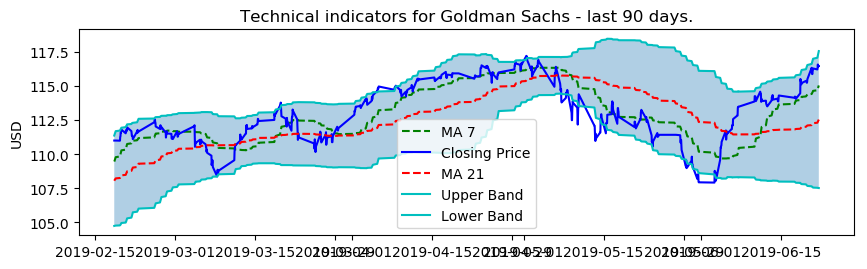

In [24]:
fig2 = ji.plot_technical_indicators(stock_df)

In [25]:
## SAVE FULL CSV WITH TECH INDICATORS
def save_df_to_csv_ask_to_overwrite(stock_df, filename = '_stock_df_with_technical_indicators.csv',):
    import os
    current_files = os.listdir()

    processed_data_filename = filename#'_stock_df_with_technical_indicators.csv'

    # check if csv already exists
    if processed_data_filename not in current_files:

        stock_df.to_csv(processed_data_filename)

    # Ask the user to overwrite existing file
    else:

        print('File already exists.')
        check = input('Overwrite?(y/n):')

        if check.lower() == 'y':
            stock_df.to_csv(processed_data_filename)
            print(f'File {processed_data_filename} was saved.')
    
        else:
            print('No file was saved.')
            
# save_df_to_csv_ask_to_overwrite(stock_df,'stock_df_for_modeling.csv')

## Checking for Stationarity and Trends

In [26]:
# from functions_combined_BEST import stationarity_check, adf_test

Results of Dickey-Fuller Test:
	If p<.05 then timeseries IS stationary.
Test Statistic                   -1.824991
p-value                           0.368127
#Lags Used                       32.000000
Number of Observations Used    4490.000000
Critical Value (1%)              -3.431807
Critical Value (5%)              -2.862184
Critical Value (10%)             -2.567113
dtype: float64


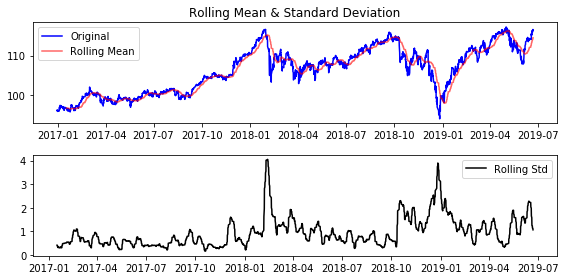

In [27]:
# Check if stationary
ji.stationarity_check(stock_df, col='price',freq=ji.custom_BH_freq())

In [28]:
ji.adf_test(stock_df['price'], title='Price')

Augmented Dickey-Fuller Test: Price
ADF test statistic        -1.824991
p-value                    0.368127
# lags used               32.000000
# observations          4490.000000
critical value (1%)       -3.431807
critical value (5%)       -2.862184
critical value (10%)      -2.567113
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


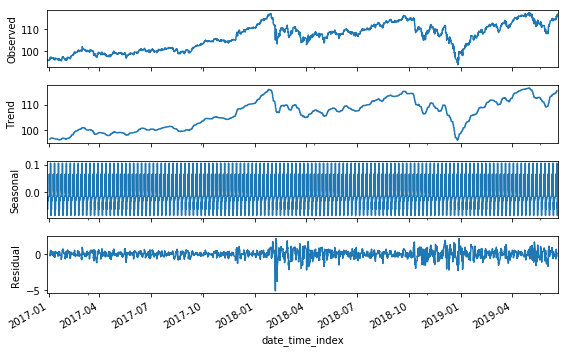

In [29]:
# Adding a seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_df['price'], freq=35)#, freq=custom_BH_freq())

mpl.rcParams['figure.figsize'] = (8,5)
result.plot();

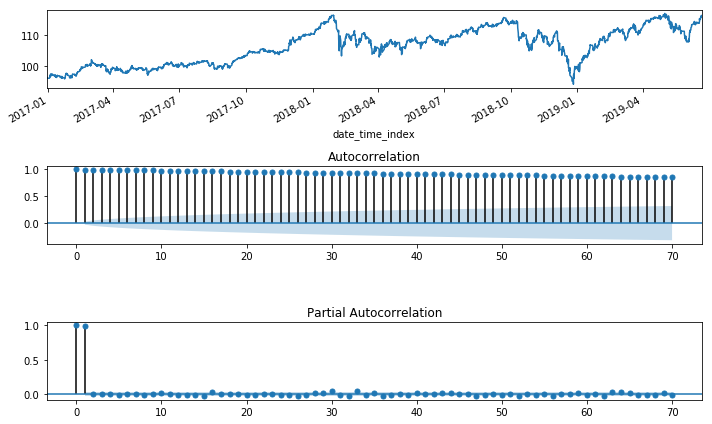

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_df = stock_df['price']

fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(10,6))

plot_df.plot(ax=ax[0])
# df2.plot(ax=ax[0,1])

num_lags = 70
plot_acf(plot_df,ax=ax[1] , lags=num_lags);
# plot_acf(df2,ax=ax[1,1],lags=40);

plot_pacf(plot_df,ax=ax[2],lags=num_lags);
# plot_pacf(df2,ax=ax[2,1],lags=40);

plt.tight_layout()

# INITIAL MODEL 


## Pyramind ARIMA GridSearch 
#### **Using `pmdarima` to grid search for best ARIMA model type and orders**

- Using `auto_arima` from `pmdarima`

- SARIMA involves multiple sets of hyperparameters:
    - For base model: a set of p,d,q parameters
    - For seasonal model:a set of P,D,Q for the seasonal components.
    - m = the number of time periods to include in the season 
    
- Set start and max values for each parameter
    - i.e. `start_p=0, max_p = 10`
- For seasonal data, setting `m` indicates how many periods should be considered part of the season.


- **Below is from ["Predicitng the Sotck Market Using Machine Learning and Deep Learning."](https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/):**
> Below are the steps you should follow for implementing auto ARIMA:
    1. Load the data: This step will be the same. Load the data into your notebook
    2. Preprocessing data: The input should be univariate, hence drop the other columns
    3. Fit Auto ARIMA: Fit the model on the univariate series
    4. Predict values on validation set: Make predictions on the validation set
    5. Calculate RMSE: Check the performance of the model using the predicted values against the actual values

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
skip=True
if skip==False:
    from pmdarima.arima import auto_arima

    model = auto_arima(train_data['price'], start_p=1, start_q=1, D=1, max_p=4,max_q=4,trace=True,seasonal=True,m=35)
    model.summary()

___
**Results of the Auto-Arima searching with training data set:**
- Training Set= all data less the last 90 days:

`Model:		SARIMAX(0, 1, 0)x(1, 0, 1, 35)	`
- So what is this really saying?
    - p,d,q = (0,1,0)
        - AR (p) = 0
        - Difference=1
        - MA order(q)=0 
        
    - P,D,Q,m = (1,0,1,35)
        - Seasonal AR(P) = 1
        - Seasonal Differencing =0
        - Seasonal MA(Q)
        - Steps per season (m) = 35 (set by user)

`statsmodels` version of SARIMA called SARIMAX adds an eXogenous variable to the regression.
- Read this: https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/


- WHEN I SWITCH TO DAILY DATA:
`Model:	SARIMAX(1, 1, 1)x(1, 0, 1, 5)`

#### First try a SARIMA model before SARIMAX

-

In [33]:
# from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(train_data['price'], order=(1,1,1),freq='B')
# results = model.fit()
# results.summary()

In [34]:
# # evaluate model
# start = len(train_data)
# end = len(train_data) + len(test_data) - 1
# predictions = results.predict(start=start,end=end).rename('ARIMA Model')

# train_data['price'].iloc[-120*day_freq:].plot()
# test_data['price'].plot()
# predictions.plot()

In [35]:
skip=True
if skip==False:
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    # SARIMAX(0, 1, 0)x(1, 0, 1, 35)	
    # Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 35); AIC=2881.238, BIC=2905.991, Fit time=52.449 seconds
    model = SARIMAX(train_data['price'], order= (1,1,0),seasonal_order=(0,1,1,35), enforce_invertibility=False ) 
    results=model.fit()
    results.summary()

In [36]:
skip=True
if skip==False:
    # evaluate model
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    start = len(train_data)
    end = len(train_data) + len(test_data) - 1
    predictions = results.predict(start=start,end=end).rename('SARIMA Model')
    days_per_period=7

    # Combine preds and true into one df
    df_predictions_sarima = pd.concat([test_data['price'],pd.Series(predictions, index=test_data.index,name='predicted_price')],axis=1)
    df_predictions_sarima.dropna(inplace=True)
    display(df_predictions_sarima.head())

    # calculate rmse
    rmse_sarima = np.sqrt(mean_squared_error(df_predictions_sarima['price'],df_predictions_sarima['predicted_price']))
    print(f"RMSE: {rmse_sarima.round(3)}")

    # Plot results
    plt.plot(train_data['price'].iloc[-120*days_per_period:], label='Training Price')#.plot(label='price - train')
    plt.plot(df_predictions_sarima['price'], label='True Price')
    plt.plot(df_predictions_sarima['predicted_price'], label='Predicted Price')
    plt.ylabel('Stock Price')
    plt.xlabel('Business Day - Hour Resolution')
    plt.title('SARIMA Model')
    plt.legend()
    plt.tight_layout()
    plt.text('2018-10-01',113,f"RMSE: {rmse_sarima.round(3)}", fontdict={'fontsize':10, 'fontweight':'medium'})

# Data Prep/Split Forecasting Stock Market Data
- https://www.evernote.com/l/AApgV1EaL9lEYpujWnwHq62W9QyEKkH4hwA/

def make_scaler_library, transform_cols_from_library, inverse_transform_series<br>
def make_X_y_timeseries_data, make_df_timeseries_bins_by_column<br>
def predict_model_make_results_dict<br>
def save_model

### LOAD DATA
- use prior split `train_data` and `test_data`
- use `make_X_y_timeseries_data` to format data for LSTM

In [37]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib as mpl


# try: stock_df
# except NameError: stock_df = None
    
# if stock_df is None:
    
#     stock_df = pd.read_csv('data/stock_df_with_tech_indicators_CBH_index.csv', index_col=0, parse_dates=True)
#     stock_df = set_timeindex_freq(stock_df,verbose=0)
#     stock_df = stock_df.iloc[:,11:]

#     # DIsply input stock data
#     display(stock_df.head().style.set_caption('Raw Data'))
#     plot_time_series(stock_df['price'])

# Train Test Split Data By Date,MinMaxScale
### EDIT HERE TO CHANGE WINDOWS AND DAYS

### CHANGING ORDER OF PROCESSING PER UDEMY COURSE RECOMMENDATION
- Fit the MinMaxScaler on the TRAINING data
    - `train_test_split_by_last_days`
- THEN use that fit scaler to transform the test data
    - `make_scaler_library`,`transform_cols_from_library`

In [38]:
# # Load and process stock data 
# stock_df = ji.load_raw_stock_data_from_txt(filename="IVE_bidask1min.txt", start_index='2016-12-01',
#                                         clean=True,fill_or_drop_null='drop', freq='CBH',verbose=1)

# stock_df = ji.get_technical_indicators(stock_df)

# # Remove timepoints without enough time periods for all indicators
# na_idx = stock_df.loc[stock_df['upper_band'].isna() == True].index
# stock_df = stock_df.loc[na_idx[-1]+1*na_idx.freq:]
# stock_df = stock_df.iloc[:,10:]
# print(stock_df.index[[0,-1]])

# display(stock_df.head())

In [39]:
# # Plot Stock Data
# stock_index = stock_df.index.to_series()
# df = pd.concat([stock_index,stock_df],axis=1)

# ji.plotly_time_series(df,x_col='date_time_index', y_col='price');

In [40]:
# ji.plot_technical_indicators(stock_df, 30*6)

In [41]:

# import pandas_profiling as pprof 
# pprof.ProfileReport(stock_df)

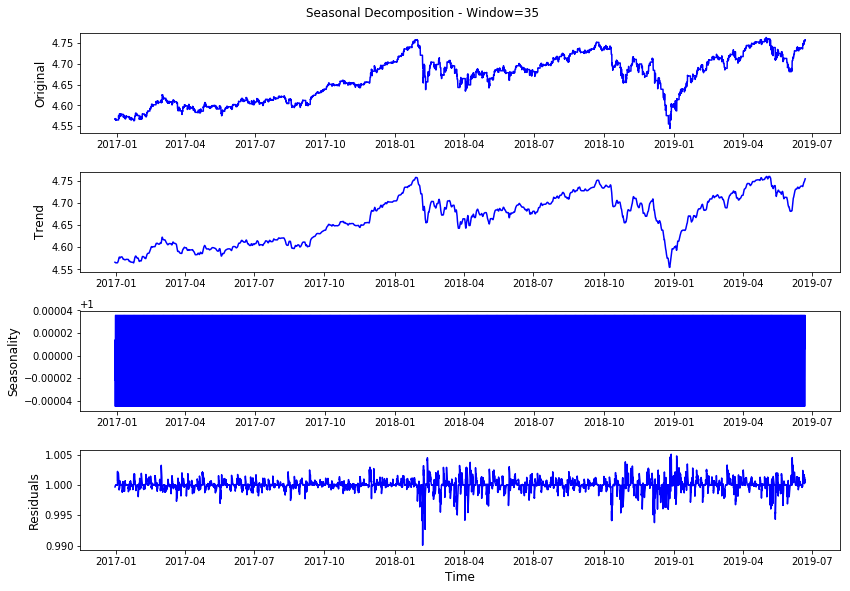

In [42]:
stock_df_decomposed = ji.seasonal_decompose_and_plot(stock_df, col='price', window=35);
# stock_df_decomposed.plot();
# plt.xlim(['2019-01-01','2019-06-01'])

In [43]:
# reload(functions_combined_BEST)
# del train_test_split_by_last_days
# from functions_combined_BEST import train_test_split_by_last_days
# pause

In [44]:
# stock_df.index

## XGBoost

# KERAS

X_window size = 35 -- (5 day(s) * 7 rows/day)

Data split on index:	2019-04-19 15:30:00:
training dates:	2017-11-24 15:30:00 	 2019-04-19 15:30:00.
test dates:	2019-04-19 15:30:00 	 2019-06-21 15:30:00.


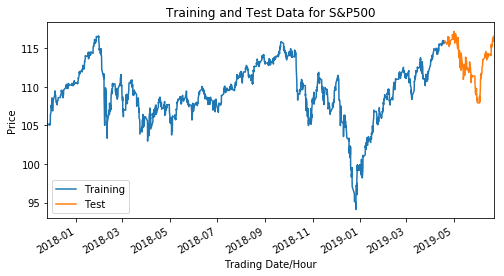

Using TensorFlow backend.


Given the Array: 	(with shape=(1, 35, 1)) 
[0.49466192 0.48798932 0.49065836 0.4866548  0.48487544 0.4866548
 0.48754448 0.48709964 0.49377224 0.50133452 0.50800712 0.52535587
 0.52980427 0.52935943 0.54982206 0.55960854 0.59163701 0.59830961
 0.58941281 0.58629893 0.59252669 0.59030249 0.61076512 0.61343416
 0.62677936 0.64190391 0.64323843 0.63656584 0.62811388 0.63256228
 0.63345196 0.5680605  0.60320285 0.61565836 0.61654804]

Predict this y: 
 [[0.61921708]]


In [45]:
########## SET TRAINING AND TEST SET PARAMETERS: ############
num_test_days=45 # Number of days for test data 
num_train_days=365 # Number of days for training data - 5 days/week * 52 weeks
days_for_x_window = 5 # Number of days to 
############################################################

# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq(stock_df, ji.custom_BH_freq()) # get the # of rows that == 1 day
x_window = periods_per_day * days_for_x_window 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')
    
###### TRAIN TEST SPLIT BY NUMBER OF DAYS ######
df_train, df_test = ji.train_test_split_by_last_days(stock_df, periods_per_day=periods_per_day, num_test_days=num_test_days,
                                                  num_train_days=num_train_days,verbose=1, plot=True)


###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
scaler_library , df_train = ji.make_scaler_library(df_train,transform=True)
# Transform test data with train data's scaler_library
df_test = ji.transform_cols_from_library(df_test,scaler_library)

## Display Preview of Scaled Dataset
# display(df_train.head(2).style.set_caption('df_train'),df_test.head(2).style.set_caption('df_test') )

## REPLACE MADE_DF_TIMESERIES_BINS_BY_COLUMN with Kera's TimeseriesGenerator
from keras.preprocessing.sequence import TimeseriesGenerator

# Define shape of data by specifing these vars:
n_input = x_window # Number of timebins to analyze at once. Note: try to choose # greater than length of seasonal cycles
n_features= 1 # Number of columns
batch_size = 1 # Generally 1 for sequence data

# RESHAPING TRAINING AND TEST DATA 
train_data = df_train['price'].values.reshape(-1,1)
test_data = df_test['price'].values.reshape(-1,1)
train_data_index =  df_train['price'].index
test_data_index = df_test['price'].index


## Create Generator for Training Data
train_generator = TimeseriesGenerator(data=train_data, targets=train_data,length=n_input, batch_size=batch_size )
test_generator = TimeseriesGenerator(data=test_data, targets=test_data,length=n_input, batch_size=batch_size )


# What does the first batch look like?
X,y = train_generator[0]
print(f'Given the Array: \t(with shape={X.shape}) \n{X.flatten()}')
print(f'\nPredict this y: \n {y}')

## KERAS MODEL 1
- **Predicting Price with Keras LSTM - Using ONLY Price**
def predict_model_make_results_dict & def plot_price_vs_preds

In [66]:
def color_cols(df, subset=None, matplotlib_cmap='Greens', rev=False):
    from IPython.display import display
    import seaborn as sns
    
    if rev==True:
        cm = matplotlib_cmap+'_r'
    else:
        cm = matplotlib_cmap
    
    if subset is None:
        return  df.style.background_gradient(cmap=cm)
    else:
        return df.style.background_gradient(cmap=cm,subset=subset)


def arr2series(array,series_index=[],series_name='predictions'):
    """Accepts an array, an index, and a name. If series_index is longer than array:
    the series_index[-len(array):] """
    if len(series_index)==0:
        series_index=list(range(len(array)))
        
    if len(series_index)>len(array):
        new_index= series_index[-len(array):]
        series_index=new_index
        
    series_out = pd.Series(array.ravel(), index=series_index, name=series_name)
    return series_out


def evaluate_regression(y_true, y_pred):
    """Calculates and displays the following evaluation metrics:
    RMSE, R2_score, """
    from sklearn.metrics import r2_score, mean_squared_error
    import numpy as np
    from bs_ds import list2df
    results=[['Metric','Value']]
    
    r2 = r2_score(y_true, y_pred)
    results.append(['R_squared',r2])
    
    RMSE = np.sqrt(mean_squared_error(y_true,y_pred))
    results.append(['Root Mean Squared Error ',RMSE])
    
    U = thiels_U(y_true, y_pred)
    results.append(["Thiel's U", U])
    
    results_df = list2df(results)#, index_col='Metric')
    results_df.set_index('Metric', inplace=True)
    return results_df.round(3)

def thiels_U(ys_true, ys_pred):
    sum_list = []
    num_list=[]
    denom_list=[]
    for t in range(len(ys_true)-1):
        num_exp = (ys_pred[t+1] - ys_true[t+1])/ys_true[t]
        num_list.append([num_exp**2])
        denom_exp = (ys_true[t+1] - ys_true[t])/ys_true[t]
        denom_list.append([denom_exp**2])
    U = np.sqrt( np.sum(num_list) / np.sum(denom_list))
    return U        



def compare_u_for_shifts(true_series,pred_series, shift_list=[-2,-1,0,1,2],plot_all=False,plot_best=True,color_coded=True):
    ## SHIFT THE TRUE VALUES, PLOT, AND CALC THIEL's U
    from bs_ds import list2df
    df = pd.concat([true_series, pred_series],axis=1)
    
    true_colname = 'true'
    pred_colname = 'pred'
    
    df.columns=[true_colname,pred_colname]#.dropna(axis=0,subset=[[true_colname,pred_colname]])
    results=[['# of Bins Shifted','U']]
    
    if plot_all or plot_best:
        plt.figure()

    if plot_all==True:
        df[true_colname].plot(color='black',lw=3,label = 'True Values')
        plt.legend()
        plt.title('Shifted Time Series vs Predicted')
        
        
    for i,shift in enumerate(shift_list):
        if plot_all==True:
            df[pred_colname].shift(shift).plot(label = f'Predicted-Shifted({shift})')

        df_shift=pd.DataFrame()
        df_shift['pred'] = df[pred_colname].shift(shift)
        df_shift['true'] =df[true_colname]
        df_shift.dropna(inplace=True)

        U =thiels_U(df_shift['true'], df_shift['pred'])
        results.append([shift,U])
    
    
    df_results = list2df(results, index_col='# of Bins Shifted')
    
    if plot_best==True:
        shift = df_results.idxmin()[0]
        df[true_colname].plot(label = 'True Values')
        df[pred_colname].shift(shift).plot(ls='--',label = f'Predicted-Shifted({shift})')
        plt.legend()
        plt.title("Best Thiel's U for Shifted Time Series")
        plt.tight_layout()
#         plt.show()

    if color_coded==True:
        dfs_results = color_cols(df_results, rev=True)
        return dfs_results.set_caption("Thiel's U - Shifting Prediction Time bins")
    else:
        return df_results.style.set_caption("Thiel's U - Shifting Prediction Time bins")






def compare_eval_metrics_for_shifts(true_series,pred_series, shift_list=[-2,-1,0,1,2],plot_all=False,plot_best=True):
    ## SHIFT THE TRUE VALUES, PLOT, AND CALC THIEL's U
    from bs_ds import list2df
    df = pd.concat([true_series, pred_series],axis=1)
    
    true_colname = 'true'
    pred_colname = 'pred'
    
    df.columns=[true_colname, pred_colname]#.dropna(axis=0,subset=[[true_colname,pred_colname]])

    results=[['Bins Shifted','Metric','Value']]
    combined_results = pd.DataFrame(columns=results[0])
    
    for shift in shift_list:

        df_shift=pd.DataFrame()
        df_shift[pred_colname] = df[pred_colname].shift(shift)
        df_shift[true_colname] =df[true_colname]
        df_shift.dropna(inplace=True)      
        
        shift_results = evaluate_regression(df_shift[true_colname],df_shift[pred_colname]).reset_index()
        shift_results.insert(0,'Bins Shifted',shift)
        
        combined_results = pd.concat([combined_results,shift_results], axis=0)
    
    combined_results.set_index(['Bins Shifted','Metric'], inplace=True)
    return combined_results

In [67]:
# # results=[['# of Bins Shifted','Metric','Value']]
# # shift_df = pd.DataFrame(columns=results[0])
# # shift_df
# results_tf = evaluate_regression(true_test_series, pred_test_series).reset_index()
# results_tf.insert(0,'Bin #',1)
# results_tf.set_index(['Bin #','Metric'],inplace=True)
# display(results_tf)


In [68]:
# Instantiating clock timer
import bs_ds as bs
clock = bs.Clock(verbose=0)

# defining loss function to use
def my_rmse(y_true,y_pred):
    """RMSE calculation using keras.backend"""
    from keras import backend as kb
    sq_err = kb.square(y_pred - y_true)
    mse = kb.mean(sq_err,axis=-1)
    rmse =kb.sqrt(mse)
    return rmse

# CREATING CALLBACKS
from keras import callbacks
filepath = 'model1_weights.{epoch:02d}.hdf5'
checkpoint = callbacks.ModelCheckpoint(filepath=filepath, monitor=my_rmse,mode='min',
                                       save_best_only=True, verbose=1)
early_stop = callbacks.EarlyStopping(monitor=my_rmse,mode='min',patience=1,min_delta=.001,verbose=1)
callbacks = [checkpoint,early_stop]


# creating LOG list for forthcoming results
LOG = [['Test #','Defining difference','RunTime','Test_RMSE_keras','Test_RMSE_price','acc','Train_RMSE_keras','Train_RMSE_price']]

from keras.models import Sequential
from keras.layers import Bidirectional, Dense, LSTM, Dropout
from keras import optimizers

# Specifying input shape (size of samples, rank of samples?)
input_shape=(n_input, n_features)

# Create model architecture
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape =input_shape))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(1))

# nadam = optimizers.Nadam(lr=0.002,)

model.compile(loss=my_rmse, optimizer=optimizers.Nadam(), metrics=['acc', my_rmse])#optimizer=optimizers.Nadam()
display(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 35, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


None

------------------------------------------------------------------------------------------------------------------------
	FITTING MODEL:
------------------------------------------------------------------------------------------------------------------------ 

Epoch 1/2
 - 109s - loss: 0.0376 - acc: 7.9334e-04 - my_rmse: 0.0376
Epoch 2/2
 - 97s - loss: 0.0199 - acc: 7.9334e-04 - my_rmse: 0.0199


Lap #,Start Time,Duration,Label
1,07/24/19 - 04:25:42 PM,207.473 sec,




------------------------------------------------------------------------------------------------------------------------
	EVALUATE MODEL:
------------------------------------------------------------------------------------------------------------------------


,Training Data,Test Data
acc,0.000793,0.000000
loss,0.014765,0.020422
my_rmse,0.014765,0.020422


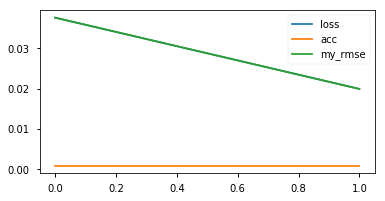

In [69]:
print('---'*40)
print('\tFITTING MODEL:')
print('---'*40,'\n')     
# start the timer
clock.tic('')

# Fit the model
history = model.fit_generator(train_generator,epochs=2,verbose=2,callbacks=callbacks,workers=3)

model_results = model.history.history

# print('Loss per epoch: ',loss_per_epoch)
# stop clock
clock.toc('')

def evaluate_model_plot_history(model, train_generator, test_generator):
    """Takes a keras model fit using fit_generator(), a train_generator and test generator.
    Extracts and plots Keras model.history's metrics."""
    # # EVALUATE MODEL PREDICTIONS FROM GENERATOR 
    model_metrics_train = model.evaluate_generator(train_generator)
    model_metrics_test = model.evaluate_generator(test_generator)
    print('\n')
    print('---'*40)
    print('\tEVALUATE MODEL:')
    print('---'*40)
    eval_gen_dict = {}
    eval_gen_dict['Training Data'] = dict(zip(model.metrics_names,model_metrics_train))
    eval_gen_dict['Test Data'] = dict(zip(model.metrics_names,model_metrics_test))

    display(pd.DataFrame(eval_gen_dict))

    # duration = print(clock._lap_duration_)
    model_results = model.history.history
    plt.figure(figsize=(6,3))
    for k,v in model_results.items():
        plt.plot(range(len(v)),v, label=k);
    plt.legend()

    
evaluate_model_plot_history(model, train_generator, test_generator)

### Adding Forecasting Quality Statistic - Thiel's U
- https://docs.oracle.com/cd/E57185_01/CBREG/ch06s02s03s04.html

|Thiel's U Value | Interpretation |
| --- | --- |
| <1 | Forecasting is better than guessing|
| 1 | Forecasting is about as good as guessing|
|>1 | Forecasting is worse than guessing|

$$U = \sqrt{\frac{ \sum_{t=1 }^{n-1}\left(\frac{\bar{Y}_{t+1} - Y_{t+1}}{Y_t}\right)^2}{\sum_{t=1 }^{n-1}\left(\frac{Y_{t+1} - Y_{t}}{Y_t}\right)^2}}$$
- ALSO EXAMINE RECOMMENDATIONS FROM THIS FORUM: https://stats.stackexchange.com/questions/351808/lstm-time-series-forecasting-accuracy

In [70]:
plt.style.use('seaborn-notebook')

print('---'*40)
print('\tEVALUATE MODEL:')
print('---'*40)
# from mod4functions_JMI import plot_keras_history_custom
# plot_keras_history_custom(history);
# [print(f'{k}={np.round(v,4)}') for k,v in model_results.items()];
def get_true_vs_model_preds_df(model, train_generator, test_generator,
                         train_data_index, test_data_index, x_window,
                         true_test_data = df_test['price'], true_train_data=df_train['price']):
    
    # GET PREDICTIONS FOR TRAINING DATA AND TEST DATA
    test_predictions = arr2series( model.predict_generator(test_generator),
                                  test_data_index[x_window:], 'Predicted Test Price')
    
    train_predictions = arr2series( model.predict_generator(train_generator),
                                   train_data_index[x_window:], 'Predicted Train Price')

    # GET TRUE TEST AND TRAIN DATA AS SERIES
    true_test_price = pd.Series( true_test_data.iloc[x_window:],
                                index= test_data_index[x_window:], name='True Test Price')
    
    true_train_price = pd.Series(true_train_data.iloc[x_window:],
                                 index = train_data_index[x_window:], name='True Train Price')

    
    # COMBINE TRAINING DATA AND TESTING DATA INTO 2 DFS (with correct date axis)
    df_true_v_preds_train = pd.concat([true_train_price, train_predictions],axis=1)
    df_true_v_preds_test= pd.concat([true_test_price, test_predictions],axis=1)
    
    return df_true_v_preds_train, df_true_v_preds_test


    
    
def get_predictions_df_and_evaluate_model(model, train_generator, test_generator,
                                          train_data_index, test_data_index, x_window,
                                          true_test_data = df_test['price'], true_train_data=df_train['price'],
                                          inverse_scale =True, scaler=scaler_library['price'],
                                         return_separate=True, plot_results = True):
    
    # Call helper to get predictions and return as dataframes 
    df_true_v_preds_train, df_true_v_preds_test = get_true_vs_model_preds_df(\
        model, train_generator, test_generator,
        train_data_index, test_data_index, x_window,
        true_test_data, true_train_data)
    
#     # GET PREDICTIONS FOR TRAINING DATA AND TEST DATA
#     test_predictions = arr2series( model.predict_generator(test_generator),
#                                   test_data_index[x_window:], 'Predicted Test Price')
    
#     train_predictions = arr2series( model.predict_generator(train_generator),
#                                    train_data_index[x_window:], 'Predicted Train Price')

#     # GET TRUE TEST AND TRAIN DATA AS SERIES
#     true_test_price = pd.Series( true_test_data.iloc[x_window:],
#                                 index= test_data_index[x_window:], name='True Test Price')
    
#     true_train_price = pd.Series(true_train_data.iloc[x_window:],
#                                  index = train_data_index[x_window:], name='True Train Price')

    
#     # COMBINE TRAINING DATA AND TESTING DATA INTO 2 DFS (with correct date axis)
#     df_true_v_preds_train = pd.concat([true_train_price, train_predictions],axis=1)
#     df_true_v_preds_test = pd.concat([true_test_price, test_predictions],axis=1)
    
    
    # COMBINE TRUE/PRED TRAIN/TEST DATA
#     df_model_preds_old = pd.concat([true_train_price,train_predictions,true_test_price,test_predictions], axis=1)
    df_model_preds = pd.concat([df_true_v_preds_train, df_true_v_preds_test],axis=1)

    ## CONVERT BACK TO DOLLARS AND PLOT
    if inverse_scale==True:
        df_model = pd.DataFrame()
        for col in df_model_preds.columns:
            df_model[col] = ji.inverse_transform_series(df_model_preds[col],scaler_library['price']) 
    else:
        df_model = df_model_preds

        
    if plot_results:
        # PLOTTING TRAINING + TRUE/PRED TEST DATA
        ji.plot_true_vs_preds_subplots(df_model['True Train Price'],df_model['True Test Price'], 
                                    df_model['Predicted Test Price'], subplots=True);


    # GET EVALUATION METRICS FROM PREDICTIONS
    true_test_series = df_model['True Test Price'].dropna()
    pred_test_series = df_model['Predicted Test Price'].dropna()
    
    # Get and display regression statistics
    results_tf = evaluate_regression(true_test_series, pred_test_series)
    display(results_tf)

    return df_model

------------------------------------------------------------------------------------------------------------------------
	EVALUATE MODEL:
------------------------------------------------------------------------------------------------------------------------


In [71]:
## GET TRUE VS PRED DATA AND INVERSE TRANSFORM RESULTS BACK TO DOLLARS
df_true_v_preds_train, df_true_v_preds_test = \
get_true_vs_model_preds_df(model, train_generator, test_generator,
                           train_data_index, test_data_index, x_window,
                           true_test_data = df_test['price'], 
                           true_train_data=df_train['price'])

df_true_v_preds_train = df_true_v_preds_train.apply(
    lambda x: ji.inverse_transform_series(x, scaler_library['price']) )


df_true_v_preds_test = df_true_v_preds_test.apply(
    lambda x: ji.inverse_transform_series(x, scaler_library['price']) )


bs.display_side_by_side(df_true_v_preds_train.agg([min,max]),df_true_v_preds_test.agg([min,max]))

,True Train Price,Predicted Train Price
min,94.11,94.892670
max,116.59,116.066025
,True Test Price,Predicted Test Price
min,107.91,107.784851
max,117.19,116.629997


In [72]:
# Check timepoints of train vs test dataframes 
print(df_true_v_preds_train.index[[0,-1]], df_true_v_preds_test.index[[0,-1]])
print(df_true_v_preds_test.index.freq,df_true_v_preds_train.index.freq)

bs.display_side_by_side(df_true_v_preds_train.head(2), df_true_v_preds_test.head(2))

DatetimeIndex(['2017-12-01 15:30:00', '2019-04-19 15:30:00'], dtype='datetime64[ns]', name='date_time_index', freq=None) DatetimeIndex(['2019-04-26 15:30:00', '2019-06-21 15:30:00'], dtype='datetime64[ns]', name='date_time_index', freq=None)
<CustomBusinessHour: CBH=09:30-16:30> <CustomBusinessHour: CBH=09:30-16:30>


,True Train Price,Predicted Train Price
date_time_index,,
2017-12-01 15:30:00,108.03,107.912376
2017-12-04 09:30:00,109.02,107.952576
,True Test Price,Predicted Test Price
date_time_index,,
2019-04-26 15:30:00,115.98,115.397095
2019-04-29 09:30:00,116.20,115.486313


In [73]:
# Get and display regression statistics
results_tf_train = evaluate_regression(
    df_true_v_preds_train['Predicted Train Price'], df_true_v_preds_train['True Train Price']) #true_test_series, pred_test_series)

results_tf_test = evaluate_regression(
    df_true_v_preds_test['Predicted Test Price'], df_true_v_preds_test['True Test Price']) #true_test_series, pred_test_series)


bs.display_side_by_side(results_tf_train, results_tf_test)

,Value
Metric,
R_squared,0.986
Root Mean Squared Error,0.424
Thiel's U,1.529
,Value
Metric,
R_squared,0.938
Root Mean Squared Error,0.550
Thiel's U,1.416


In [74]:
# #TROUBLESHOOTING INVERSE TRANSFORMING DATA
# ji.reload(ji)

# # Examining contents of scaler 
# scaler = scaler_library['price']
# scaler.data_min_, scaler.data_max_, scaler.feature_range

# # DISPLAY THE RANGE OF THE PRICE DATA IN THE TEST AND TRAINING SET
# train_ranges = df_true_v_preds_train.agg([min, max]).style.set_caption('TRAINING DATA RANGES')
# test_ranges = df_true_v_preds_test.agg([min, max]).style.set_caption('TEST DATA RANGES')

# bs.display_side_by_side(train_ranges,test_ranges)

In [95]:
# Original All-in-One Function 
df_model1 = get_predictions_df_and_evaluate_model(model, train_generator, test_generator, train_data_index,
                                       test_data_index, x_window )
display(df_model1.head(2),df_model1.tail(2))

ValueError: Error when checking input: expected lstm_3_input to have shape (35, 1) but got array with shape (35, 13)

,index,U
# of Bins Shifted,,
-4,0,1.89562
-3,1,1.64494
-2,2,1.29107
-1,3,0.890968
0,4,1.32553
1,5,1.62132
2,6,1.8733
3,7,2.07374


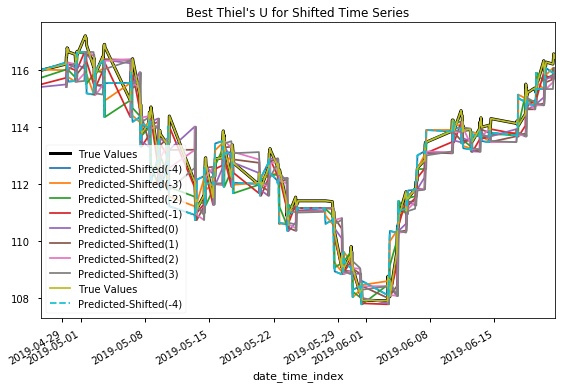

In [78]:
def compare_time_shifted_model(df_model,true_colname='True Test Price',pred_colname='Predicted Test Price',
                               shift_list=[-4,-3,-2,-1,0,1,2,3,4]):
    
    # GET EVALUATION METRICS FROM PREDICTIONS
    true_test_series = df_model[true_colname].dropna()
    pred_test_series = df_model[pred_colname].dropna()
    
    # Comparing Shifted Timebins
    res_df = compare_eval_metrics_for_shifts(true_test_series, pred_test_series,shift_list=np.arange(-4,4,1))
    res_U = compare_u_for_shifts(true_test_series,pred_test_series,shift_list=np.arange(-4,4,1),
                                 plot_all=True)#,plot_best=True)
    display(res_U)
    
    res_df = res_df.swaplevel(i=-2, j=-2, axis=0).unstack(-1)
    res_df = color_cols(res_df)#, subset=['R_squared'])
    display(res_df)
    return res_df;

compare_time_shifted_model(df_model1);

In [77]:
from ipywidgets import interact
functions = {'compare_time_shifted_model':compare_time_shifted_model,
    'compare_eval_metrics_for_shifts':compare_eval_metrics_for_shifts,
              'compare_u_for_shifts':compare_u_for_shifts}
interact(ji.ihelp, any_function = functions);

interactive(children=(Dropdown(description='any_function', options={'compare_time_shifted_model': <function co…

# Bookmark -fixing time series ticks

- https://matplotlib.org/examples/api/date_demo.html
- https://stackoverflow.com/questions/11264521/date-ticks-and-rotation-in-matplotlib ***
- https://python4astronomers.github.io/plotting/advanced.html#controlling-the-appearance-of-plots

### Notes: Using Matplotlib Tick Formatters

`fig.autofmt_xdate(which='both',rotation=30)`

- *Using `matplotlib.dates` and `AutoDateLocator`
```python
import matplotlib.dates as mdates
locator = mdates.AutoDateLocator()
ax1.xaxis.set_major_locator(locator)
ax1.tick_params(axis='x',rotation=30)
# ax2.xaxis.set_major_locator(locator)
ax2.tick_params(axis='x',rotation=30)
fig
```

In [91]:
# fig_,ax1_,ax2_ = ji.plot_true_vs_preds_subplots(df_model1['True Train Price'],df_model1['True Test Price'], 
#                                 df_model1['Predicted Test Price'], subplots=True,figsize=(14,5));
# import matplotlib.dates as mdates
# locator = mdates.AutoDateLocator()
# ax1_.xaxis.set_major_locator(locator)
# ax1_.tick_params(axis='x',rotation=30)
# # ax2.xaxis.set_major_locator(locator)
# ax2_.tick_params(axis='x',rotation=30)

# plt.tight_layout()

In [94]:
ji.reload(ji)

Reloading...



<module 'functions_combined_BEST' from 'D:\\Users\\James\\Dropbox (Personal)\\CODING\\_FLATIRON\\Mod5_FinalProject\\dsc-5-capstone-project-online-ds-ft-021119\\functions_combined_BEST.py'>

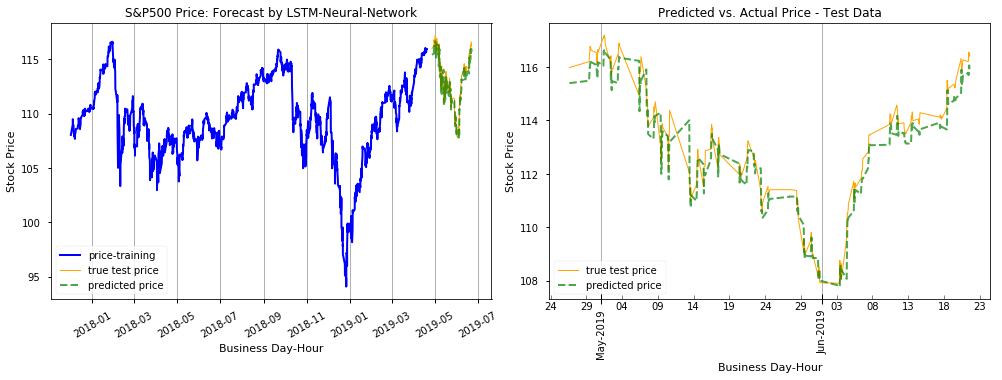

In [93]:
## REFORMAT AND IMPROVE PLOT VISUALS
fig,ax1,ax2 = ji.plot_true_vs_preds_subplots(
    df_model1['True Train Price'], df_model1['True Test Price'],
    df_model1['Predicted Test Price'], subplots=True,figsize=(14,5));


## MY BEST WORKING REFORNATTED TICKS
import matplotlib.dates as mdates
import datetime

# Instantiate Locators to be used
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()#interval=2)  # every month
quarters = mdates.MonthLocator(interval=3)#interval=2)  # every month

# Define various date formatting to be used
monthsFmt = mdates.DateFormatter('%Y-%b')
yearsFmt = mdates.DateFormatter('%Y') #'%Y')
yr_mo_day_fmt = mdates.DateFormatter('%Y-%m')
monthDayFmt = mdates.DateFormatter('%m-%d-%y')


## AX2 SET TICK LOCATIONS AND FORMATTING

# Set locators (since using for both location and formatter)
auto_major_loc = mdates.AutoDateLocator(minticks=5)
auto_minor_loc = mdates.AutoDateLocator(minticks=10)

# Set Major X Axis Ticks
ax1.xaxis.set_major_locator(auto_major_loc)
ax1.xaxis.set_major_formatter(mdates.AutoDateFormatter(auto_major_loc))

# Set Minor X Axis Ticks
ax1.xaxis.set_minor_locator(auto_minor_loc)
ax1.xaxis.set_major_formatter(mdates.AutoDateFormatter(auto_minor_loc))


ax1.tick_params(axis='x',which='both',rotation=30)
# ax1.tick_params(axis='x',which='major',pad=15)
ax1.grid(axis='x',which='major')




## AX2 SET TICK LOCATIONS AND FORMATTING

# Major X-Axis Ticks
ax2.xaxis.set_major_locator(months) #mdates.DayLocator(interval=5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y')) #monthsFmt) #mdates.DateFormatter('%m-%Y')) #AutoDateFormatter(locator=locator))#yearsFmt)

# Minor X-Axis Ticks
ax2.xaxis.set_minor_locator(mdates.DayLocator(interval=5))#,interval=5))
ax2.xaxis.set_minor_formatter(mdates.DateFormatter('%d')) #, fontDict={'weight':'bold'})

# Changing Tick spacing and rotation.
ax2.tick_params(axis='x',which='major',rotation=90, direction='inout',length=10, pad=5)
ax2.tick_params(axis='x',which='minor',length=4,pad=2, direction='in') #,horizontalalignment='right')#,ha='left')
ax2.grid(axis='x',which='major')

# fig.autofmt_xdate(which='both',rotation=30)

plt.show()
# fig

Prior attempts at editing ticks

```python
ax1.xaxis.set_major_locator(plt.MaxNLocator(6))

ax1.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x}"))
ax1.tick_params(axis='x',rotation=45) #get_majorticklabels(), rotation=70 )
ax1.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x}"))

ax1.format_xdata = mdates.DateFormatter('%Y-%m-%d')
fig.autofmt_xdate(rotation=30)

# StrMethod formatter
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.25))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x}"))
ax.text(0.0, 0.1, "StrMethodFormatter('{x}')",
        fontsize=15, transform=ax.transAxes)
# import 

ax2.xaxis.set_major_locator(mpl.ticker.NullLocator())

# fig
fig
```

### Make a plotly version of `plot_true_vs_preds_subplots`


In [82]:
import plotly.express as px
help(px.line())

TypeError: line() missing 1 required positional argument: 'data_frame'

In [83]:
ji.ihelp(ji.plotly_time_series, show_help=True)

---------------------------------------------------------------------------------------------------------
--------- 	HELP:	 ------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------
Help on function plotly_time_series in module functions_combined_BEST:

plotly_time_series(stock_df, title=None, x_col='date_time_index', y_col='price', name='S&P500 Price')



##### SOURCE CODE:
 ____

```python
def plotly_time_series(stock_df,title=None,x_col='date_time_index', y_col='price',name='S&P500 Price'):
    import plotly
    import plotly.offline as py
    import plotly.tools as tls
    import plotly.graph_objs as go

    py.init_notebook_mode(connected=True)

    # %matplotlib inline

    # LEARNING HOW TO CUSTOMIZE SLIDER
    # ** https://plot.ly/python/range-slider/    
    fig = go.Figure()
    
    # Set title
    if title is None:
        title = "Time series with range slider and selectors"

    fig.update_layout(
        title_text=title
    )

    fig.add_trace(go.Scatter(x=stock_df[x_col], y=stock_df[y_col], name=name)) #df.Date, y=df['AAPL.Low'], name="AAPL Low",
    #                          line_color='dimgray'))
    # Add range slider
    fig.update_layout(
        xaxis=go.layout.XAxis(

            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                        label="1m",
                        step="month",
                        stepmode="backward"),
                    dict(count=6,
                        label="6m",
                        step="month",
                        stepmode="backward"),
                    dict(count=1,
                        label="YTD",
                        step="year",
                        stepmode="todate"),
                    dict(count=1,
                        label="1y",
                        step="year",
                        stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        ),

        yaxis = go.layout.YAxis(
                    title=go.layout.yaxis.Title(
                        text = 'S&P500 Price',
                        font=dict(
                            # family="Courier New, monospace",
                            size=18,
                            color="#7f7f7f")
                    )
            )
    )
    fig.show()
    return fig

```
___

In [84]:
def plotly_true_vs_preds_suplots(stock_df,
                                 WORK IN PROGRESS
                                 title=None,x_col='date_time_index', y_col='price',name='S&P500 Price'):
    import plotly
    import plotly.offline as py
    import plotly.tools as tls
    import plotly.graph_objs as go

    py.init_notebook_mode(connected=True)

    # %matplotlib inline

    # LEARNING HOW TO CUSTOMIZE SLIDER
    # ** https://plot.ly/python/range-slider/    
    fig = go.Figure()

    # Set title
    if title is None:
        title = "Time series with range slider and selectors"

    fig.update_layout(
        title_text=title
    )

    fig.add_trace(go.Scatter(x=stock_df[x_col], y=stock_df[y_col], name=name)) #df.Date, y=df['AAPL.Low'], name="AAPL Low",
    #                          line_color='dimgray'))
    # Add range slider
    fig.update_layout(
        xaxis=go.layout.XAxis(

            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                        label="1m",
                        step="month",
                        stepmode="backward"),
                    dict(count=6,
                        label="6m",
                        step="month",
                        stepmode="backward"),
                    dict(count=1,
                        label="YTD",
                        step="year",
                        stepmode="todate"),
                    dict(count=1,
                        label="1y",
                        step="year",
                        stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        ),

        yaxis = go.layout.YAxis(
                    title=go.layout.yaxis.Title(
                        text = 'S&P500 Price',
                        font=dict(
                            # family="Courier New, monospace",
                            size=18,
                            color="#7f7f7f")
                    )
            )
    )
    fig.show()
    return fig

SyntaxError: invalid syntax (<ipython-input-84-0e3f8145fa99>, line 2)

In [85]:
## OLD FUNCTION (TOO MUCH IN ONE)
    # from functions_combined_BEST import get_true_vs_model_pred_df
    # df_model = get_true_vs_model_pred_df(model, n_input, test_generator,test_data_index,df_test,
    #                                      train_generator,train_data_index, df_train,
    #                                      scaler_library['price'],inverse_tf=True, plot=True)

    # # plot_true_vs_preds_subplots(df_model_preds['True Train Price'],df_model_preds['True Test Price'], df_model_preds['Predicted Test Price'], subplots=True)


## KERAS MODEL 2 - COMBINING STOCK PRICE AND INDICATORS

- [ ] already have data in df_train/test just take full dataframe as X (and just 'price' as y)

In [86]:
stock_df.columns

Index(['date_time_index', 'price', 'ma7', 'ma21', '26ema', '12ema', 'MACD',
       '20sd', 'upper_band', 'lower_band', 'ema', 'momentum',
       'filled_timebin'],
      dtype='object')

In [87]:
########## SET TRAINING AND TEST SET PARAMETERS: ############
num_test_days=45 # Number of days for test data 
num_train_days=365 # Number of days for training data - 5 days/week * 52 weeks
days_for_x_window = 1 # Number of days to 
############################################################

# Calculate number of rows to bin for x_windows
periods_per_day = get_day_window_size_from_freq(stock_df, custom_BH_freq()) # get the # of rows that == 1 day
x_window = periods_per_day * days_for_x_window 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')
    
###### TRAIN TEST SPLIT BY NUMBER OF DAYS ######
df_train, df_test = train_test_split_by_last_days(stock_df.drop('filled_timebin',axis=1), periods_per_day=periods_per_day, num_test_days=num_test_days,
                                                  num_train_days=num_train_days,verbose=1, plot=True)


###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
scaler_library , df_train = make_scaler_library(df_train,transform=True)
# Transform test data with train data's scaler_library
df_test = transform_cols_from_library(df_test,scaler_library)

## Display Preview of Scaled Dataset
# display(df_train.head(2).style.set_caption('df_train'),df_test.head(2).style.set_caption('df_test') )

NameError: name 'get_day_window_size_from_freq' is not defined

In [88]:
## REPLACE MADE_DF_TIMESERIES_BINS_BY_COLUMN with Kera's TimeseriesGenerator
from keras.preprocessing.sequence import TimeseriesGenerator

# Define shape of data by specifing these vars:
n_input = x_window # Number of timebins to analyze at once. Note: try to choose # greater than length of seasonal cycles
n_features= df_train.shape[1] # Number of columns
batch_size = 1 # Generally 1 for sequence data

# RESHAPING TRAINING AND TEST DATA 
# train_data = df_train.values #.reshape(-1,1)
# test_data = df_testvalues #.reshape(-1,1)
train_data_index =  df_train.index
test_data_index = df_test.index


## Create Generator for Training Data
train_generator = TimeseriesGenerator(data=df_train.values, targets=df_train['price'].values,# reshape(-1,1),
                                      length=n_input, batch_size=batch_size )

test_generator = TimeseriesGenerator(data=df_test.values, targets=df_test['price'].values, #reshape(-1,1),
                                     length=n_input, batch_size=batch_size )


# What does the first batch look like?
X,y = train_generator[0]
print(f'Given the Array: \t(with shape={X.shape})')#' \n{X.flatten()}')
print(f'\nPredict this y: \n {y}')

Given the Array: 	(with shape=(1, 35, 13))

Predict this y: 
 [0.61921708]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 35, 100)           45600     
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 75,851
Trainable params: 75,851
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/3
 - 104s - loss: 0.0426 - acc: 7.9334e-04
Epoch 2/3
 - 110s - loss: 0.0223 - acc: 7.9334e-04
Epoch 3/3
 - 99s - loss: 0.0187 - acc: 7.9334e-04


Lap #,Start Time,Duration,Label
1,07/24/19 - 04:44:33 PM,314.851 sec,


0:05:14.850700


------------------------------------------------------------------------------------------------------------------------
	EVALUATE MODEL:
------------------------------------------------------------------------------------------------------------------------


,Training Data,Test Data
acc,0.000793,0.000000
loss,0.012883,0.017796


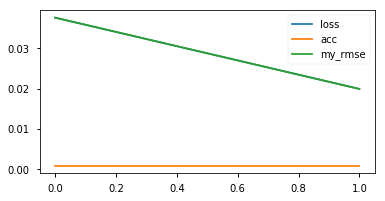

In [89]:
from keras.models import Sequential
from keras.layers import Bidirectional, Dense, LSTM

# Specifying input shape (size of samples, rank of samples?)
# input_shape =  (X_train_in.shape[1],1)
n_input = x_window # number of time bins in a day * number of days
n_features = df_train.shape[1]

input_shape=(n_input, n_features)


# Create model architecture
model2 = Sequential()


model2.add(LSTM(units=100, return_sequences=True, input_shape =input_shape))
model2.add(LSTM(units=50))
model.add(Dense(10))
model2.add(Dense(1))

model2.compile(loss=my_rmse, optimizer=optimizers.Nadam(), metrics=['acc'])#,my_rmse])#,metrics=['acc'])
display(model2.summary())

# start the timer
clock.tic('')

# Fit the model
# history = model2.fit_generator(X_train_in, y_train, epochs=2, verbose=0, validation_split=(0.25))
history = model2.fit_generator(train_generator,epochs=3,verbose=2,callbacks=callbacks,workers=3)

# stop clock
clock.toc('')
duration = print(clock._lap_duration_)

# from mod4functions_JMI import plot_keras_history
# plot_keras_history(history);


# # EVALUATE MODEL PREDICTIONS FROM GENERATOR 
model_metrics_train = model2.evaluate_generator(train_generator)
model_metrics_test = model2.evaluate_generator(test_generator)
print('\n')
print('---'*40)
print('\tEVALUATE MODEL:')
print('---'*40)
eval_gen_dict = {}
eval_gen_dict['Training Data'] = dict(zip(model2.metrics_names,model_metrics_train))
eval_gen_dict['Test Data'] = dict(zip(model2.metrics_names,model_metrics_test))

display(pd.DataFrame(eval_gen_dict))

# duration = print(clock._lap_duration_)
plt.figure(figsize=(6,3))
for k,v in model_results.items():
    plt.plot(range(len(v)),v, label=k);
plt.legend()

In [90]:
ji.reload(ji)
print('---'*40)
print('\tEVALUATE MODEL:')
print('---'*40)
# from mod4functions_JMI import plot_keras_history_custom
# plot_keras_history_custom(history);
# [print(f'{k}={np.round(v,4)}') for k,v in model_results.items()];

# GET PREDICTIONS FOR TRAINING DATA AND TEST DATA
test_predictions = ji.arr2series(model2.predict_generator(test_generator), test_data_index[x_window:], 'Predicted Test Price')
train_predictions = ji.arr2series(model2.predict_generator(train_generator), train_data_index[x_window:], 'Predicted Train Price')

# GET TRUE TEST AND TRAIN DATA AS SERIES
true_test_price = pd.Series( df_test['price'].iloc[n_input:], index= test_data_index[x_window:], name='True Test Price')
true_train_price = pd.Series(df_train['price'].iloc[n_input:],index = train_data_index[x_window:], name='True Train Price')

# COMBINE TRUE/PRED TRAIN/TEST DATA
df_model_preds = pd.concat([true_train_price,train_predictions,true_test_price,test_predictions], axis=1)

## CONVERT BACK TO DOLLARS AND PLOT
df_model_preds_tf = pd.DataFrame()
for col in df_model_preds.columns:
    df_model_preds_tf[col] = inverse_transform_series(df_model_preds[col],scaler_library['price']) 

Reloading...

------------------------------------------------------------------------------------------------------------------------
	EVALUATE MODEL:
------------------------------------------------------------------------------------------------------------------------


NameError: name 'pd' is not defined

In [ ]:
    
# PLOTTING TRAINING + TRUE/PRED TEST DATA
ji.plot_true_vs_preds_subplots(df_model_preds_tf['True Train Price'],df_model_preds_tf['True Test Price'], 
                            df_model_preds_tf['Predicted Test Price'], subplots=True);    


# GET EVALUATION METRICS FROM PREDICTIONS
true_test_series = df_model_preds_tf['True Test Price'].dropna()
pred_test_series = df_model_preds_tf['Predicted Test Price'].dropna()
results_tf = evaluate_regression(true_test_series, pred_test_series)
display(results_tf)

In [ ]:
# COMPARE SHIFTED VALUES FOR THIEL's U
res_u = compare_u_for_shifts(true_test_price,test_predictions,shift_list=np.arange(-4,4,1), plot_all=False,plot_best=True)
display(res_u)
# compare_u_for_shifts(true_test_price,test_predictions,shift_list=np.arange(-4,4,1), plot_all=False,plot_best=True)
res_df = compare_eval_metrics_for_shifts(true_test_price, test_predictions,shift_list=np.arange(-4,4,1))

res_df_ = res_df.swaplevel(i=-2, j=-2, axis=0).unstack(-1)
# res_df_.index
display(res_df_)

In [ ]:
save_model_and_weights(model2,'stock_plus_indicators_U39_shift-1')


___

___

## Blog Post Code
- NEW BLOG POST - LSTM TIME SERIES FORECASTING
    - https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
- https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/

In [ ]:
stop

In [ ]:
from keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, LSTM, Dense, MaxPooling1D
model3 = Sequential()
# input_shape =  (X_train_in.shape[0],X_train_in.shape[1],1)
input_shape=(n_input, n_features,1)

model3.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=input_shape)) #(None, n_steps, n_features)))
model3.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model3.add(TimeDistributed(Flatten()))
model3.add(LSTM(50, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss=my_rmse)
model3.summary()
# fit model

clock.tic('')
history3 = model3.fit_generator( train_generator,epochs=3,verbose=2,callbacks=callbacks,workers=3)

clock.toc('')
evaluate_model_plot_history(model3, train_generator, test_generator)

In [ ]:
#(X_train_in, y_train, epochs=500, verbose=0)
# demonstrate prediction
# x_input = array([60, 70, 80, 90])
# x_input = x_input.reshape((1, n_seq, n_steps, n_features))

# yhat = model.predict(X_test_in, verbose=0)
# print(yhat)

# predictions = pd.Series(predictions.ravel(),name='predicted_price',index=index_test)
# true_price =  pd.Series(y_test,name='true_price',index=index_test)

# df_predictions = pd.concat([predictions,true_price],axis=1)#, columns=['predicted_price','true_price'], index=index_test)
# display(df_predictions.head())

# # Plot outcome
# mpl.rcParams['figure.figsize']=(12,4)
# plt.plot(df_train_bins['price_labels'])
# plt.plot(df_predictions)


In [ ]:
print('---'*40)
print('\tEVALUATE MODEL:')
print('---'*40)
# from mod4functions_JMI import plot_keras_history_custom
# plot_keras_history_custom(history);
# [print(f'{k}={np.round(v,4)}') for k,v in model_results.items()];

# GET PREDICTIONS FOR TRAINING DATA AND TEST DATA
test_predictions = arr2series(model3.predict_generator(test_generator), test_data_index[x_window:], 'Predicted Test Price')
train_predictions = arr2series(model3.predict_generator(train_generator), train_data_index[x_window:], 'Predicted Train Price')

# GET TRUE TEST AND TRAIN DATA AS SERIES
true_test_price = pd.Series( df_test['price'].iloc[n_input:], index= test_data_index[x_window:], name='True Test Price')
true_train_price = pd.Series(df_train['price'].iloc[n_input:],index = train_data_index[x_window:], name='True Train Price')

# COMBINE TRUE/PRED TRAIN/TEST DATA
df_model_preds = pd.concat([true_train_price,train_predictions,true_test_price,test_predictions], axis=1)

## CONVERT BACK TO DOLLARS AND PLOT
df_model_preds_tf = pd.DataFrame()
for col in df_model_preds.columns:
    df_model_preds_tf[col] = inverse_transform_series(df_model_preds[col],scaler_library['price']) 

    
# PLOTTING TRAINING + TRUE/PRED TEST DATA
plot_true_vs_preds_subplots(df_model_preds_tf['True Train Price'],df_model_preds_tf['True Test Price'], 
                            df_model_preds_tf['Predicted Test Price'], subplots=True);    


# GET EVALUATION METRICS FROM PREDICTIONS
true_test_series = df_model_preds_tf['True Test Price'].dropna()
pred_test_series = df_model_preds_tf['Predicted Test Price'].dropna()
results_tf = evaluate_regression(true_test_series, pred_test_series)
display(results_tf)



In [ ]:
STOP
# PREVIEW DATA CONTENTS
# display(df_train_bins.head())
df_train_bins['price_labels'].plot()
df_test_bins['price_labels'].plot()


print('Train Index: ',df_train_bins.index[[0,-1]])
print('Test Index: ',df_test_bins.index[[0,-1]])

In [ ]:
#importing required libraries

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

time_index =stock_df.index.values
stock_df['date'] = time_index# .astype('str')

#creating dataframe
data = stock_df[['date','price']]

new_data = pd.DataFrame(index=range(0,len(stock_df)),columns=['date', 'price'])
display(new_data.head()), display(data.head())

for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['price'][i] = data['price'][i]

#setting index
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)


In [ ]:
new_data

In [ ]:
#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape, y_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

In [ ]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['price'])
plt.plot(valid[['price','Predictions']])
plt.show()

# ✔ BOOKMARK - RESUMING ANALYSIS WITH NEW FUNCTIONS
- Check Evernote log: https://www.evernote.com/l/AApgV1EaL9lEYpujWnwHq62W9QyEKkH4hwA/


## Load In NLP Twitter Model

In [ ]:
STOP

In [ ]:
# from functions_combined_BEST import *
import pandas as pd

In [ ]:
pd.set_option('display.max_columns',None)
df_tokenize = pd.read_csv('twitter_df_tokenized_with_price.csv',index_col=0, parse_dates=True)
df_tokenize.head()


In [ ]:
# Word2Vec 
filename = 'word2vec_model_twitter.pickle'
import pickle
with open(filename,'rb') as f:
    word_model,vector_size,embedding_matrix = pickle.load(f)

In [ ]:
# Loading in twitter LSTM model
from keras.models import model_from_json
with open ('bestNLPmodel_best_stock_increase.json','r') as f:
    twitter_model = model_from_json(f.read())
    twitter_model.load_weights('bestNLPmodel_best_stock_increase.h5')
    
for i, model_layer in enumerate(twitter_model.layers):
    twitter_model.get_layer(index=i).trainable=False
    print(model_layer,twitter_model.get_layer(index=i).trainable)
    
    
twitter_model.summary()

### LOADING IN TWITTER DATA TO GROUP

In [ ]:
ihelp(ji.load_raw_twitter_file), ihelp(ji.full_twitter_df_processing)

In [ ]:
import pandas as pd
import functions_combined_BEST as ji

In [81]:
ji.ihelp(ji.full_twitter_df_processing)

##### SOURCE CODE:
 ____

```python
def full_twitter_df_processing(df,raw_tweet_col='content', cleaned_tweet_col='content', case_ratio_col='content_min_clean', 
sentiment_analysis_col='content_min_clean', RT=True, urls=True,  hashtags=True, mentions=True, str_tags_mentions=True,stopwords_list=[], force=False):
    """Accepts df_full, which contains the raw tweets to process, the raw_col name, the column to fill.
    If force=False, returns error if the fill_content_col already exists.
    Processing Workflow:1) Create has_RT, starts_RT columns. 2) Creates [fill_content_col,`content_min_clean`] cols after removing 'RT @mention:' and urls.
    3) Removes hashtags from fill_content_col and saves hashtags in new col. 4) Removes mentions from fill_content_col and saves to new column."""
    # Save 'hashtags' column containing all hastags
    import re
    from nltk import regexp_tokenize
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    track_fill_content_col=0

    fill_content_col = cleaned_tweet_col

    if force==False:
        if cleaned_tweet_col in df.columns:
            raise Exception(f'{fill_content_col} already exists. To overwrite, set force=True.')

    # if raw_tweet_col == cleaned_tweet_col:
    #     raw_tweets = 'content_raw'
    #     df[raw_tweets] = df[tweet_col].copy()


    if RT ==True:

        # Creating columns for tweets that `has_RT` or `starts_RT`
        df['has_RT']=df[raw_tweet_col].str.contains('RT')
        df['starts_RT']=df[raw_tweet_col].str.contains('^RT')

        ## FIRST REMOVE THE RT HEADERS

        # Remove `RT @Mentions` FIRST:
        re_RT = re.compile('RT [@]?\w*:')

        check_content_col = raw_tweet_col
        fill_content_col = cleaned_tweet_col

        df['content_starts_RT'] = df[check_content_col].apply(lambda x: re_RT.findall(x))
        df[fill_content_col] =  df[check_content_col].apply(lambda x: re_RT.sub(' ',x))
        track_fill_content_col+=1


    if urls==True:
        ## SECOND REMOVE URLS
        # Remove urls with regex
        urls = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")
        
        if track_fill_content_col==0:
            check_content_col = raw_tweet_col
        else:
            check_content_col = fill_content_col

        fill_content_col = fill_content_col

        # df_full['content_urls'] = df_full[check_content_col].apply(lambda x: urls.findall(x))
        df[fill_content_col] =  df[check_content_col].apply(lambda x: urls.sub(' ',x))

        ## SAVE THIS MINIMALLY CLEANED CONTENT AS 'content_min_clean'
        df['content_min_clean'] =  df[fill_content_col]
        track_fill_content_col+=1

    if hashtags==True:

        if track_fill_content_col==0:
            check_content_col = raw_tweet_col
        else:
            check_content_col = fill_content_col

        fill_content_col = fill_content_col

        ## REMOVE AND SAVE HASHTAGS, MENTIONS
        # Remove and save Hashtags
        hashtags = re.compile(r'\#\w*')

        df['content_hashtags'] =  df[check_content_col].apply(lambda x: hashtags.findall(x))
        df[fill_content_col] =  df[check_content_col].apply(lambda x: hashtags.sub(' ',x))
        track_fill_content_col+=1
        
        if str_tags_mentions==True: 
            df['hashtag_strings'] = df['content_hashtags'].apply(lambda x: empty_lists_to_strings(x))
        

    if mentions==True:

        if track_fill_content_col==0:
            check_content_col = raw_tweet_col
        else:
            check_content_col = fill_content_col

        fill_content_col = fill_content_col

        # Remove and save mentions (@)'s
        mentions = re.compile(r'\@\w*')


        df['content_mentions'] =  df[check_content_col].apply(lambda x: mentions.findall(x))
        df[fill_content_col] =  df[check_content_col].apply(lambda x: mentions.sub(' ',x))
        track_fill_content_col+=1

        if str_tags_mentions==True: 
            df['mention_strings'] = df['content_mentions'].apply(lambda x: empty_lists_to_strings(x))


    # Creating content_stopped columns and then tokens_stopped column
    stop_col_name = fill_content_col+'_stop'
    stop_tok_col_name =  fill_content_col+'_stop_tokens'

    if len(stopwords_list)==0:
        stopwords_list=make_stopwords_list()

    df[stop_col_name] = df[fill_content_col].apply(lambda x: apply_stopwords(stopwords_list,x,tokenize=True, return_tokens=False, pattern=pattern))
    df[stop_tok_col_name] = df[stop_col_name].apply(lambda x: apply_stopwords(stopwords_list,x,tokenize=True, return_tokens=True, pattern=pattern))

    
    ## Case Ratio Calculation (optional)
    if case_ratio_col is not None:
        df['case_ratio'] = df[case_ratio_col].apply(lambda x: case_ratio(x))

    ## Sentiment Analysis (optional)
    if sentiment_analysis_col is not None:
        df = full_sentiment_analysis(df,source_column=sentiment_analysis_col,separate_cols=True)
    
    df.sort_index(inplace=True)
    return df

```
___

In [ ]:
### LOAD IN AND PROCESS TWITTER DATA
ji.reload(ji)
twitter_df= ji.load_raw_twitter_file()
twitter_df = ji.full_twitter_df_processing(twitter_df,cleaned_tweet_col='clean_content')

# cols_to_drop = ['has_RT','starts_RT','content_starts_RT','content_hashtags','content_mentions']
# twitter_df.drop(cols_to_drop,axis=1,inplace=True)

display(twitter_df.head())
print(twitter_df.index[[0,-1]],twitter_df.index.freq)

In [ ]:
# # ofst = pd.offsets.CustomBusinessHour(start='09:30',end='16:30',)
# # ofstBH = pd.offsets.BusinessHour(n=1, start='09:30',end='16:30')
# # ts = pd.to_datetime('2019-07-11 14:23')
# # ofst.rollback(ts)
# num_offset=1
# twitter_df['date']
# freq=pd.offsets.CustomBusinessHour(n=num_offset,start='09:30',end='16:30')
# ofst = pd.offsets.CustomBusinessHour(n=num_offset,start='09:30',end='16:30') #freq=ji.custom_BH_freq()
# ofst.rollback(twitter_df['date'].iloc[0])

In [ ]:

def make_time_index_intervals(twitter_df,col ='date', start=None,end=None, freq='CBH',num_offset=1):
    """Takes a df, rounds first timestamp down to nearest hour, last timestamp rounded up to hour.
    Creates 30 minute intervals based that encompass all data."""
    import pandas as pd
    
    
    if freq=='CBH':
        freq=pd.offsets.CustomBusinessHour(n=num_offset,start='09:30',end='16:30')
        ofst = pd.offsets.CustomBusinessHour(n=num_offset,start='09:30',end='16:30') #freq=ji.custom_BH_freq()
        ofst_early = pd.offsets.CustomBusinessHour(n=-num_offset,start='09:30',end='16:30') #freq=ji.custom_BH_freq()
    if freq=='T':
        ofst = pd.offsets.Minute(n=num_offset)
        ofst_early = pd.offsets.Minute(n=-num_offset)
        
    if freq=='H':
        ofst = pd.offsets.Hour(n=num_offset)
        ofst_early=pd.offsets.Hour(n=-num_offset)

#     print(ofst)
    if start is None:
        # Get timebin before the first timestamp that starts     
        start_idx = ofst.rollback(twitter_df[col].iloc[0].floor('H'))
    else:
        start_idx = pd.to_datetime(start)

    if end is None:
        # Get timbin after last timestamp that starts 30m into the hour.
        end_idx= ofst.rollforward(twitter_df[col].iloc[-1].ceil('H'))
    else:
        end_idx = pd.to_datetime(end)


    # Make time bins using the above start and end points 
    print(f'start:{start_idx}, end:{end_idx}, freq:{freq}')
    time_range = pd.date_range(start =start_idx, end = end_idx, freq=freq)#.to_period()
    time_intervals = pd.interval_range(start=start_idx, end=end_idx,freq=freq,name='CBH_intervals',closed='left')
    
    return time_intervals


def int_to_ts(int_list, as_datetime=False, as_str=True):
    """Helper function: accepts one Panda's interval and returns the left and right ends as either strings or Timestamps."""
    import pandas as pd
    if as_datetime & as_str:
        raise Exception('Only one of `as_datetime`, or `as_str` can be True.')
    
    left_edges =[]
    right_edges= []
    
    for interval in int_list:
        
        int_str = interval.__str__()[1:-1]
        output = int_str.split(',')
        left_edges.append(output)
#         right_edges.append(right)
        
    
    if as_str:
        return left_edges#, right_edges
    
    elif as_datetime:
        left = pd.to_datetime(left)
        right = pd.to_datetime(right)
        return left,right
    

def bin_df_by_date_intervals(test_df,time_intervals,column='date',roll_freq='CBH'):
    """Uses pd.cut with half_hour_intervals on specified column.
    Creates a dictionary/map of integer bin codes. 
    Adds column"int_bins" with int codes.
    Adds column "left_edge" as datetime object representing the beginning of the time interval. 
    Returns the updated test_df and a list of bin_codes."""
    import pandas as pd
    
    if roll_freq=='CBH':
        ofst = pd.offsets.CustomBusinessHour(start='09:30',end='16:30')
        
        # Make a rolled_date column to use for bining
        test_df['rolled_date'] = test_df[column].apply(lambda x: ofst.rollforward(x))
    
    # Cut The Date column into interval bins, 
    cut_date = pd.cut(test_df['rolled_date'], bins=time_intervals)#,labels=list(range(len(half_hour_intervals))), retbins=True)
    test_df['int_times'] = cut_date    
    print(test_df.isna().sum())
    test_df.dropna(inplace=True)
    # convert to str to be used as group names/codes
    unique_bins = cut_date.astype('str').unique()
    num_code = list(range(len(unique_bins)))
    
    # Dictioanry of number codes to be used for interval groups
    bin_codes = dict(zip(num_code,unique_bins))#.astype('str')

    
    # Mapper dictionary to convert intervals into number codes
    bin_codes_mapper = {v:k for k,v in bin_codes.items()}

    # Add column to the dataframe, then map integer code onto it
    test_df['int_bins'] = test_df['int_times'].astype('str').map(bin_codes_mapper)
    
    # Get the left edge of the bins to use later as index (after grouped)
    edges_out =int_to_ts(test_df['int_bins'])#.apply(lambda x: int_to_ts(x))    
    test_df['bin_edges'] = edges_out#pd.to_datetime(edges_out)

    # bin codes to labels 
    bin_codes = [(k,v) for k,v in bin_codes.items()]
    
    return test_df, bin_codes



def concatenate_group_data(group_df_or_series):
    """Accepts a series or dataframe from a groupby.get_group() loop.
    Adds TweetFreq column for # of rows concatenate. If input is series, 
    TweetFreq=1 and series is returned."""
    
    import pandas as pd
    from pandas.api import types as tp
    
    if isinstance(group_df_or_series, pd.Series):
        
        group_data = group_df_or_series
        
#         group_data.index = group_df_or_series.index
        group_data['TweetFreq'] = 1

        return group_data
    
    # if the group is a dataframe:
    elif isinstance(group_df_or_series, pd.DataFrame):
        
        df = group_df_or_series
        
        # create an output series to collect combined data
        group_data = pd.Series(index=df.columns)
        group_data['TweetFreq'] = df.shape[0]
        

        for col in df.columns:
            
            combined=[]
            col_data = []
            
            col_data = df[col]
            combined=col_data.values
            
            group_data[col] = combined

    return group_data


def collapse_df_by_group_index_col(twitter_df,group_index_col='int_bins', new_col_order=None):
    """Loops through the group_indices provided to concatenate each group into
    a single row and combine into one dataframe with the ______ as the index"""

    import pandas as pd


    # Create a Panel to temporarily hold the group series and dataframes
    # group_dict_to_df = {}
    # create a dataframe with same columns as twitter_df, and index=group ids from twitter_groups
        
    group_indices = twitter_df.groupby(group_index_col).groups
    group_indices = [(k,v) for k,v in group_indices.items()]
    group_df_index = [x[0] for x in group_indices]
    
    
    # Create empty shell of twitter_grouped dataframe
    twitter_grouped = pd.DataFrame(columns=twitter_df.columns, index=group_df_index)
    twitter_grouped['TweetFreq'] =0

    
    # Loop through each group_indices
    for (idx,group_members) in group_indices:

        group_df = twitter_df.loc[group_members]

        # Call on concatenate_group_data to handle the merging of rows
        combined_series = concatenate_group_data(group_df)

#         twitter_grouped.loc[idx,:] = combined_series
        twitter_grouped.loc[idx] = combined_series#.values

    # Update Column order, if requested, otherwise return twitter_grouped
    if new_col_order==None:
        return twitter_grouped
    else:
        df_out = twitter_grouped[new_col_order].copy()
        df_out.index = group_df_index#twitter_grouped.index
        return df_out

In [ ]:
twitter_df.head()

In [ ]:
# ofst.rollback(twitter_df.index[0].)
def test_ofst_rolling(i=0):
    """Tool to help visualize the effect of offsets when deterimining a time interval range."""
    ofst = pd.offsets.CustomBusinessHour(start='09:30',end='16:30',)
    print('TS: \t\t',twitter_df.index[i])
    print('TS.floor(H): \t',twitter_df.index[i].floor('H'))
    print('TS rollback: \t\t',ofst.rollback(twitter_df.index[i]))
    print('TS rollforward: \t',ofst.rollforward(twitter_df.index[i]))
    print('\n')
    print('TS floor(H)-rollback: \t',ofst.rollback(twitter_df.index[i].floor('H')))
    print('TS floor(H)-rollforward: ',ofst.rollforward(twitter_df.index[i].floor('H')))

test_ofst_rolling(0)

In [ ]:
# ## ORIGINAL CODE FRAMEWORK
# half_hour_intervals = make_half_hour_range(twitter_df)

# twitter_df, bin_codes = bin_df_by_date_intervals(twitter_df, half_hour_intervals)

# ## NOT A FUNCTION:
# group_indices = twitter_df.groupby('int_bins').groups
# group_indices = [(k,v) for k,v in group_indices.items()]

# twitter_grouped = collapse_df_by_group_indices(twitter_df, group_indices)#, new_col_order=new_col_order)
# # twitter_grouped.head(2)

# twitter_grouped['time_bin'] = twitter_grouped['left_edge'].apply(lambda x: pd.to_datetime(x[0]))
# twitter_grouped.set_index('time_bin',drop=True, inplace=True)
# twitter_grouped.head(2)

In [ ]:
pd.set_option('display.max_columns',None)
# display(twitter_df.head(2), twitter_df.tail(2))

In [ ]:
## NEW CODE FRAMEWORK
time_intervals = make_time_index_intervals(twitter_df)

twitter_df, bin_codes = bin_df_by_date_intervals(twitter_df,time_intervals)


twitter_grouped = collapse_df_by_group_index_col(twitter_df, group_index_col='int_bins')
display(twitter_grouped.head())
# twitter_grouped['time_bin'] = twitter_grouped['left_edge'].apply(lambda x: pd.to_datetime(x[0]))
# twitter_grouped.set_index('time_bin',drop=True, inplace=True)
# twitter_grouped.head(2)

# CBH = custom_BH_freq()

# grouped_resampled = twitter_grouped.loc['02-21-2017':].asfreq(CBH)
# stock_resampled = stock_df.loc['02-21-2017':].asfreq(CBH)
# # grouped_resampled = grouped_resampled.loc[stock_df.index[0]:stock_df.index[-1]]

# grouped_resampled['join_date'] = grouped_resampled.index
# stock_df['join_date'] =  stock_df.index

# print(grouped_resampled.join_date)
# print(stock_df.join_date)

# # print(len(grouped_resampled),len(twitter_grouped))

# # compare_indices = [True for i in grouped_resampled.index if i in stock_df.index]
# # np.sum(compare_indices==False)

In [ ]:
# #***#
# new_col_order = ['date','left_edge','content_raw','content_stopped','tokens_stopped',
#                   'retweet_count','favorite_count','case_ratio','sentiment_scores','compound_score','int_bins']
# for col in new_col_order:
#     print(col,'\t',col in twitter_df.columns)

In [ ]:
# twitter_grouped = collapse_df_by_group_indices(twitter_df, group_indices)#, new_col_order=new_col_order)
# twitter_grouped.head(2)

twitter_grouped['time_bin'] = twitter_grouped['left_edge'].apply(lambda x: pd.to_datetime(x[0]))
twitter_grouped.set_index('time_bin',drop=True, inplace=True)
twitter_grouped.head(2)

## ADDING TWITTER EXTRACTION TO MODEL-PREPARATION

In [ ]:
# NEED TO HAVE DATA COMBINED ALREADY (THO DONT WANT TO SCALE??)


In [ ]:
########## SET TRAINING AND TEST SET PARAMETERS: ############
num_test_days=45 # Number of days for test data 
num_train_days=365 # Number of days for training data - 5 days/week * 52 weeks
days_for_x_window = 5 # Number of days to 
############################################################

# Calculate number of rows to bin for x_windows
periods_per_day = ji.get_day_window_size_from_freq(stock_df, ji.custom_BH_freq()) # get the # of rows that == 1 day
x_window = periods_per_day * days_for_x_window 
print(f'X_window size = {x_window} -- ({days_for_x_window} day(s) * {periods_per_day} rows/day)\n')
    
###### TRAIN TEST SPLIT BY NUMBER OF DAYS ######
df_train, df_test = ji.train_test_split_by_last_days(stock_df, periods_per_day=periods_per_day, num_test_days=num_test_days,
                                                  num_train_days=num_train_days,verbose=1, plot=True)


###### RESCALE DATA USING MinMaxScalers FIT ON TRAINING DATA's COLUMNS ######
scaler_library , df_train = ji.make_scaler_library(df_train,transform=True)
# Transform test data with train data's scaler_library
df_test = ji.transform_cols_from_library(df_test,scaler_library)

## Display Preview of Scaled Dataset
# display(df_train.head(2).style.set_caption('df_train'),df_test.head(2).style.set_caption('df_test') )

## REPLACE MADE_DF_TIMESERIES_BINS_BY_COLUMN with Kera's TimeseriesGenerator
from keras.preprocessing.sequence import TimeseriesGenerator

# Define shape of data by specifing these vars:
n_input = x_window # Number of timebins to analyze at once. Note: try to choose # greater than length of seasonal cycles
n_features= 1 # Number of columns
batch_size = 1 # Generally 1 for sequence data

# RESHAPING TRAINING AND TEST DATA 
train_data = df_train['price'].values.reshape(-1,1)
test_data = df_test['price'].values.reshape(-1,1)
train_data_index =  df_train['price'].index
test_data_index = df_test['price'].index


## Create Generator for Training Data
train_generator = TimeseriesGenerator(data=train_data, targets=train_data,length=n_input, batch_size=batch_size )
test_generator = TimeseriesGenerator(data=test_data, targets=test_data,length=n_input, batch_size=batch_size )


# What does the first batch look like?
X,y = train_generator[0]
print(f'Given the Array: \t(with shape={X.shape}) \n{X.flatten()}')
print(f'\nPredict this y: \n {y}')

# Twitter Processing 

- NLP Pre-Processing 
    - stopword removal and regexp tokenization
    - extraction and removal of hashtags, @'s and urls' using regex
- Word Frequency Disributions and Bigrams
    - Word Frequencies - tweet, #'s
    - Bigrams - tweets
    - WordClouds - tweet, #'s, @'s

- Upper to lower case ratio

### NLP Pre-Processing

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# folder_path = '/content/drive/My Drive/Colab Notebooks/Mod 5 Project/'

# file = folder_path +'data/trump_tweets_01202017_06202019.csv'
# df = pd.read_csv(file, encoding='utf-8')
# df.rename(axis=1,mapper={'text':'content','created_at':'date'},inplace=True)
# df['date']=pd.to_datetime(df['date'])

# display(df.head())
# print(' First tweet:',df.date.min(),'\n','Last tweet:',df.date.max())
# print('\nRange of Dates: ',df.date.max() - df.date.min())

In [ ]:
# Generate Stopwords List from nltk + punctuation + custom list
from nltk import regexp_tokenize

pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import string

stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['http','https','...','…','``','co','“','’','‘','”',"n't","''",'u','s',"'s",'|','\\|','amp',"i'm"]
stopwords_list += [0,1,2,3,4,5,6,7,8,9]

## Adding in stopword removal to the actual dataframe
def apply_stopwords(stopwords_list,  text, tokenize=True, pattern = "([a-zA-Z]+(?:'[a-z]+)?)"):

    if tokenize==True:
        from nltk import regexp_tokenize
        
        text = regexp_tokenize(text,pattern)
        
    stopped = [x.lower() for x in text if x.lower() not in stopwords_list]
    return ' '.join(stopped)

# # Remove stopwords using function apply_stopwords)
# df['text_stopped'] = df['content'].apply(lambda x: apply_stopwords(stopwords_list,x))

# # Tokenize using regexp_tokenize from nltk
# df['tokens_stopped'] = df['content'].apply(lambda x: regexp_tokenize(x,pattern))

In [ ]:
# Save 'hashtags' column containing all hastags
import re
df['content_raw'] = df['content'].copy()

# Add has_RT and starts_RT columns
# Creating columns for tweets that `has_RT` or `starts_RT`
df['has_RT']=df['content_raw'].str.contains('RT')
df['starts_RT']=df['content_raw'].str.contains('^RT')

## FIRST REMOVE THE RT HEADERS

# Remove `RT @Mentions` FIRST:
re_RT = re.compile('RT [@]?\w*:')

raw_col =  'content_raw'
check_content_col =raw_col
fill_content_col = 'content'

df['content_starts_RT'] = df[check_content_col].apply(lambda x: re_RT.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: re_RT.sub(' ',x))


## SECOND REMOVE URLS
# Remove urls with regex
urls = re.compile(r"(http[s]?://\w*\.\w*/+\w+)")

check_content_col = 'content'
fill_content_col = 'content'

# df_full['content_urls'] = df_full[check_content_col].apply(lambda x: urls.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: urls.sub(' ',x))

## SAVE THIS MINIMALLY CLEANED CONTENT AS 'content_min_clean'
df['content_min_clean'] =  df[fill_content_col]



## REMOVE AND SAVE HASHTAGS, MENTIONS
# Remove and save Hashtags
hashtags = re.compile(r'\#\w*')

check_content_col = 'content'
fill_content_col = 'content'

df['content_hashtags'] =  df[check_content_col].apply(lambda x: hashtags.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: hashtags.sub(' ',x))


# Remove and save mentions (@)'s
mentions = re.compile(r'\@\w*')

check_content_col = 'content'
fill_content_col = 'content'

df['content_mentions'] =  df[check_content_col].apply(lambda x: mentions.findall(x))
df[fill_content_col] =  df[check_content_col].apply(lambda x: mentions.sub(' ',x))


# Creating content_stopped columns and then tokens_stopped column
df['content_stopped'] = df['content'].apply(lambda x: apply_stopwords(stopwords_list,x))
df['tokens_stopped'] = df['content_stopped'].apply(lambda x: regexp_tokenize(x,pattern))

In [ ]:
# # Issue of empty entries for hashtags interfering with joining.
# def empty_lists_to_strings(x):
#     """Takes a series and replaces any empty lists with an empty string instead."""
#     if len(x)==0:
#         return ' '
#     else:
#         return ' '.join(x) #' '.join(tokens)
    
    
# # Apply empty_lists_to_strings to hashtags
# df['hashtag_strings'] = df['content_hashtags'].apply(lambda x: empty_lists_to_strings(x))

# # Apply empty_lists_to_strings to mentions
# df['mention_strings'] = df['content_mentions'].apply(lambda x: empty_lists_to_strings(x))

### Word Frequency Distributions & Bigrams

In [ ]:
twitter_df.head()

In [ ]:
# FOR TWEET WORD CONTENT
column = 'content_stopped'
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

tweets_combined = df[column]
tweets_combined = ' '.join(tweets_combined)
tweets_tokenized = regexp_tokenize(tweets_combined, pattern)

# CREATING TEXT DICT FOR FREQUENCY DISTRIBUTIONS
TEXT = dict()
TEXT['tokens'] = tweets_tokenized
TEXT['text'] = tweets_combined

# Frequency Distributions with NLTK FreqDist
from nltk import FreqDist
freq_tweets = FreqDist(TEXT['tokens'])
with plt.style.context('seaborn-notebook'):
    freq_tweets.plot(25)
    

In [ ]:
# MAKE BIGRAMS
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder
import mod4functions_JMI as jmi

bigram_measures =BigramAssocMeasures()

tweet_finder = BigramCollocationFinder.from_words(TEXT['tokens'])
tweets_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)

df_1 = quick_table(tweets_scored[:25], col_names =['Bigram','Frequency'],
                       caption='Tweet Bigrams', display_df=False)
df_1['Bigram'] = df_1['Bigram'].apply(lambda x: ' '.join(x))
df_1.set_index('Bigram',inplace=True)
df_1.columms=['Frequency']
df_1

In [ ]:
# CREATING HASHTAG DICT
column = 'hashtag_strings'
tag_pattern ='(#\w*)'
tags_combined = df[column]
tags_combined = ' '.join(tags_combined)
tags_tokenized = regexp_tokenize(tags_combined, tag_pattern)

TAGS = dict()
TAGS['tokens'] = tags_tokenized
TAGS['text'] = tags_combined

# Frequency Distributions with NLTK FreqDist
from nltk import FreqDist
freq_tags = FreqDist(TAGS['tokens'])
with plt.style.context('seaborn-notebook'):
    freq_tags.plot(25)

In [ ]:
# CREATING METNION DICT
column = 'mention_strings'
at_pattern ='(@\w*)'
ats_combined = df[column]
ats_combined = ' '.join(ats_combined)
ats_tokenized = regexp_tokenize(ats_combined, at_pattern)

ATS = dict()
ATS['tokens'] = ats_tokenized
ATS['text'] = ats_combined

# Frequency Distributions with NLTK FreqDist
from nltk import FreqDist
freq_ats = FreqDist(ATS['tokens'])
with plt.style.context('seaborn-notebook'):
    freq_ats.plot(25)

### Word Clouds

In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import mask images for shaped wordclouds
from PIL import Image
import numpy as np

mask_folder_path = '/content/drive/My Drive/Images/fig_masks/'
## Twitter Bird masks
mask_f_right = np.array(Image.open(mask_folder_path+'twitter1.png'))
mask_f_left = np.array(Image.open(mask_folder_path+'twitter1flip.png'))

# Hashtag and mentions mask 
mask_at = np.array(Image.open(mask_folder_path+'Hashtags and Ats Masks-04.jpg'))
mask_hashtag = np.array(Image.open(mask_folder_path+'Hashtags and Ats Masks-03.jpg'))

In [ ]:
# Define wordcloud plotting function
def plot_fit_cloud(troll_cloud,label1='Most Common Words',figsize=(4,4)):
    fig,ax = plt.subplots(nrows=1,ncols=1,figsize=figsize)

    ax.imshow(troll_cloud, interpolation='gaussian')
    # ax[0].set_aspect(1.5)
    ax.axis("off")
    ax.set_title(label1, fontsize=20)
    return fig, ax

#### Creating multiple kinds of wordclouds
- tweet words, tweet bigrams
- #'s, @'s


In [ ]:
# Instantiazting wordcloud and defining properties
from wordcloud import WordCloud

max_font_size=100
width=300
height=300
max_words=100
background_color='white'
cloud_stopwords=[]
# collocations=False

wordcloud = WordCloud(max_font_size=max_font_size, width=width, height=height, max_words=max_words, background_color=background_color,
                        stopwords=cloud_stopwords,collocations=False,
                       mask=mask_f_right, contour_color='cornflowerblue', contour_width=2)

wordcloud.generate(TEXT['text'])
fig,ax = plot_fit_cloud(wordcloud)

In [ ]:
# Plotting bigram wordcloud
wordcloud_bigram= WordCloud(max_font_size=max_font_size, width=width, height=height, max_words=max_words,
                            background_color=background_color, collocations=True,normalize_plurals=False,
                            stopwords=[], mask=mask_f_left, contour_color='cornflowerblue', contour_width=2)
wordcloud_bigram.generate(TEXT['text'])
fig,ax = plot_fit_cloud(wordcloud_bigram, 'Most Common Bigrams')

In [ ]:
# Combine and Tokenize hashtags
tags = df['hashtag_strings']
tags = ' '.join(tags)
tags_tokens = regexp_tokenize(tags,'(#\w*)')


# WordClouds for Hashtags
max_font_size=300
width=300
height=300
max_words=100
background_color='white'
cloud_stopwords=[]
collocations=False
regexp=r'(#\w*)'


tag_cloud = WordCloud(max_font_size=max_font_size, width=width, height=height,
                            max_words=max_words, background_color=background_color,
                        stopwords=cloud_stopwords,collocations=collocations, regexp=regexp,
                            mask=mask_hashtag, contour_color='black', contour_width=2)#, include_numbers=True)


tag_cloud.generate(' '.join(tags_tokens))
plot_fit_cloud(tag_cloud,'Most Common Hashtags',figsize=(5,5))

In [ ]:
# Combine and Tokenize hashtags
mentions = df['mention_strings']
mentions = ' '.join(mentions)
mentions_tokens = regexp_tokenize(mentions,'(@\w*)')


# WordClouds for Mentions
max_font_size=300
width=500
height=500
max_words=200
background_color='white'
cloud_stopwords=[]
collocations=False
regexp=r'(@\w*)'

mentions_cloud = WordCloud(
    
    max_font_size=max_font_size, width=width, height=height,
    
    max_words=max_words, background_color=background_color,
    
    stopwords=cloud_stopwords,collocations=collocations, regexp=regexp,
    
    mask=mask_at, contour_color='black', contour_width=2
)#, include_numbers=True)


mentions_cloud.generate(' '.join(mentions_tokens))

plot_fit_cloud(mentions_cloud,"Most Common @'s",figsize=(3,3))

### Additional Tweet Processing and Feature Extraction

In [ ]:
def case_ratio(msg):
    """Accepts a twitter message (or used with .apply(lambda x:)).
    Returns the ratio of capitalized characters out of the total number of characters."""
    import numpy as np
    msg_length = len(msg)
    test_upper = [1 for x in msg if x.isupper()]
    test_lower = [1 for x in msg if x.islower()]
    test_ratio = np.round(sum(test_upper)/msg_length,5)
    return test_ratio

# df['case_ratio'] = df['content'].apply(lambda x: case_ratio(x))
# df.sort_values('case_ratio',ascending=False).head()

### Sentiment Analysis

In [ ]:
## NEW 07/11/19 - function for all sentiment analysis

def full_sentiment_analysis(twitter_df, source_column='content_min_clean',separate_cols=True):#, plot_results=True):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    sid = SentimentIntensityAnalyzer()

    source_column='content_min_clean'
    twitter_df['sentiment_scores'] = twitter_df[source_column].apply(lambda x: sid.polarity_scores(x))
    twitter_df['compound_score'] = twitter_df['sentiment_scores'].apply(lambda dict: dict['compound'])
    twitter_df['sentiment_class'] = twitter_df['compound_score'].apply(lambda score: 'pos' if score >=0 else 'neg')
    
    
    # Separate result dictionary into columns  (optional)
    if separate_cols==True:
        # Separate Scores into separate columns in df
        twitter_df_out = get_group_sentiment_scores(twitter_df)
    else:
        twitter_df_out = twitter_df
        
    
#     # plot results (optional)
#     if plot_results==True:
        
#         print("RESULTS OF SENTIMENT ANALYSIS BINARY CLASSIFICATION:\n",'-'*60)
#         # Normalized % of troll sentiment classes
#         plot_sent_class = twitter_df_out['sentiment_class'].value_counts()
#         plot_sent_class_norm = plot_sent_class/(sum(plot_sent_class))
#         print('\tNormalized Troll Classes:\n',plot_sent_class_norm)


#         with plt.style.context('seaborn-notebook'):
#             boxplot = df_sents.boxplot(column=['neg','neu','pos'],notch=True,figsize=(6,4))
#             boxplot.set_xticklabels(['Negative','Neutral','Positive']);
#             boxplot.set_title('Sentiment Scores By Word Type')
#             boxplot.set_ylabel('Sentiment Score')
    
    return twitter_df_out
        
        

# Write a function to extract the group scores from the dataframe
def get_group_sentiment_scores(df, score_col='sentiment_scores'):
    import pandas as pd
    series_df = df[score_col]
    series_neg = series_df.apply(lambda x: x['neg'])
    series_pos = series_df.apply(lambda x: x['pos'])
    series_neu = series_df.apply(lambda x: x['neu'])
    
    series_neg.name='neg'
    series_pos.name='pos'
    series_neu.name='neu'
    
    df = pd.concat([df,series_neg,series_neu,series_pos],axis=1)
    return df

In [ ]:
# import bs_ds as bs
# import mod4functions_JMI as jmi
# # from bs_ds.imports import *

# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# sid = SentimentIntensityAnalyzer()

# source_column='content_min_clean'
# df['sentiment_scores'] = df[source_column].apply(lambda x: sid.polarity_scores(x))
# df['compound_score'] = df['sentiment_scores'].apply(lambda dict: dict['compound'])
# df['sentiment_class'] = df['compound_score'].apply(lambda score: 'pos' if score >=0 else 'neg')


# # Separate Scores into separate columns in df
# df = get_group_sentiment_scores(df)

In [ ]:

print("RESULTS OF SENTIMENT ANALYSIS BINARY CLASSIFICATION:\n",'-'*60)
# Normalized % of troll sentiment classes
plot_sent_class = df['sentiment_class'].value_counts()
plot_sent_class_norm = plot_sent_class/(sum(plot_sent_class))
print('\tNormalized Troll Classes:\n',plot_sent_class_norm)


with plt.style.context('seaborn-notebook'):
    boxplot = df_sents.boxplot(column=['neg','neu','pos'],notch=True,figsize=(6,4))
    boxplot.set_xticklabels(['Negative','Neutral','Positive']);
    boxplot.set_title('Sentiment Scores By Word Type')
    boxplot.set_ylabel('Sentiment Score')

# COMBINING TWITTER AMD STOCK MARKET DATAFRAMES

In [ ]:
try: twitter_df
except NameError: twitter_df = None
    
if twitter_df is None:
    print('loading twitter_df')
    twitter_df = pd.read_csv('data/trump_twitter_archive_df.csv', encoding='utf-8',index_col='date',parse_dates=True)
    twitter_df.drop('Unnamed: 0',axis=1,inplace=True)

    # Fill in missing values before merging with stock data
    twitter_df.fillna('', inplace=True)
    twitter_df.sort_index(ascending=True, inplace=True)

    # Check header and daterange of index
    display(twitter_df.head(2))
    twitter_df.index[[0,-1]]
else:
    print('twitter_df already exists.')

### WRITING FUNCTION TO BIN TWEETS BY HOUR PRE-NLP (and add Freq column)

In [ ]:
# twitter_df = pd.read_csv(folder_path+'data/trump_twitter_archive_df.csv', encoding='utf-8',index_col='date',parse_dates=True)
# twitter_df.drop('Unnamed: 0',axis=1,inplace=True)

# # Fill in missing values before merging with stock data
# twitter_df.fillna('', inplace=True)
# twitter_df.sort_index(ascending=True, inplace=True)

# # Check header and daterange of index
# display(twitter_df.head(2))
# twitter_df.index[[0,-1]]